# Phase 1 : Business Understanding

## Problem Statement

While traditional decision trees and even ensemble methods such as Random Forests remain widely used in machine learning, they exhibit important limitations when dealing with high-dimensional datasets, noisy variables, or small node sizes during tree construction. In such situations, the splitting decisions become increasingly unstable and may approach random behavior, reducing the model’s predictive quality and its ability to correctly identify the most relevant variables. The RLT method was specifically designed to address these issues: it enhances split selection through a reinforcement learning mechanism that considers long term rewards, progressively removes uninformative variables through a variable muting procedure, and allows for more flexible linear-combination splits. By evaluating RLT across a diverse set of real world classification and regression tasks, the goal is to determine whether it provides improved stability, clearer interpretability, and superior predictive performance compared to classical tree-based methods.

### Business Objective 1 : 

The goal is to explore a new method "Reinforcement Learning Trees (RLT) " to improve predictive performance when data become large or complex.

### Business Objective 2 : 

We want to improve decision quality by reducing the influence of useless information: since datasets often contain noise, the aim is to build a system that focuses more on the information that truly matters.

### Business Objective 3 : 

The objective is to achieve an approach that remains stable, fast, and reliable result even when the structure of the data makes learning difficult for standard models.

### Data Science Objective 1 :

We will evaluate the behavior of RLT across different types of data .

### Data Science Objective 2 :

We want to analyze how RLT selects important information: since models sometimes rely on data that are not useful, the objective is to verify whether RLT can better identify meaningful indicators and filter out those that weaken the results.

### Data Science Objective 3 :

We will compare RLT with classical methods to move from a simple assumption to a precise evaluation of its performance. The aim is to determine whether it truly offers an improvement and to identify what could be enhanced if limitations appear.

# Phase 2 : Data Understanding

In [1]:
%run Pipeline.ipynb

In [2]:
df1 = load_dataset("Data/BreastCanDT.csv")
df2 = load_dataset("Data/auto-mpg.csv")
df3 = load_dataset("Data/concrete_data.csv")
df4 = load_dataset("Data/HousingData.csv")
df5 = load_dataset("Data/ozone.csv")
df6 = load_dataset("Data/parkinsons.csv")
df7 = load_dataset("Data/ReplicatedAcousticFeatures-ParkinsonDatabase.csv")
df8 = load_dataset("Data/sonar.csv")
df9 = load_dataset("Data/winequality-red.csv")
df10 = load_dataset("Data/winequality-white.csv")

Chargement du dataset : Data/BreastCanDT.csv
Chargement du dataset : Data/auto-mpg.csv
Chargement du dataset : Data/concrete_data.csv
Chargement du dataset : Data/HousingData.csv
Chargement du dataset : Data/ozone.csv
Chargement du dataset : Data/parkinsons.csv
Chargement du dataset : Data/ReplicatedAcousticFeatures-ParkinsonDatabase.csv
Chargement du dataset : Data/sonar.csv
Chargement du dataset : Data/winequality-red.csv
Chargement du dataset : Data/winequality-white.csv


In [3]:
df = {
    "df1": df1, "df2": df2, "df3": df3, "df4": df4,
    "df5": df5, "df6": df6, "df7": df7, "df8": df8,
    "df9": df9, "df10": df10
}
TARGET_COLS = {
'df1': 'diagnosis',
'df2': 'mpg', 
'df3': 'concrete_compressive_strength',
'df4': 'MEDV', 
'df5': 'obs',
'df6': 'status', 
'df8': 'R', 
'df7': 'Status',
'df9': 'quality',
'df10': 'quality',
}

TASKS = {
    'df1': 'classification', 'df2': 'regression', 'df3': 'regression',
    'df4': 'regression', 'df5': 'regression', 'df6': 'classification',
    'df7': 'classification', 'df8': 'regression', 'df9': 'regression',
    'df10': 'regression'
}



 Dataset 1/14 : df1

🔹 Shape: (569, 33)

🔹 First 5 rows:


id diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0    842302         M        17.99         10.38          122.80     1001.0   
1    842517         M        20.57         17.77          132.90     1326.0   
2  84300903         M        19.69         21.25          130.00     1203.0   
3  84348301         M        11.42         20.38           77.58      386.1   
4  84358402         M        20.29         14.34          135.10     1297.0   

   smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
0          0.11840           0.27760          0.3001              0.14710   
1          0.08474           0.07864          0.0869              0.07017   
2          0.10960           0.15990          0.1974              0.12790   
3          0.14250           0.28390          0.2414              0.10520   
4          0.10030           0.13280          0.1980              0.10430   

   ...  texture_worst  perimeter_worst  area_worst  smoothness_worst  \
0  ...          17.33           184.60      2019.0            0.1622   
1  ...          23.41           158.80      1956.0            0.1238   
2  ...          25.53           152.50      1709.0            0.1444   
3  ...          26.50            98.87       567.7            0.2098   
4  ...          16.67           152.20      1575.0            0.1374   

   compactness_worst  concavity_worst  concave points_worst  symmetry_worst  \
0             0.6656           0.7119                0.2654          0.4601   
1             0.1866           0.2416                0.1860          0.2750   
2             0.4245           0.4504                0.2430          0.3613   
3             0.8663           0.6869                0.2575          0.6638   
4             0.2050           0.4000                0.1625          0.2364   

   fractal_dimension_worst  Unnamed: 32  
0                  0.11890          NaN  
1                  0.08902          NaN  
2                  0.08758          NaN  
3                  0.17300          NaN  
4                  0.07678          NaN  

[5 rows x 33 columns]


🔹 Last 5 rows:


id diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
564  926424         M        21.56         22.39          142.00     1479.0   
565  926682         M        20.13         28.25          131.20     1261.0   
566  926954         M        16.60         28.08          108.30      858.1   
567  927241         M        20.60         29.33          140.10     1265.0   
568   92751         B         7.76         24.54           47.92      181.0   

     smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
564          0.11100           0.11590         0.24390              0.13890   
565          0.09780           0.10340         0.14400              0.09791   
566          0.08455           0.10230         0.09251              0.05302   
567          0.11780           0.27700         0.35140              0.15200   
568          0.05263           0.04362         0.00000              0.00000   

     ...  texture_worst  perimeter_worst  area_worst  smoothness_worst  \
564  ...          26.40           166.10      2027.0           0.14100   
565  ...          38.25           155.00      1731.0           0.11660   
566  ...          34.12           126.70      1124.0           0.11390   
567  ...          39.42           184.60      1821.0           0.16500   
568  ...          30.37            59.16       268.6           0.08996   

     compactness_worst  concavity_worst  concave points_worst  symmetry_worst  \
564            0.21130           0.4107                0.2216          0.2060   
565            0.19220           0.3215                0.1628          0.2572   
566            0.30940           0.3403                0.1418          0.2218   
567            0.86810           0.9387                0.2650          0.4087   
568            0.06444           0.0000                0.0000          0.2871   

     fractal_dimension_worst  Unnamed: 32  
564                  0.07115          NaN  
565                  0.06637          NaN  
566                  0.07820          NaN  
567                  0.12400          NaN  
568                  0.07039          NaN  

[5 rows x 33 columns]


🔹 Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se     

Unnamed: 32    569
dtype: int64


🔹 Percentage of missing values per column:


Unnamed: 32    100.0
dtype: float64


🔹 Duplicate rows count: 0

🔹 Target variable preview:


diagnosis
0         M
1         M
2         M
3         M
4         M


🔹 Numeric columns: ['id', 'radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean', 'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean', 'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se', 'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se', 'fractal_dimension_se', 'radius_worst', 'texture_worst', 'perimeter_worst', 'area_worst', 'smoothness_worst', 'compactness_worst', 'concavity_worst', 'concave points_worst', 'symmetry_worst', 'fractal_dimension_worst', 'Unnamed: 32']

🔹 Number of outliers per numeric column:


{'id': 81,
 'radius_mean': 14,
 'texture_mean': 7,
 'perimeter_mean': 13,
 'area_mean': 25,
 'smoothness_mean': 6,
 'compactness_mean': 16,
 'concavity_mean': 18,
 'concave points_mean': 10,
 'symmetry_mean': 15,
 'fractal_dimension_mean': 15,
 'radius_se': 38,
 'texture_se': 20,
 'perimeter_se': 38,
 'area_se': 65,
 'smoothness_se': 30,
 'compactness_se': 28,
 'concavity_se': 22,
 'concave points_se': 19,
 'symmetry_se': 27,
 'fractal_dimension_se': 28,
 'radius_worst': 17,
 'texture_worst': 5,
 'perimeter_worst': 15,
 'area_worst': 35,
 'smoothness_worst': 7,
 'compactness_worst': 16,
 'concavity_worst': 12,
 'concave points_worst': 0,
 'symmetry_worst': 23,
 'fractal_dimension_worst': 24,
 'Unnamed: 32': 0}


📊 Distribution des variables numériques :


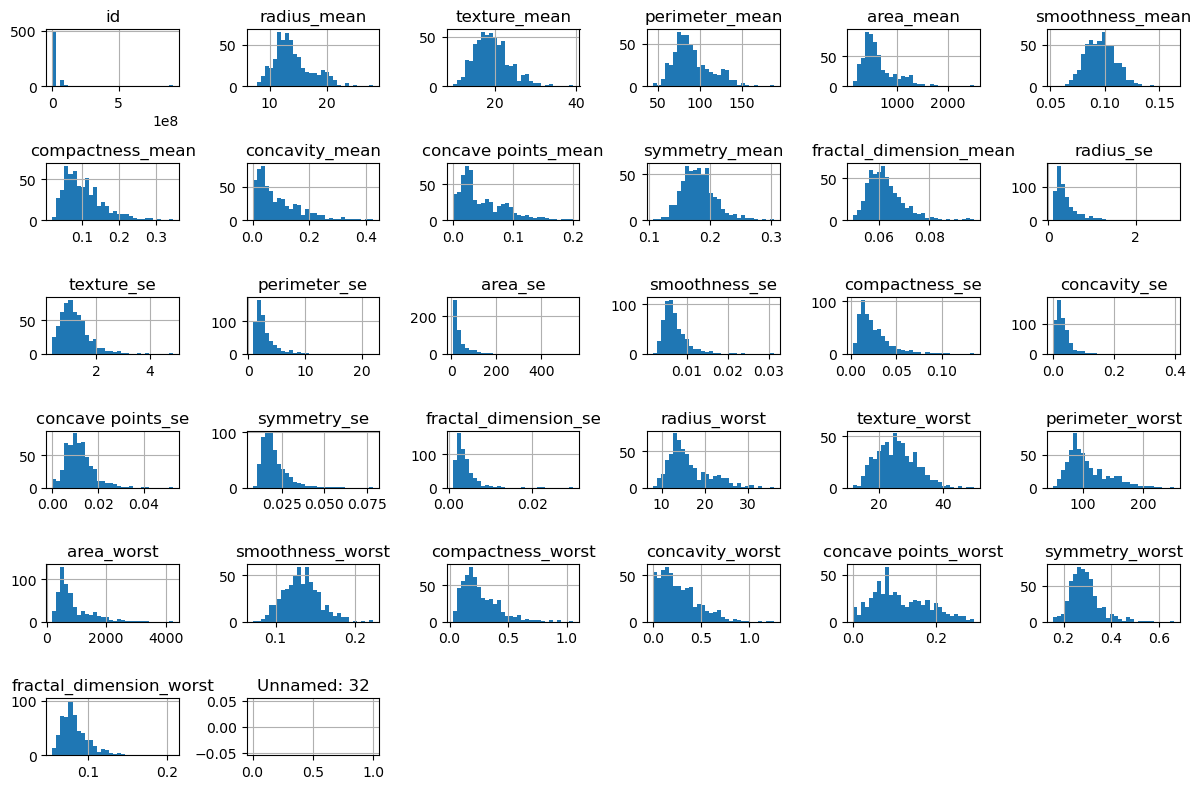

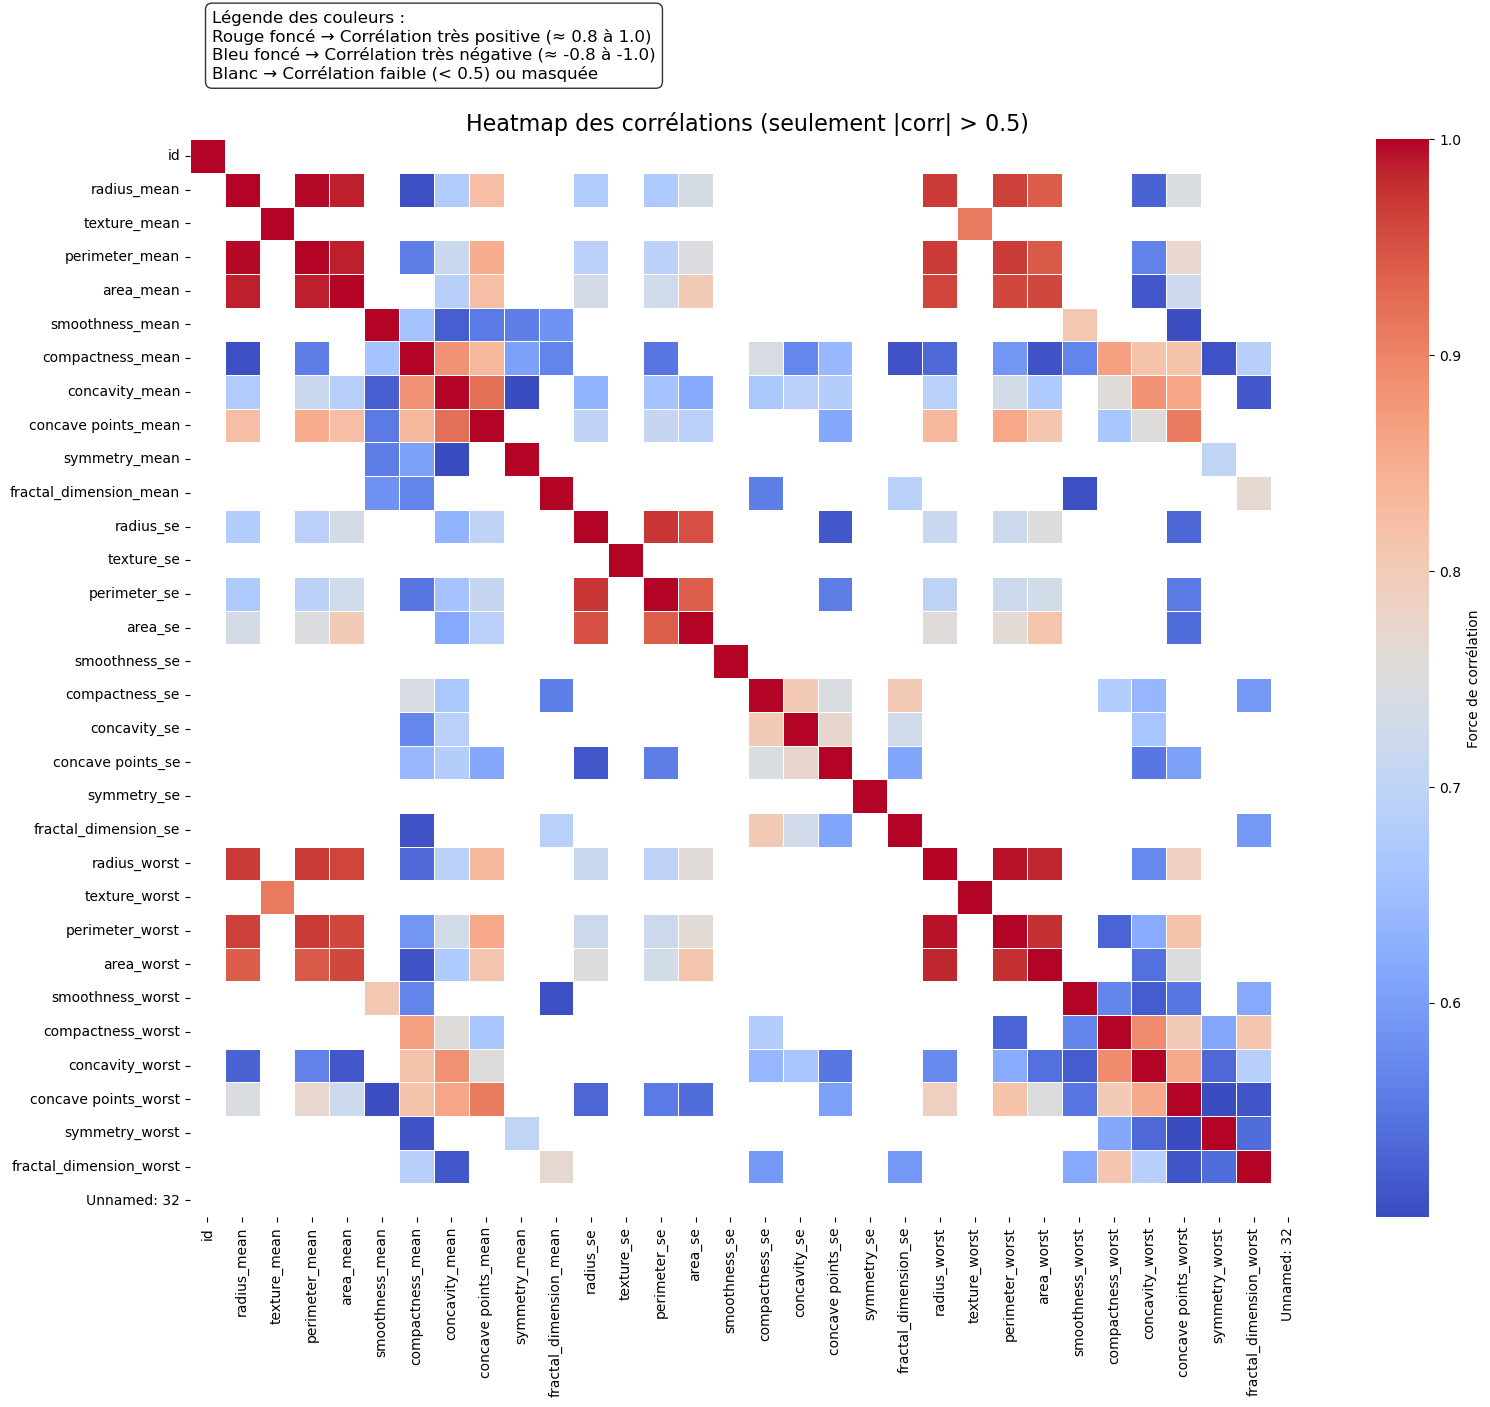

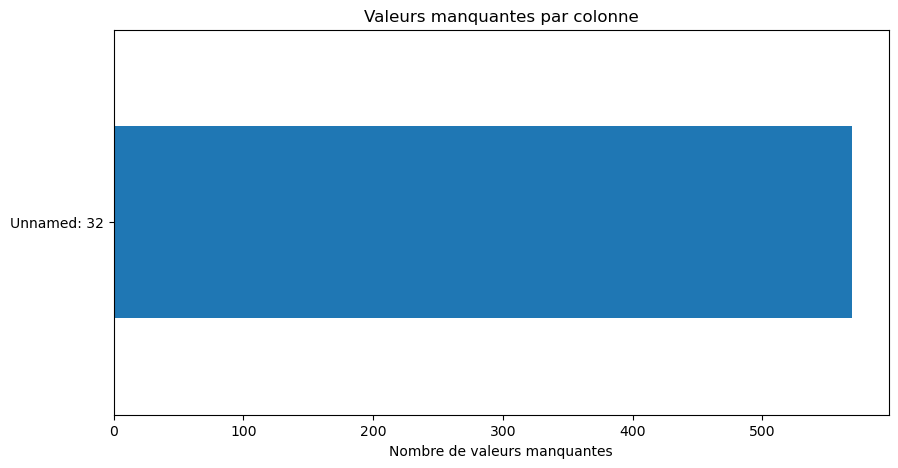

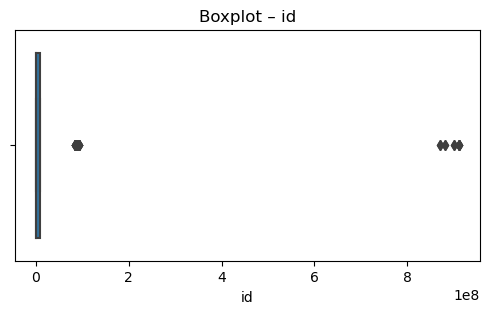

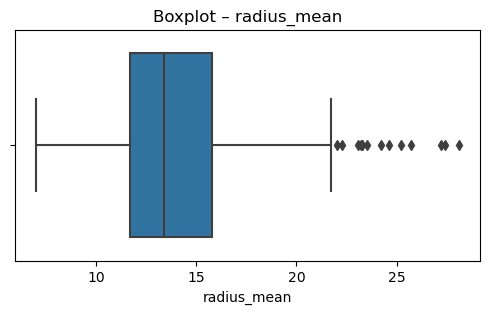

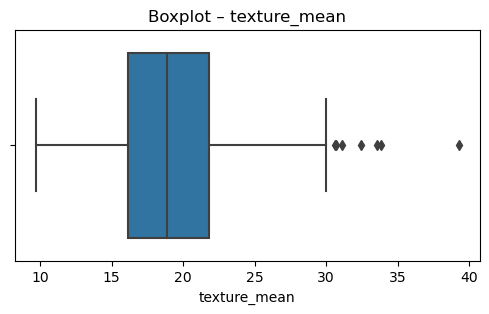

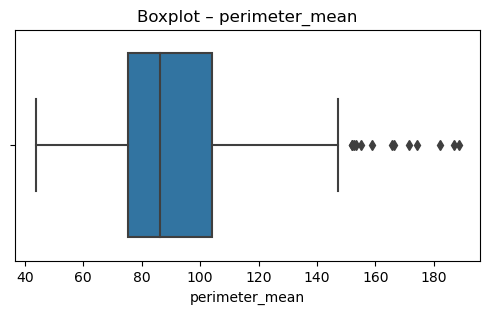

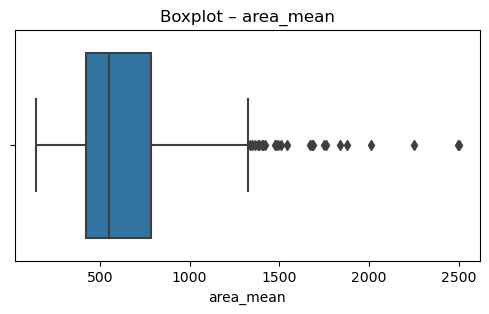

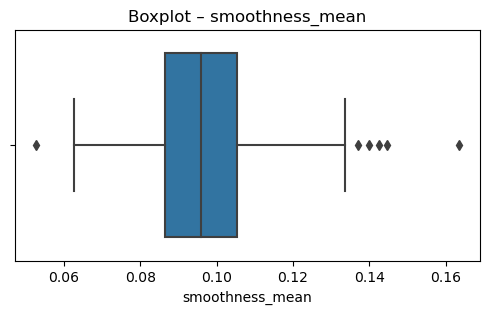

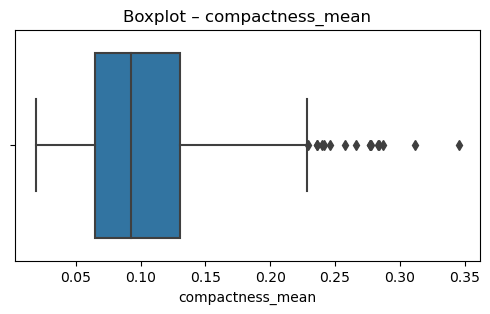

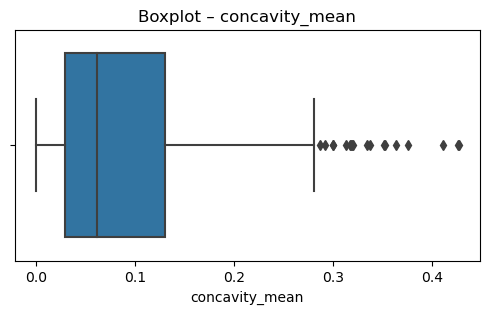

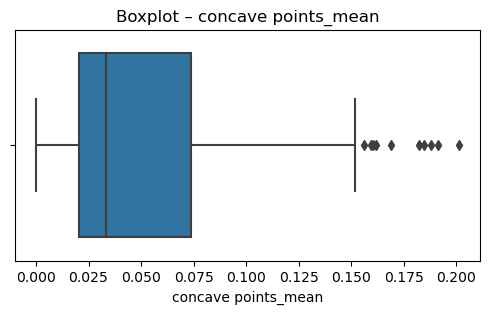

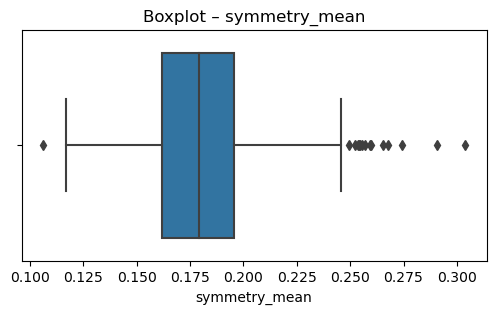

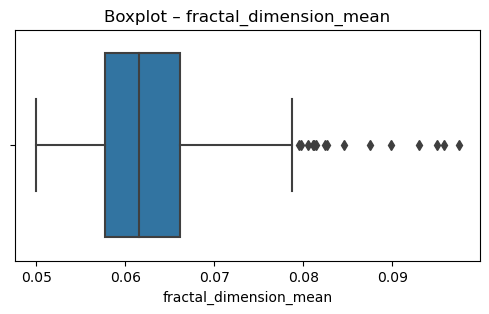

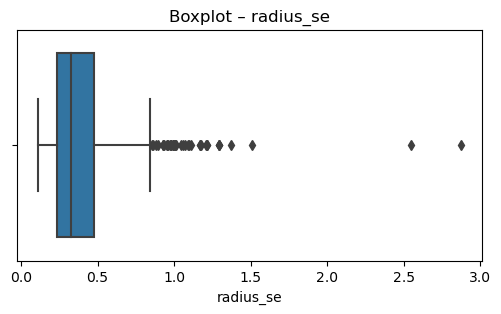

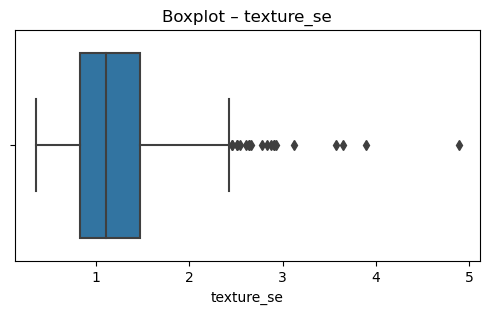

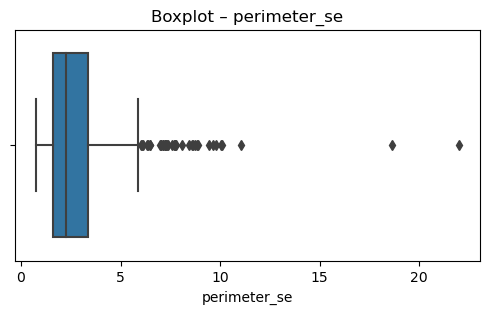

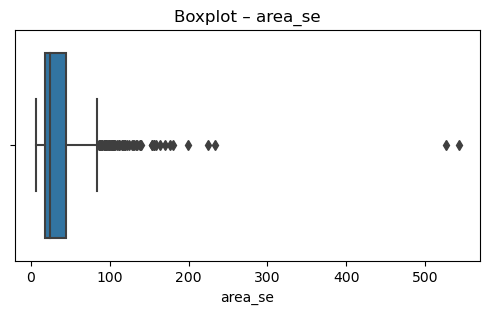

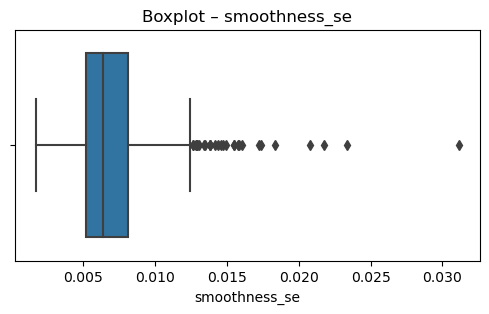

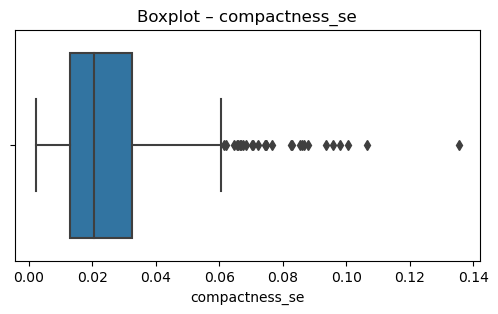

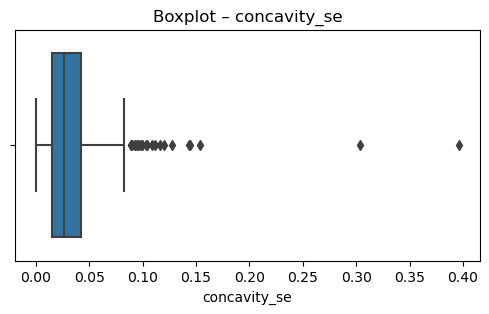

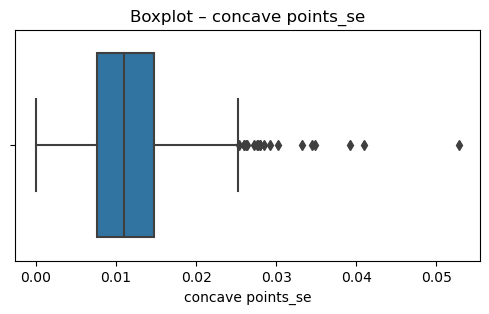

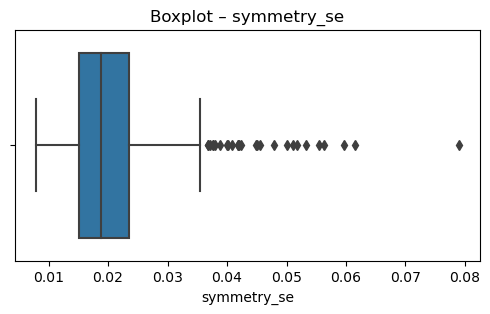

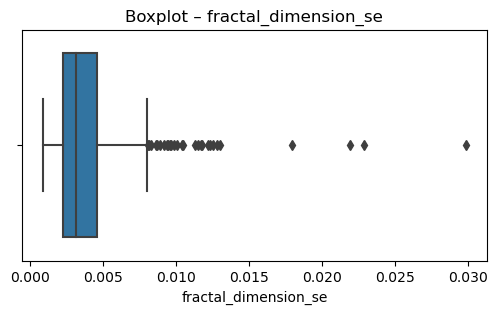

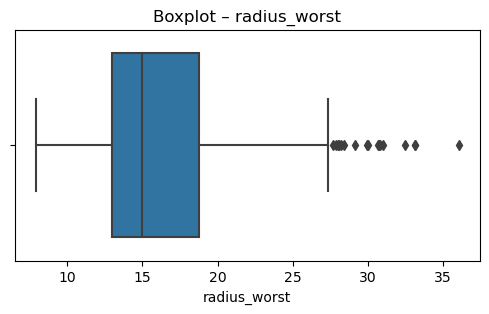

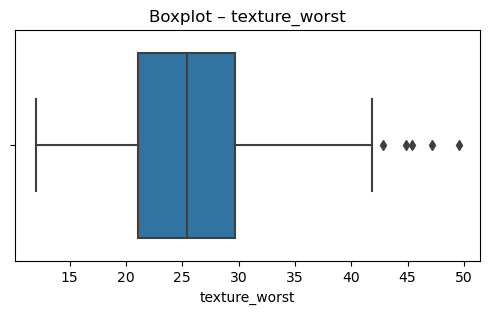

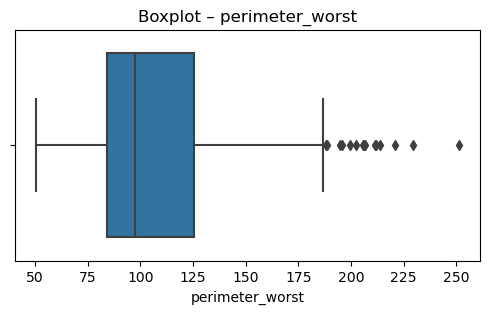

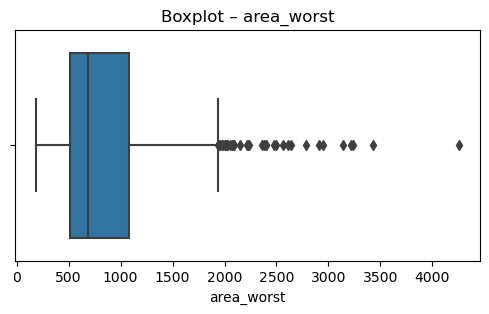

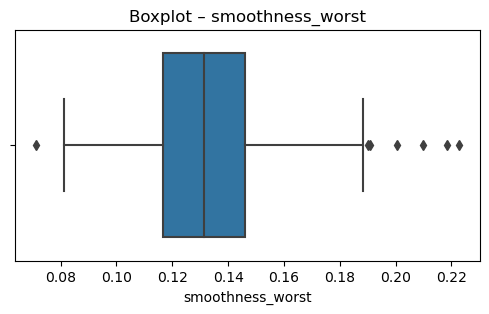

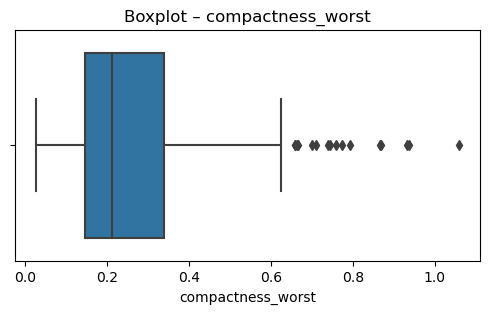

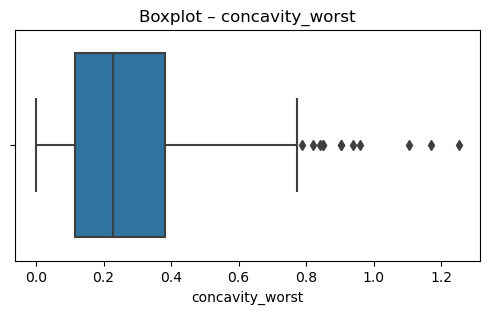

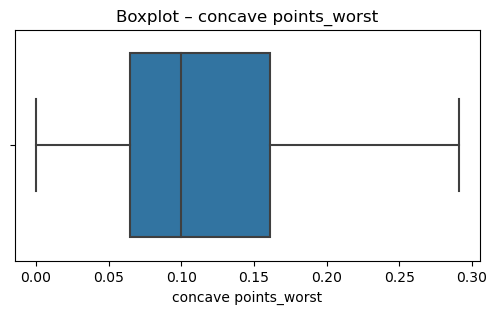

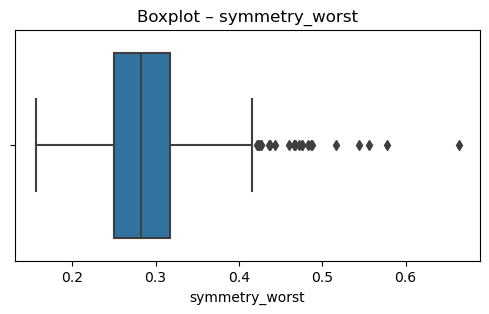

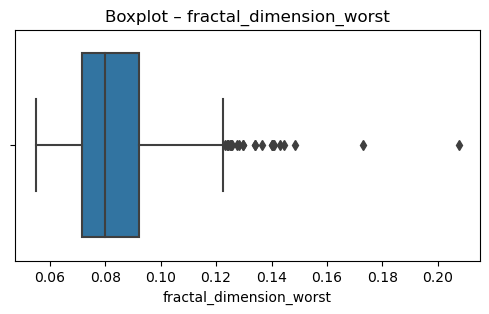

Impossible de tracer un boxplot pour Unnamed: 32 (pas assez de valeurs).
--------------------------------------------------------------------------------

 Dataset 2/14 : df2

🔹 Shape: (398, 9)

🔹 First 5 rows:


mpg  cylinders  displacement horsepower  weight  acceleration  model year  \
0  18.0          8         307.0        130    3504          12.0          70   
1  15.0          8         350.0        165    3693          11.5          70   
2  18.0          8         318.0        150    3436          11.0          70   
3  16.0          8         304.0        150    3433          12.0          70   
4  17.0          8         302.0        140    3449          10.5          70   

   origin                   car name  
0       1  chevrolet chevelle malibu  
1       1          buick skylark 320  
2       1         plymouth satellite  
3       1              amc rebel sst  
4       1                ford torino


🔹 Last 5 rows:


mpg  cylinders  displacement horsepower  weight  acceleration  \
393  27.0          4         140.0         86    2790          15.6   
394  44.0          4          97.0         52    2130          24.6   
395  32.0          4         135.0         84    2295          11.6   
396  28.0          4         120.0         79    2625          18.6   
397  31.0          4         119.0         82    2720          19.4   

     model year  origin         car name  
393          82       1  ford mustang gl  
394          82       2        vw pickup  
395          82       1    dodge rampage  
396          82       1      ford ranger  
397          82       1       chevy s-10


🔹 Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    398 non-null    object 
 4   weight        398 non-null    int64  
 5   acceleration  398 non-null    float64
 6   model year    398 non-null    int64  
 7   origin        398 non-null    int64  
 8   car name      398 non-null    object 
dtypes: float64(3), int64(4), object(2)
memory usage: 28.1+ KB
None

🔹 Data types:
mpg             float64
cylinders         int64
displacement    float64
horsepower       object
weight            int64
acceleration    float64
model year        int64
origin            int64
car name         object
dtype: object

🔹 Missing values per column:


Series([], dtype: int64)


🔹 Percentage of missing values per column:


Series([], dtype: float64)


🔹 Duplicate rows count: 0

🔹 Target variable preview:


mpg
0  18.0
1  15.0
2  18.0
3  16.0
4  17.0


🔹 Numeric columns: ['mpg', 'cylinders', 'displacement', 'weight', 'acceleration', 'model year', 'origin']

🔹 Number of outliers per numeric column:


{'mpg': 1,
 'cylinders': 0,
 'displacement': 0,
 'weight': 0,
 'acceleration': 7,
 'model year': 0,
 'origin': 0}


📊 Distribution des variables numériques :


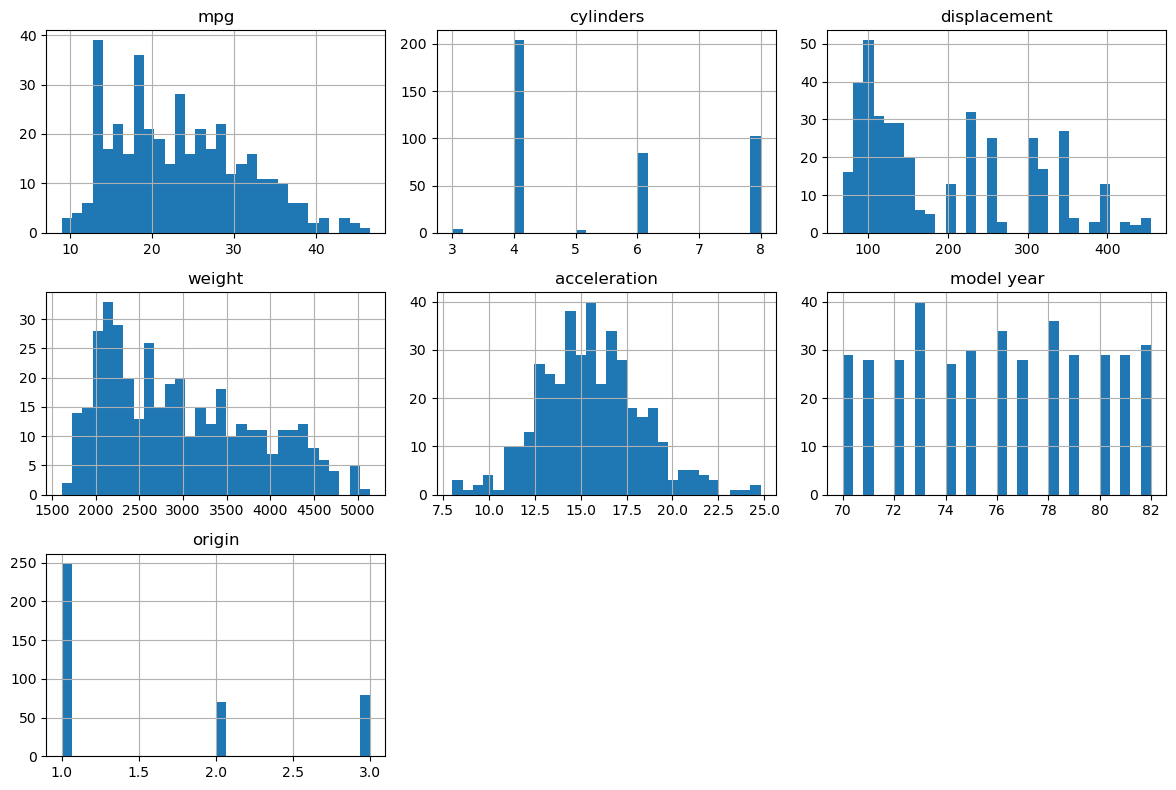

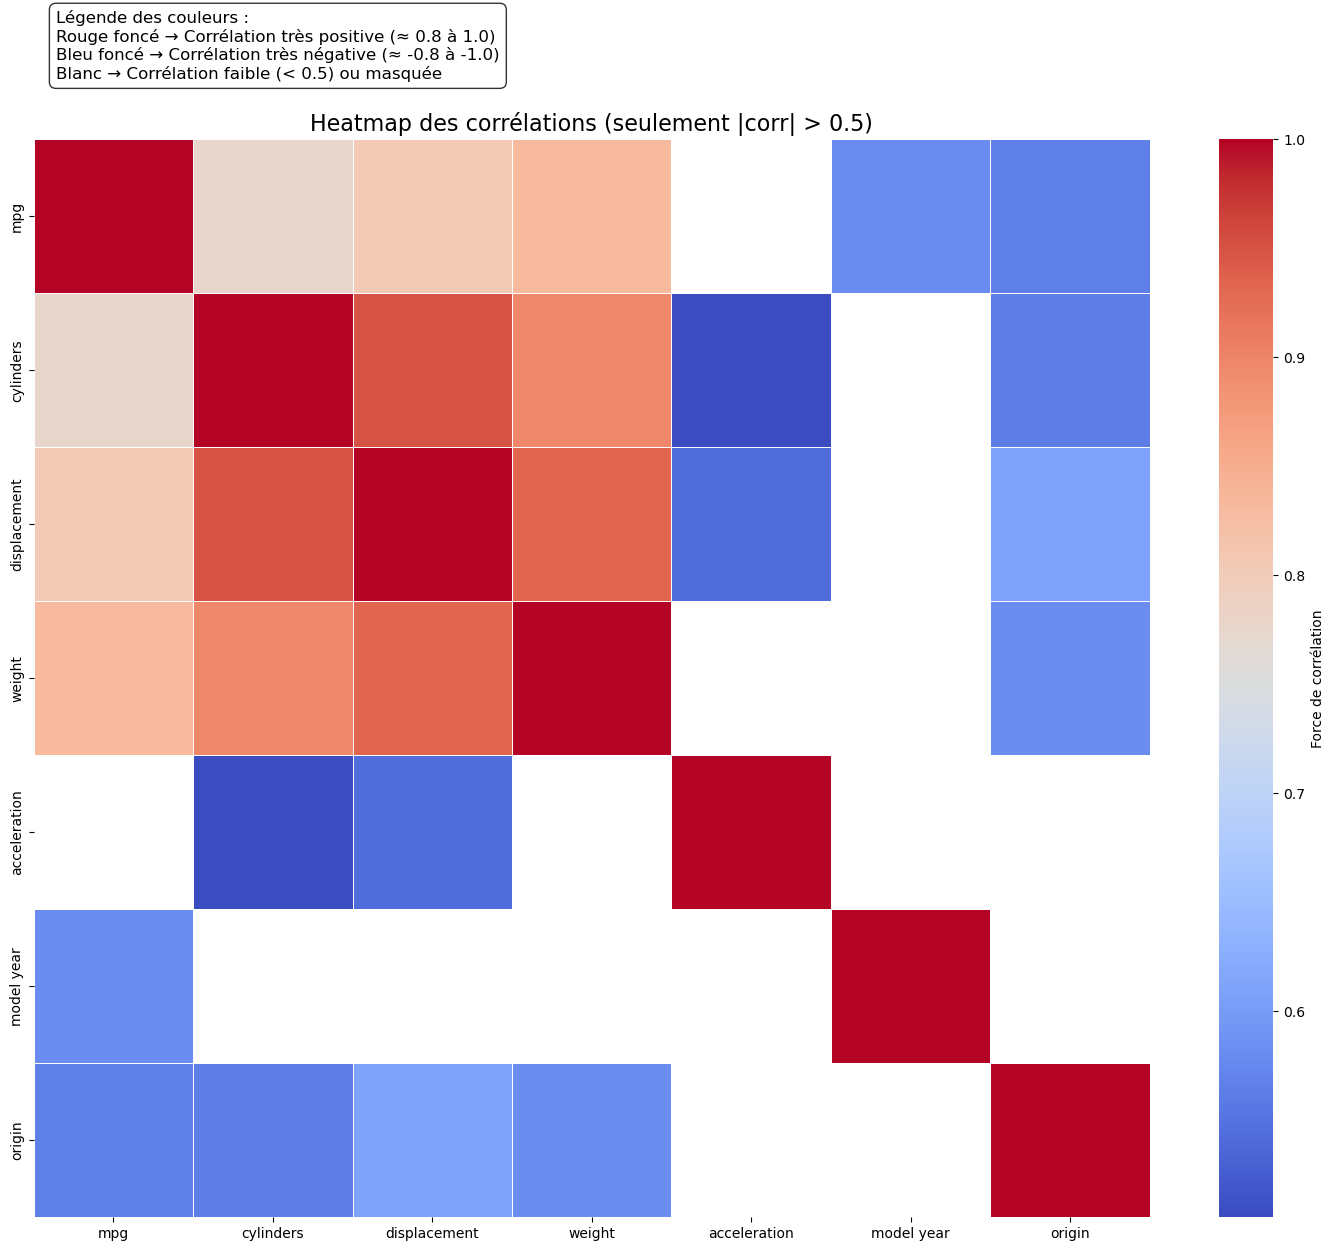


Aucune valeur manquante.


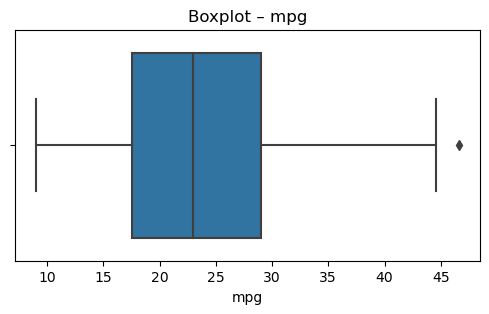

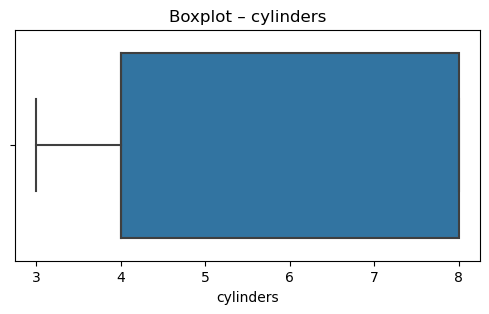

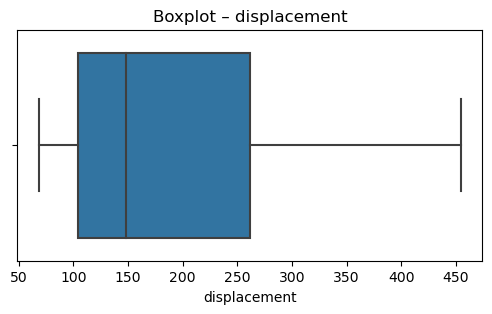

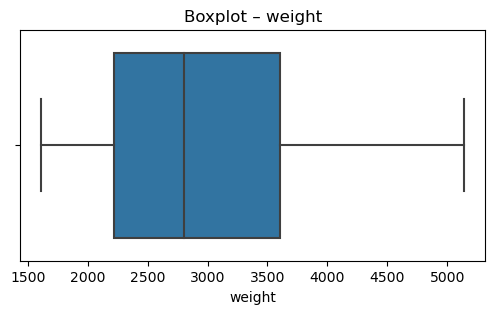

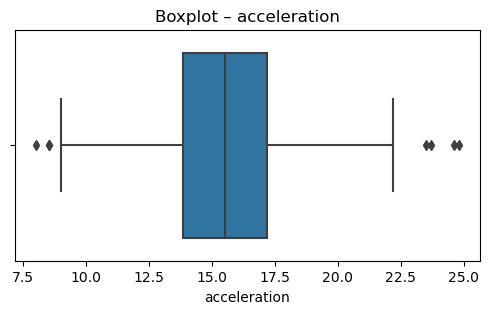

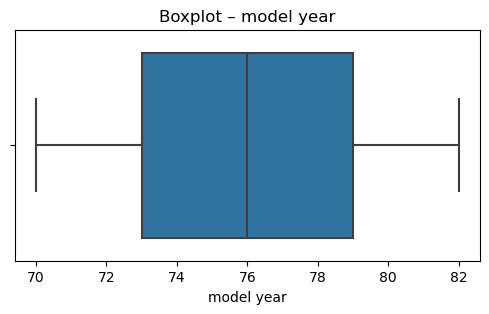

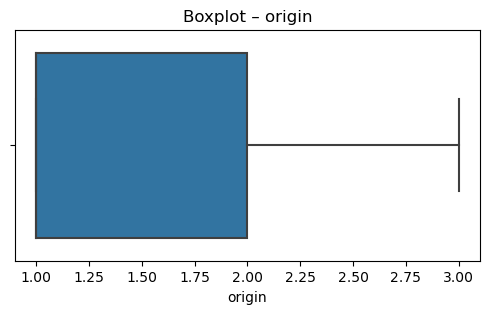

--------------------------------------------------------------------------------

 Dataset 3/14 : df3

🔹 Shape: (1030, 9)

🔹 First 5 rows:


cement  blast_furnace_slag  fly_ash  water  superplasticizer  \
0   540.0                 0.0      0.0  162.0               2.5   
1   540.0                 0.0      0.0  162.0               2.5   
2   332.5               142.5      0.0  228.0               0.0   
3   332.5               142.5      0.0  228.0               0.0   
4   198.6               132.4      0.0  192.0               0.0   

   coarse_aggregate  fine_aggregate   age  concrete_compressive_strength  
0            1040.0            676.0   28                          79.99  
1            1055.0            676.0   28                          61.89  
2             932.0            594.0  270                          40.27  
3             932.0            594.0  365                          41.05  
4             978.4            825.5  360                          44.30


🔹 Last 5 rows:


cement  blast_furnace_slag  fly_ash  water  superplasticizer  \
1025   276.4               116.0     90.3  179.6               8.9   
1026   322.2                 0.0    115.6  196.0              10.4   
1027   148.5               139.4    108.6  192.7               6.1   
1028   159.1               186.7      0.0  175.6              11.3   
1029   260.9               100.5     78.3  200.6               8.6   

      coarse_aggregate  fine_aggregate   age  concrete_compressive_strength  
1025             870.1            768.3   28                          44.28  
1026             817.9            813.4   28                          31.18  
1027             892.4            780.0   28                          23.70  
1028             989.6            788.9   28                          32.77  
1029             864.5            761.5   28                          32.40


🔹 Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1030 entries, 0 to 1029
Data columns (total 9 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   cement                         1030 non-null   float64
 1   blast_furnace_slag             1030 non-null   float64
 2   fly_ash                        1030 non-null   float64
 3   water                          1030 non-null   float64
 4   superplasticizer               1030 non-null   float64
 5   coarse_aggregate               1030 non-null   float64
 6   fine_aggregate                 1030 non-null   float64
 7   age                            1030 non-null   int64  
 8   concrete_compressive_strength  1030 non-null   float64
dtypes: float64(8), int64(1)
memory usage: 72.6 KB
None

🔹 Data types:
cement                           float64
blast_furnace_slag               float64
fly_ash                          float64
water                          

Series([], dtype: int64)


🔹 Percentage of missing values per column:


Series([], dtype: float64)


🔹 Duplicate rows count: 25
🔹 Duplicate rows:


cement  blast_furnace_slag  fly_ash  water  superplasticizer  \
72    425.0               106.3      0.0  153.5              16.5   
77    425.0               106.3      0.0  153.5              16.5   
80    425.0               106.3      0.0  153.5              16.5   
83    362.6               189.0      0.0  164.9              11.6   
86    362.6               189.0      0.0  164.9              11.6   
88    362.6               189.0      0.0  164.9              11.6   
91    362.6               189.0      0.0  164.9              11.6   
95    425.0               106.3      0.0  153.5              16.5   
100   425.0               106.3      0.0  153.5              16.5   
103   425.0               106.3      0.0  153.5              16.5   
106   362.6               189.0      0.0  164.9              11.6   
109   362.6               189.0      0.0  164.9              11.6   
111   362.6               189.0      0.0  164.9              11.6   
118   425.0               106.3      0.0  153.5              16.5   
123   425.0               106.3      0.0  153.5              16.5   
126   425.0               106.3      0.0  153.5              16.5   
129   362.6               189.0      0.0  164.9              11.6   
132   362.6               189.0      0.0  164.9              11.6   
134   362.6               189.0      0.0  164.9              11.6   
137   362.6               189.0      0.0  164.9              11.6   
141   425.0               106.3      0.0  153.5              16.5   
146   425.0               106.3      0.0  153.5              16.5   
149   425.0               106.3      0.0  153.5              16.5   
152   362.6               189.0      0.0  164.9              11.6   
155   362.6               189.0      0.0  164.9              11.6   
157   362.6               189.0      0.0  164.9              11.6   
160   362.6               189.0      0.0  164.9              11.6   
164   425.0               106.3      0.0  153.5              16.5   
169   425.0               106.3      0.0  153.5              16.5   
172   425.0               106.3      0.0  153.5              16.5   
175   362.6               189.0      0.0  164.9              11.6   
177   362.6               189.0      0.0  164.9              11.6   
179   362.6               189.0      0.0  164.9              11.6   
182   362.6               189.0      0.0  164.9              11.6   
801   252.0                 0.0      0.0  185.0               0.0   
809   252.0                 0.0      0.0  185.0               0.0   

     coarse_aggregate  fine_aggregate   age  concrete_compressive_strength  
72              852.1            887.1    3                          33.40  
77              852.1            887.1    3                          33.40  
80              852.1            887.1    3                          33.40  
83              944.7            755.8    3                          35.30  
86              944.7            755.8    3                          35.30  
88              944.7            755.8    3                          35.30  
91              944.7            755.8    3                          35.30  
95              852.1            887.1    7                          49.20  
100             852.1            887.1    7                          49.20  
103             852.1            887.1    7                          49.20  
106             944.7            755.8    7                          55.90  
109             944.7            755.8    7                          55.90  
111             944.7            755.8    7                          55.90  
118             852.1            887.1   28                          60.29  
123             852.1            887.1   28                          60.29  
126             852.1            887.1   28                          60.29  
129             944.7            755.8   28                          71.30  
132             944.7            755.8   28                      


🔹 Target variable preview:


concrete_compressive_strength
0                          79.99
1                          61.89
2                          40.27
3                          41.05
4                          44.30


🔹 Numeric columns: ['cement', 'blast_furnace_slag', 'fly_ash', 'water', 'superplasticizer', 'coarse_aggregate', 'fine_aggregate ', 'age', 'concrete_compressive_strength']

🔹 Number of outliers per numeric column:


{'cement': 0,
 'blast_furnace_slag': 2,
 'fly_ash': 0,
 'water': 9,
 'superplasticizer': 10,
 'coarse_aggregate': 0,
 'fine_aggregate ': 5,
 'age': 59,
 'concrete_compressive_strength': 4}


📊 Distribution des variables numériques :


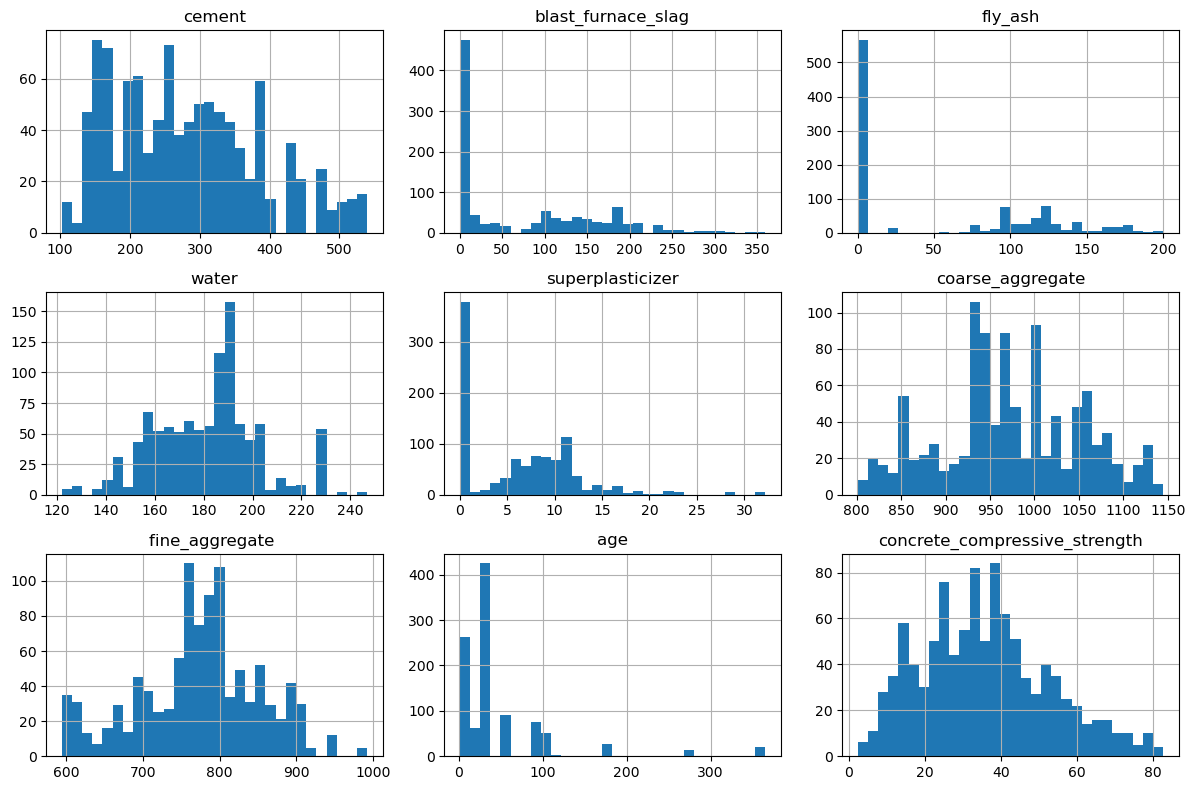

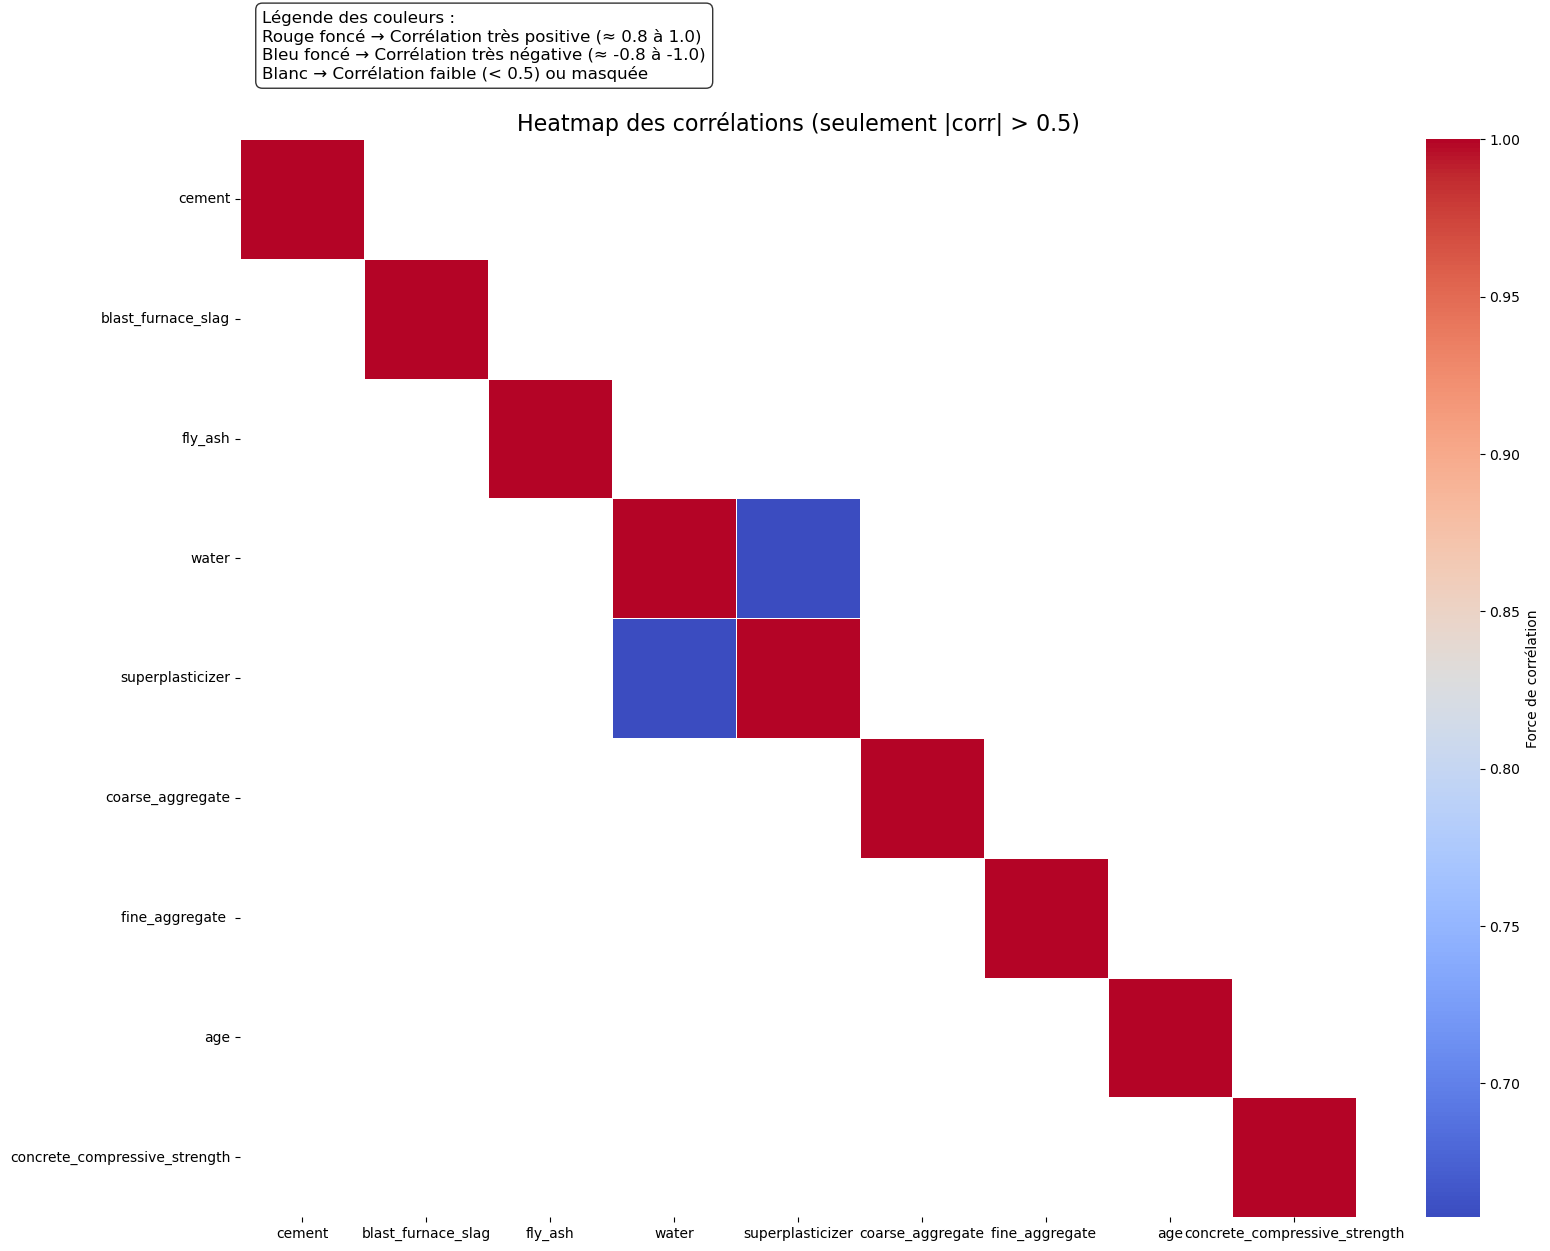


Aucune valeur manquante.


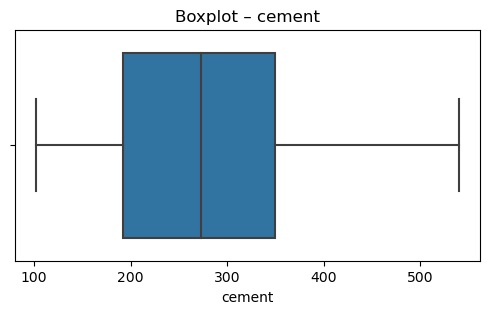

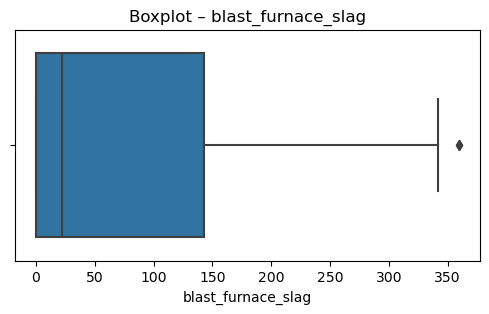

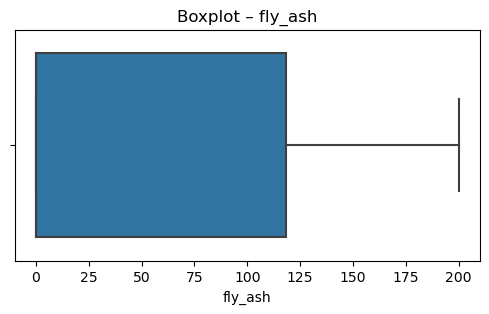

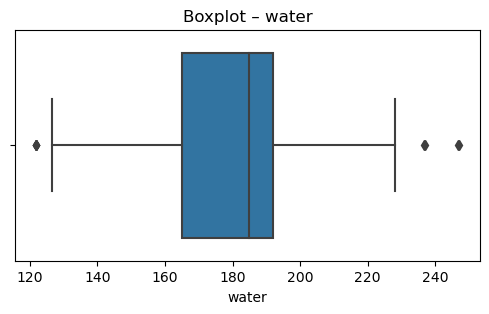

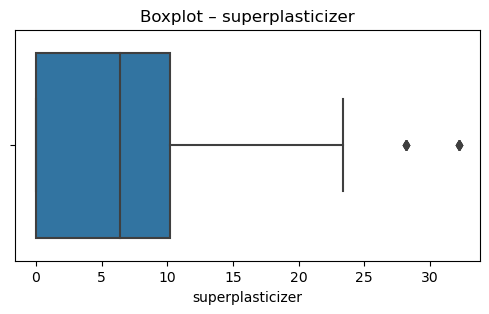

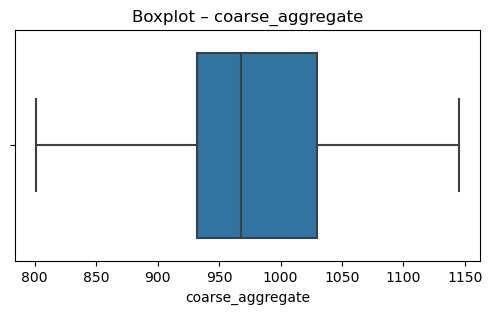

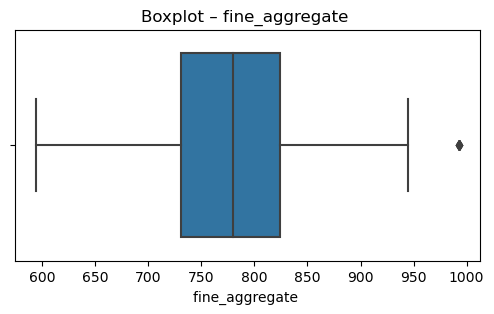

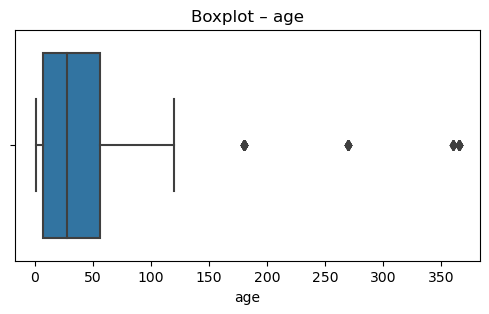

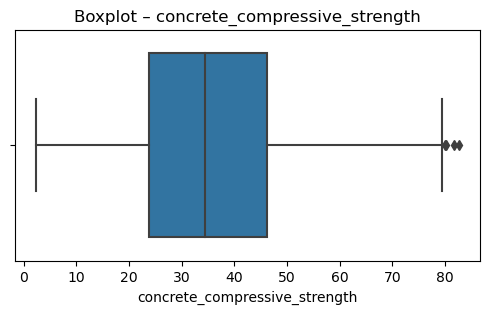

--------------------------------------------------------------------------------

 Dataset 4/14 : df4

🔹 Shape: (506, 14)

🔹 First 5 rows:


CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD  TAX  PTRATIO  \
0  0.00632  18.0   2.31   0.0  0.538  6.575  65.2  4.0900    1  296     15.3   
1  0.02731   0.0   7.07   0.0  0.469  6.421  78.9  4.9671    2  242     17.8   
2  0.02729   0.0   7.07   0.0  0.469  7.185  61.1  4.9671    2  242     17.8   
3  0.03237   0.0   2.18   0.0  0.458  6.998  45.8  6.0622    3  222     18.7   
4  0.06905   0.0   2.18   0.0  0.458  7.147  54.2  6.0622    3  222     18.7   

        B  LSTAT  MEDV  
0  396.90   4.98  24.0  
1  396.90   9.14  21.6  
2  392.83   4.03  34.7  
3  394.63   2.94  33.4  
4  396.90    NaN  36.2


🔹 Last 5 rows:


CRIM   ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD  TAX  PTRATIO  \
501  0.06263  0.0  11.93   0.0  0.573  6.593  69.1  2.4786    1  273     21.0   
502  0.04527  0.0  11.93   0.0  0.573  6.120  76.7  2.2875    1  273     21.0   
503  0.06076  0.0  11.93   0.0  0.573  6.976  91.0  2.1675    1  273     21.0   
504  0.10959  0.0  11.93   0.0  0.573  6.794  89.3  2.3889    1  273     21.0   
505  0.04741  0.0  11.93   0.0  0.573  6.030   NaN  2.5050    1  273     21.0   

          B  LSTAT  MEDV  
501  391.99    NaN  22.4  
502  396.90   9.08  20.6  
503  396.90   5.64  23.9  
504  393.45   6.48  22.0  
505  396.90   7.88  11.9


🔹 Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     486 non-null    float64
 1   ZN       486 non-null    float64
 2   INDUS    486 non-null    float64
 3   CHAS     486 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      486 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    int64  
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    486 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(12), int64(2)
memory usage: 55.5 KB
None

🔹 Data types:
CRIM       float64
ZN         float64
INDUS      float64
CHAS       float64
NOX        float64
RM         float64
AGE        float64
DIS        float64
RAD          int64
TAX          int64
PTRATIO    float

CRIM     20
ZN       20
INDUS    20
CHAS     20
AGE      20
LSTAT    20
dtype: int64


🔹 Percentage of missing values per column:


CRIM     3.95
ZN       3.95
INDUS    3.95
CHAS     3.95
AGE      3.95
LSTAT    3.95
dtype: float64


🔹 Duplicate rows count: 0

🔹 Target variable preview:


MEDV
0  24.0
1  21.6
2  34.7
3  33.4
4  36.2


🔹 Numeric columns: ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV']

🔹 Number of outliers per numeric column:


{'CRIM': 65,
 'ZN': 63,
 'INDUS': 0,
 'CHAS': 34,
 'NOX': 0,
 'RM': 30,
 'AGE': 0,
 'DIS': 5,
 'RAD': 0,
 'TAX': 0,
 'PTRATIO': 15,
 'B': 77,
 'LSTAT': 7,
 'MEDV': 40}


📊 Distribution des variables numériques :


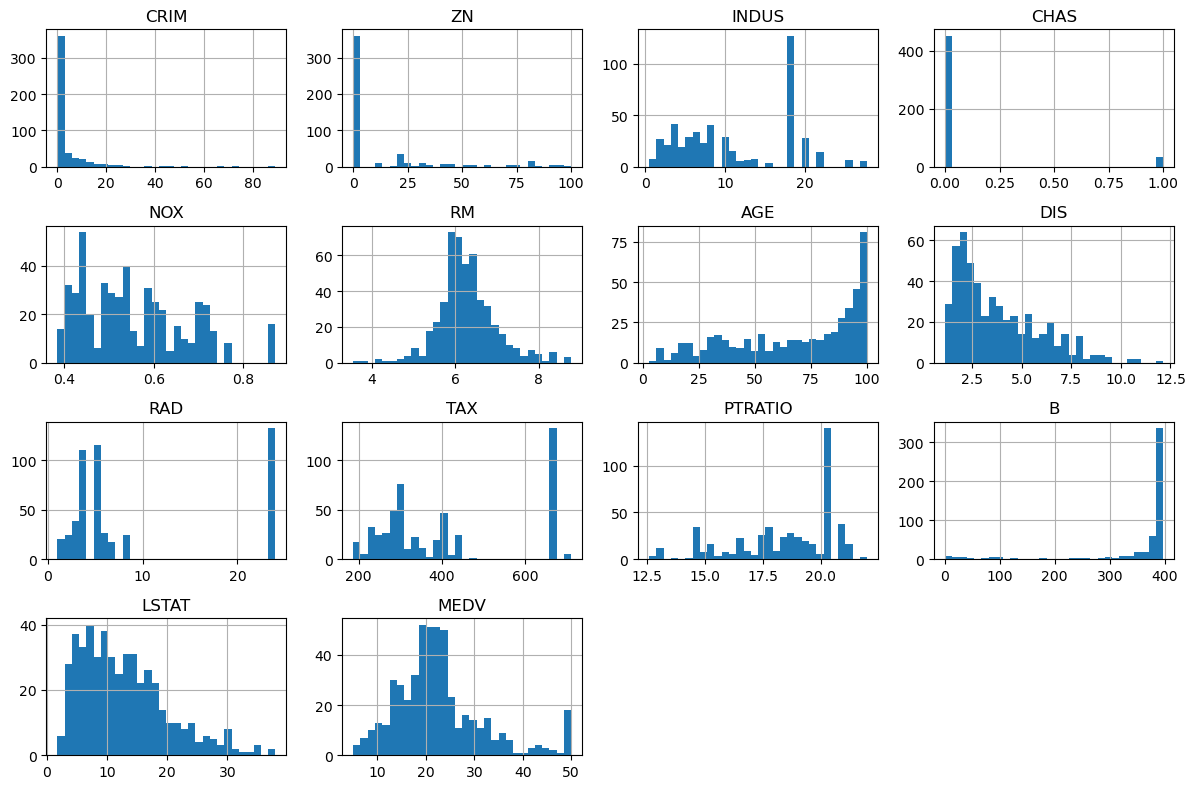

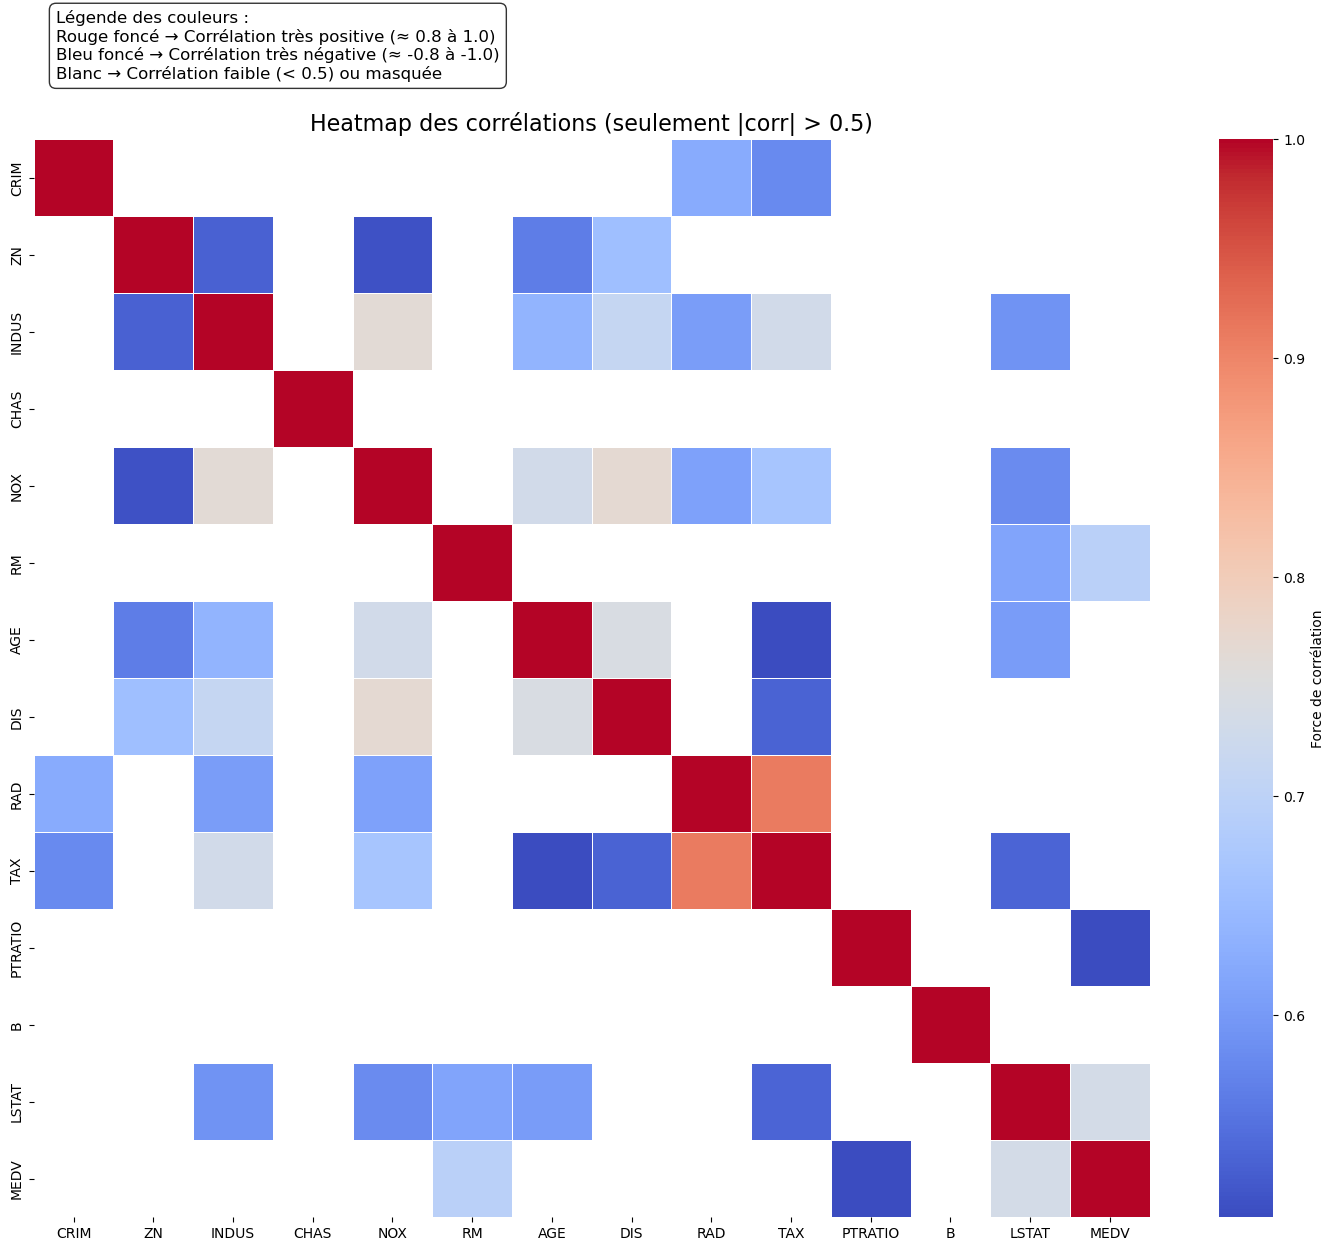

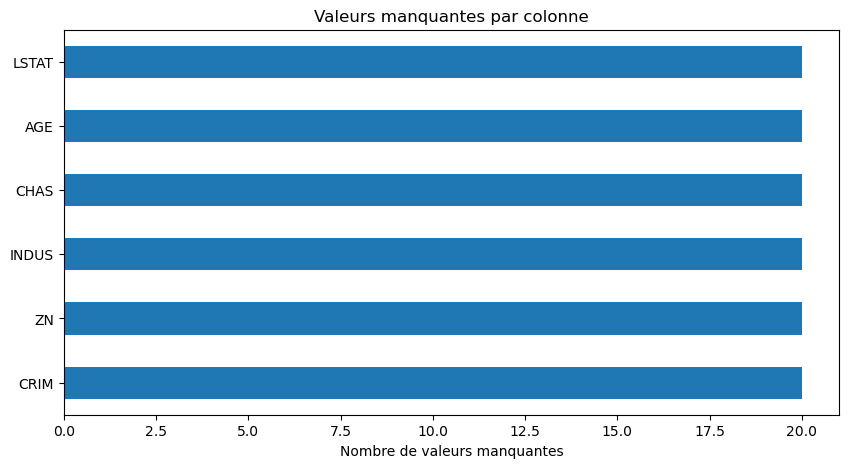

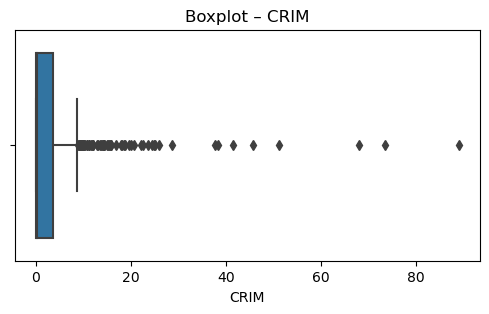

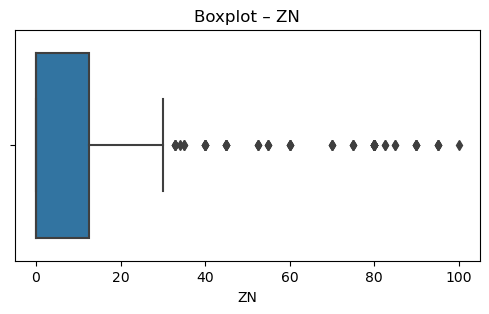

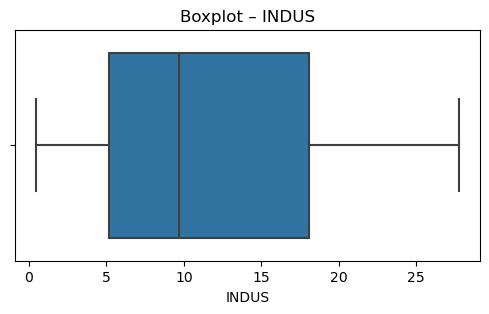

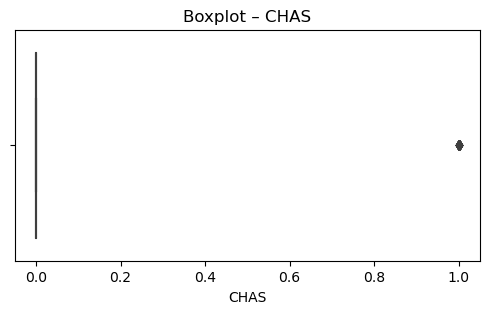

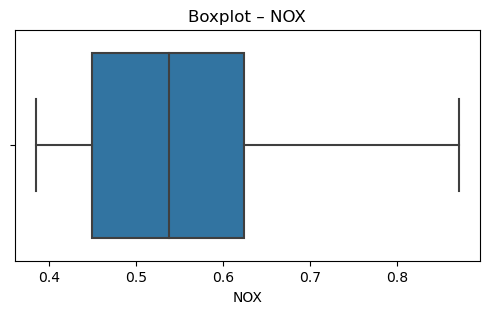

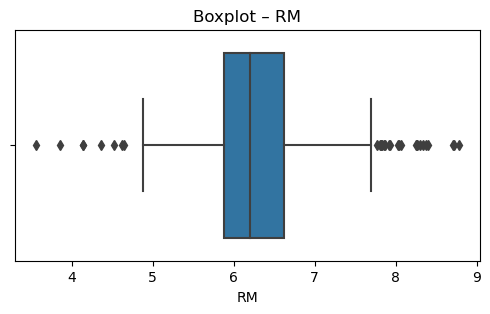

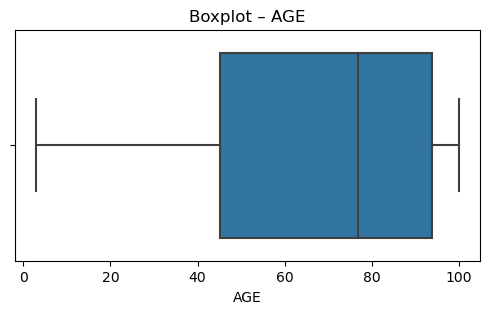

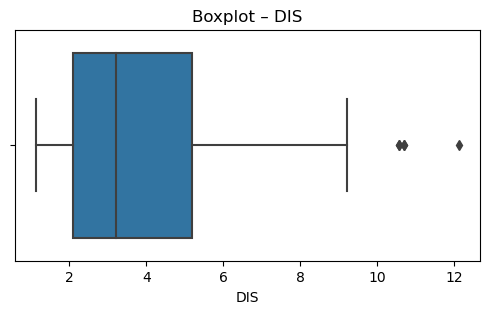

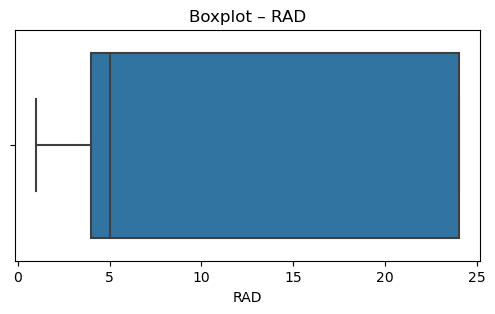

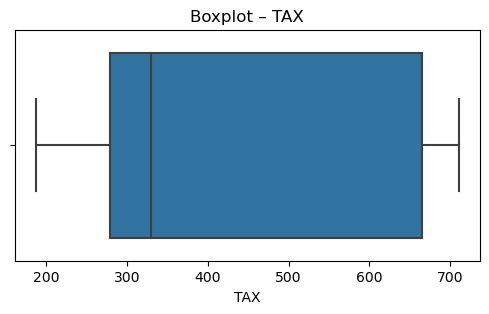

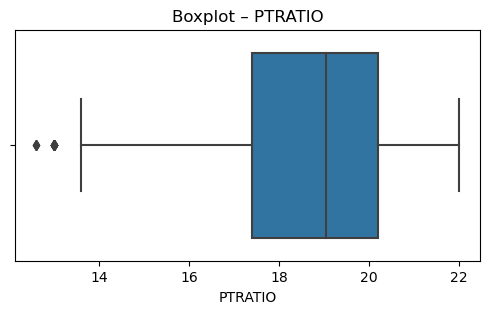

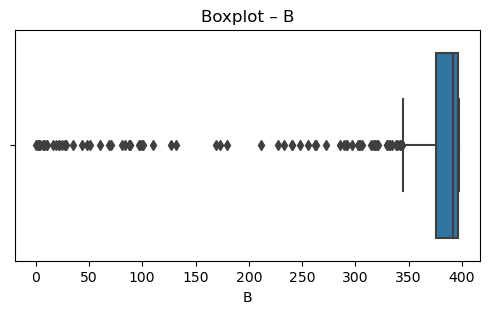

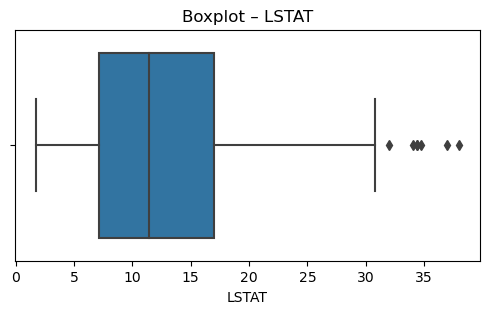

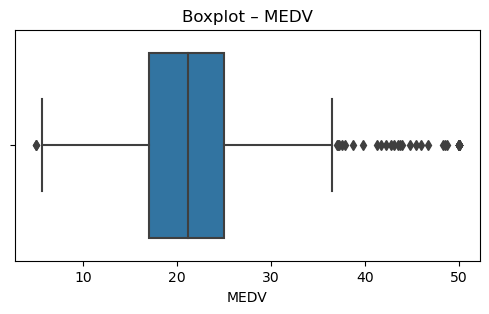

--------------------------------------------------------------------------------

 Dataset 5/14 : df5

🔹 Shape: (112, 14)

🔹 First 5 rows:


obs  maxO3    T9   T12   T15  Ne9  Ne12  Ne15      Vx9     Vx12     Vx15  \
0   601     87  15,6  18,5  18,4    4     4     8   0,6946  -1,7101  -0,6946   
1   602     82    17  18,4  17,7    5     5     7  -4,3301       -4       -3   
2   603     92  15,3  17,6  19,5    2     5     4   2,9544   1,8794   0,5209   
3   604    114  16,2  19,7  22,5    1     1     0   0,9848   0,3473  -0,1736   
4   605     94  17,4  20,5  20,4    8     8     7     -0,5  -2,9544  -4,3301   

   maxO3v   vent pluie  
0      84   Nord   Sec  
1      87   Nord   Sec  
2      82    Est   Sec  
3      92   Nord   Sec  
4     114  Ouest   Sec


🔹 Last 5 rows:


obs  maxO3    T9   T12   T15  Ne9  Ne12  Ne15      Vx9     Vx12  \
107   925     84  13,3  17,7  17,8    3     5     6        0       -1   
108   927     77  16,2  20,8  22,1    6     5     5  -0,6946       -2   
109   928     99  16,9    23  22,6    6     4     7      1,5   0,8682   
110   929     83  16,9  19,8  22,1    6     5     3       -4  -3,7588   
111   930     70  15,7  18,6  20,7    7     7     7        0  -1,0419   

        Vx15  maxO3v   vent  pluie  
107  -1,2856      76    Sud    Sec  
108  -1,3681      71    Sud  Pluie  
109   0,8682      77    Sud    Sec  
110       -4      99  Ouest  Pluie  
111       -4      83    Sud    Sec


🔹 Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112 entries, 0 to 111
Data columns (total 14 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0    obs    112 non-null    int64 
 1   maxO3   112 non-null    int64 
 2   T9      112 non-null    object
 3   T12     112 non-null    object
 4   T15     112 non-null    object
 5   Ne9     112 non-null    int64 
 6   Ne12    112 non-null    int64 
 7   Ne15    112 non-null    int64 
 8   Vx9     112 non-null    object
 9   Vx12    112 non-null    object
 10  Vx15    112 non-null    object
 11  maxO3v  112 non-null    int64 
 12  vent    112 non-null    object
 13  pluie   112 non-null    object
dtypes: int64(6), object(8)
memory usage: 12.4+ KB
None

🔹 Data types:
 obs       int64
maxO3      int64
T9        object
T12       object
T15       object
Ne9        int64
Ne12       int64
Ne15       int64
Vx9       object
Vx12      object
Vx15      object
maxO3v     int64
vent      object
pluie     object
d

Series([], dtype: int64)


🔹 Percentage of missing values per column:


Series([], dtype: float64)


🔹 Duplicate rows count: 0

🔹 Target variable preview:
⚠️ Target column not found or not provided.

🔹 Numeric columns: [' obs', 'maxO3', 'Ne9', 'Ne12', 'Ne15', 'maxO3v']

🔹 Number of outliers per numeric column:


{' obs': 0, 'maxO3': 4, 'Ne9': 0, 'Ne12': 0, 'Ne15': 0, 'maxO3v': 4}


📊 Distribution des variables numériques :


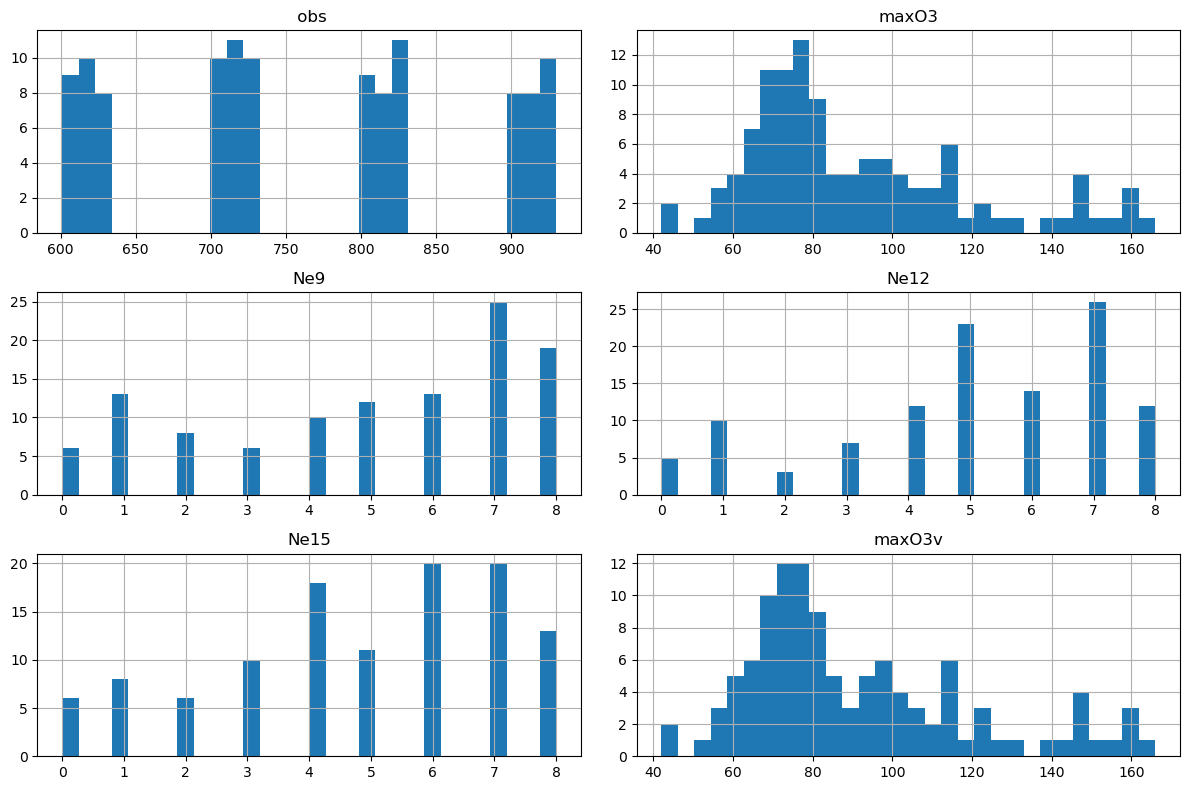

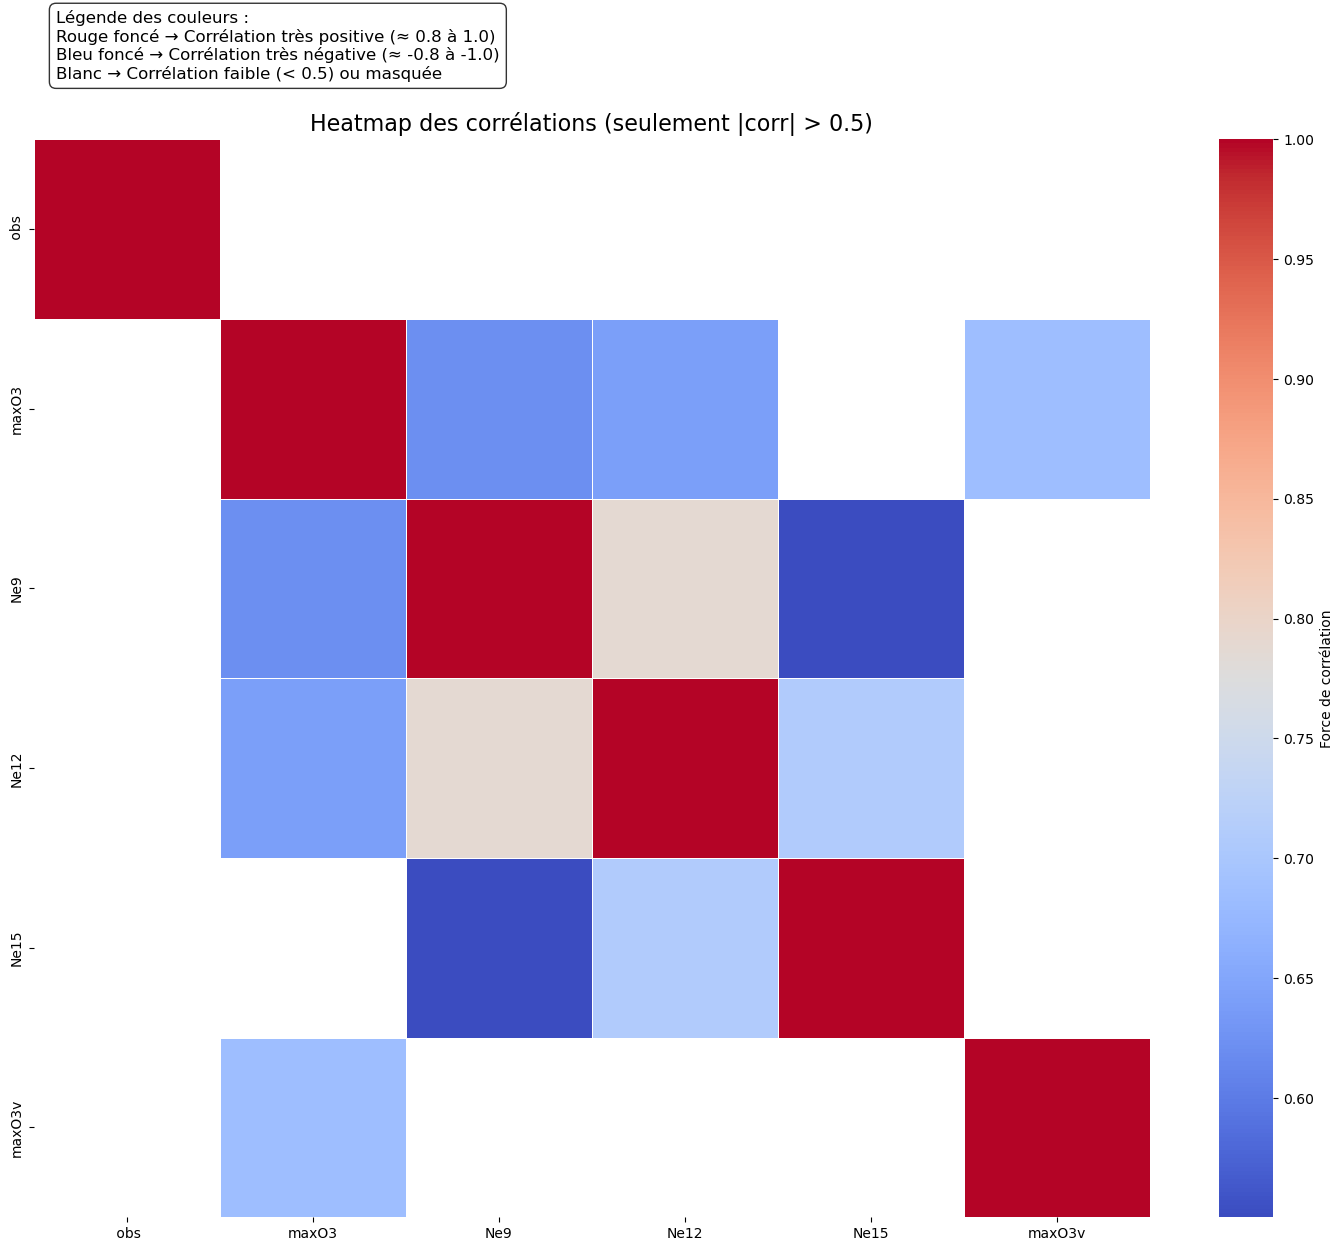


Aucune valeur manquante.


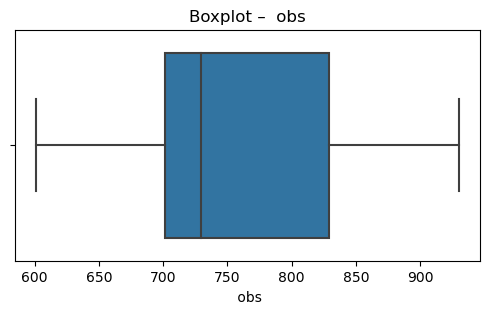

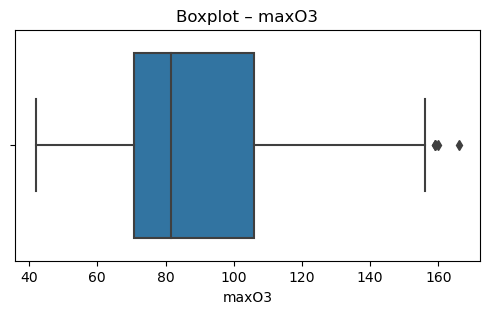

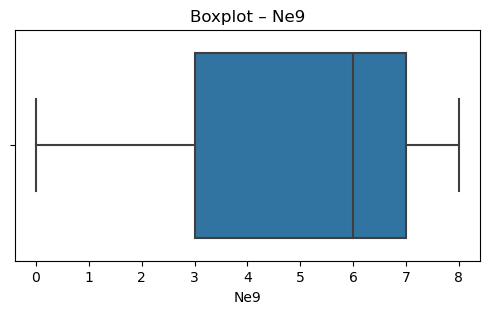

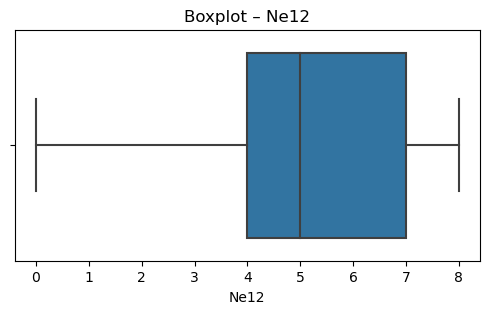

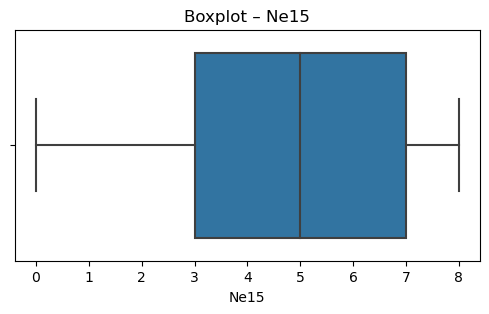

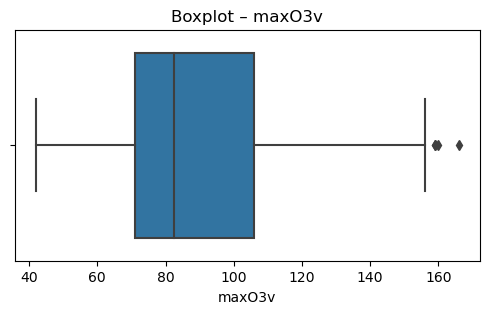

--------------------------------------------------------------------------------

 Dataset 6/14 : df6

🔹 Shape: (195, 24)

🔹 First 5 rows:


name  MDVP:Fo(Hz)  MDVP:Fhi(Hz)  MDVP:Flo(Hz)  MDVP:Jitter(%)  \
0  phon_R01_S01_1      119.992       157.302        74.997         0.00784   
1  phon_R01_S01_2      122.400       148.650       113.819         0.00968   
2  phon_R01_S01_3      116.682       131.111       111.555         0.01050   
3  phon_R01_S01_4      116.676       137.871       111.366         0.00997   
4  phon_R01_S01_5      116.014       141.781       110.655         0.01284   

   MDVP:Jitter(Abs)  MDVP:RAP  MDVP:PPQ  Jitter:DDP  MDVP:Shimmer  ...  \
0           0.00007   0.00370   0.00554     0.01109       0.04374  ...   
1           0.00008   0.00465   0.00696     0.01394       0.06134  ...   
2           0.00009   0.00544   0.00781     0.01633       0.05233  ...   
3           0.00009   0.00502   0.00698     0.01505       0.05492  ...   
4           0.00011   0.00655   0.00908     0.01966       0.06425  ...   

   Shimmer:DDA      NHR     HNR  RPDE       DFA   spread1   spread2        D2  \
0      0.06545  0.02211  21.033     1  0.414783  0.815285 -4.813031  0.266482   
1      0.09403  0.01929  19.085     1  0.458359  0.819521 -4.075192  0.335590   
2      0.08270  0.01309  20.651     1  0.429895  0.825288 -4.443179  0.311173   
3      0.08771  0.01353  20.644     1  0.434969  0.819235 -4.117501  0.334147   
4      0.10470  0.01767  19.649     1  0.417356  0.823484 -3.747787  0.234513   

        PPE    status  
0  2.301442  0.284654  
1  2.486855  0.368674  
2  2.342259  0.332634  
3  2.405554  0.368975  
4  2.332180  0.410335  

[5 rows x 24 columns]


🔹 Last 5 rows:


name  MDVP:Fo(Hz)  MDVP:Fhi(Hz)  MDVP:Flo(Hz)  MDVP:Jitter(%)  \
190  phon_R01_S50_2      174.188       230.978        94.261         0.00459   
191  phon_R01_S50_3      209.516       253.017        89.488         0.00564   
192  phon_R01_S50_4      174.688       240.005        74.287         0.01360   
193  phon_R01_S50_5      198.764       396.961        74.904         0.00740   
194  phon_R01_S50_6      214.289       260.277        77.973         0.00567   

     MDVP:Jitter(Abs)  MDVP:RAP  MDVP:PPQ  Jitter:DDP  MDVP:Shimmer  ...  \
190           0.00003   0.00263   0.00259     0.00790       0.04087  ...   
191           0.00003   0.00331   0.00292     0.00994       0.02751  ...   
192           0.00008   0.00624   0.00564     0.01873       0.02308  ...   
193           0.00004   0.00370   0.00390     0.01109       0.02296  ...   
194           0.00003   0.00295   0.00317     0.00885       0.01884  ...   

     Shimmer:DDA      NHR     HNR  RPDE       DFA   spread1   spread2  \
190      0.07008  0.02764  19.517     0  0.448439  0.657899 -6.538586   
191      0.04812  0.01810  19.147     0  0.431674  0.683244 -6.195325   
192      0.03804  0.10715  17.883     0  0.407567  0.655683 -6.787197   
193      0.03794  0.07223  19.020     0  0.451221  0.643956 -6.744577   
194      0.03078  0.04398  21.209     0  0.462803  0.664357 -5.724056   

           D2       PPE    status  
190  0.121952  2.657476  0.133050  
191  0.129303  2.784312  0.168895  
192  0.158453  2.679772  0.131728  
193  0.207454  2.138608  0.123306  
194  0.190667  2.555477  0.148569  

[5 rows x 24 columns]


🔹 Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 195 entries, 0 to 194
Data columns (total 24 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   name              195 non-null    object 
 1   MDVP:Fo(Hz)       195 non-null    float64
 2   MDVP:Fhi(Hz)      195 non-null    float64
 3   MDVP:Flo(Hz)      195 non-null    float64
 4   MDVP:Jitter(%)    195 non-null    float64
 5   MDVP:Jitter(Abs)  195 non-null    float64
 6   MDVP:RAP          195 non-null    float64
 7   MDVP:PPQ          195 non-null    float64
 8   Jitter:DDP        195 non-null    float64
 9   MDVP:Shimmer      195 non-null    float64
 10  MDVP:Shimmer(dB)  195 non-null    float64
 11  Shimmer:APQ3      195 non-null    float64
 12  Shimmer:APQ5      195 non-null    float64
 13  MDVP:APQ          195 non-null    float64
 14  Shimmer:DDA       195 non-null    float64
 15  NHR               195 non-null    float64
 16  HNR               195 non-null    f

Series([], dtype: int64)


🔹 Percentage of missing values per column:


Series([], dtype: float64)


🔹 Duplicate rows count: 0

🔹 Target variable preview:


status
0  0.284654
1  0.368674
2  0.332634
3  0.368975
4  0.410335


🔹 Numeric columns: ['MDVP:Fo(Hz)', 'MDVP:Fhi(Hz)', 'MDVP:Flo(Hz)', 'MDVP:Jitter(%)', 'MDVP:Jitter(Abs)', 'MDVP:RAP', 'MDVP:PPQ', 'Jitter:DDP', 'MDVP:Shimmer', 'MDVP:Shimmer(dB)', 'Shimmer:APQ3', 'Shimmer:APQ5', 'MDVP:APQ', 'Shimmer:DDA', 'NHR', 'HNR', 'RPDE', 'DFA', 'spread1', 'spread2', 'D2', 'PPE', 'status']

🔹 Number of outliers per numeric column:


{'MDVP:Fo(Hz)': 0,
 'MDVP:Fhi(Hz)': 11,
 'MDVP:Flo(Hz)': 9,
 'MDVP:Jitter(%)': 14,
 'MDVP:Jitter(Abs)': 7,
 'MDVP:RAP': 14,
 'MDVP:PPQ': 15,
 'Jitter:DDP': 14,
 'MDVP:Shimmer': 8,
 'MDVP:Shimmer(dB)': 10,
 'Shimmer:APQ3': 6,
 'Shimmer:APQ5': 13,
 'MDVP:APQ': 12,
 'Shimmer:DDA': 6,
 'NHR': 19,
 'HNR': 3,
 'RPDE': 48,
 'DFA': 0,
 'spread1': 0,
 'spread2': 4,
 'D2': 2,
 'PPE': 1,
 'status': 5}


📊 Distribution des variables numériques :


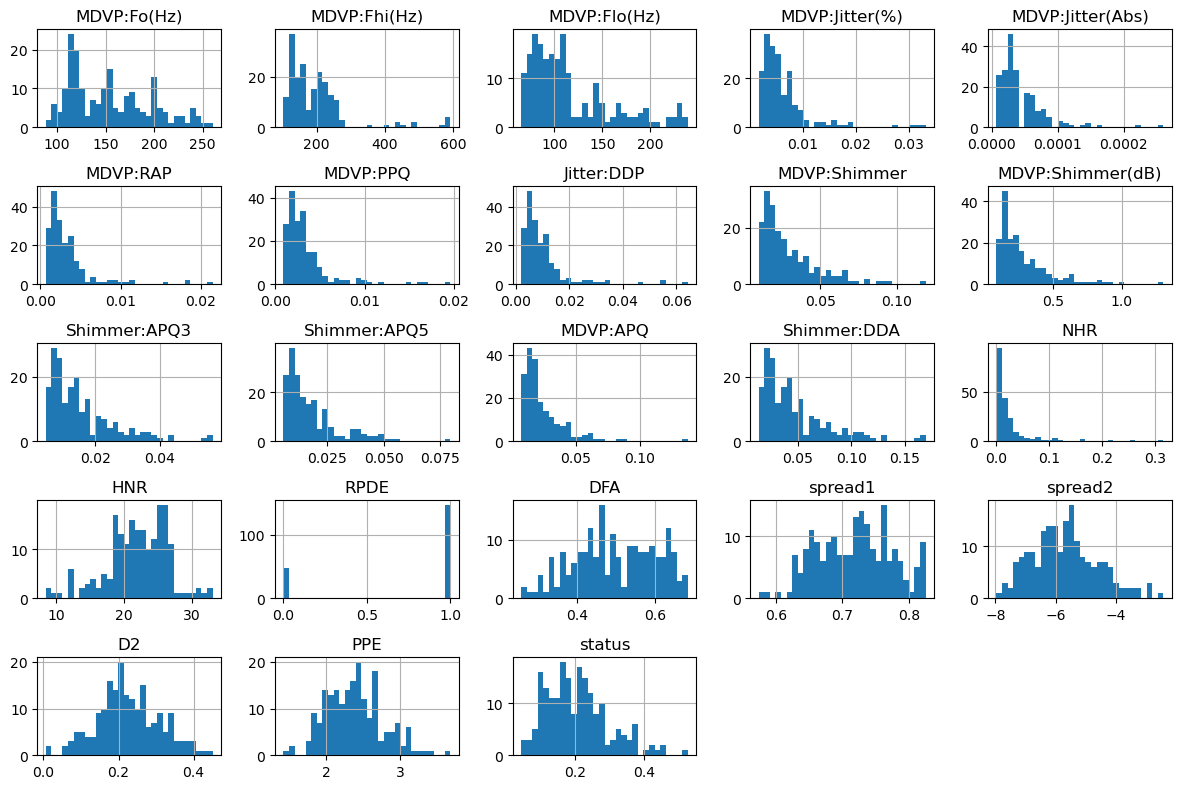

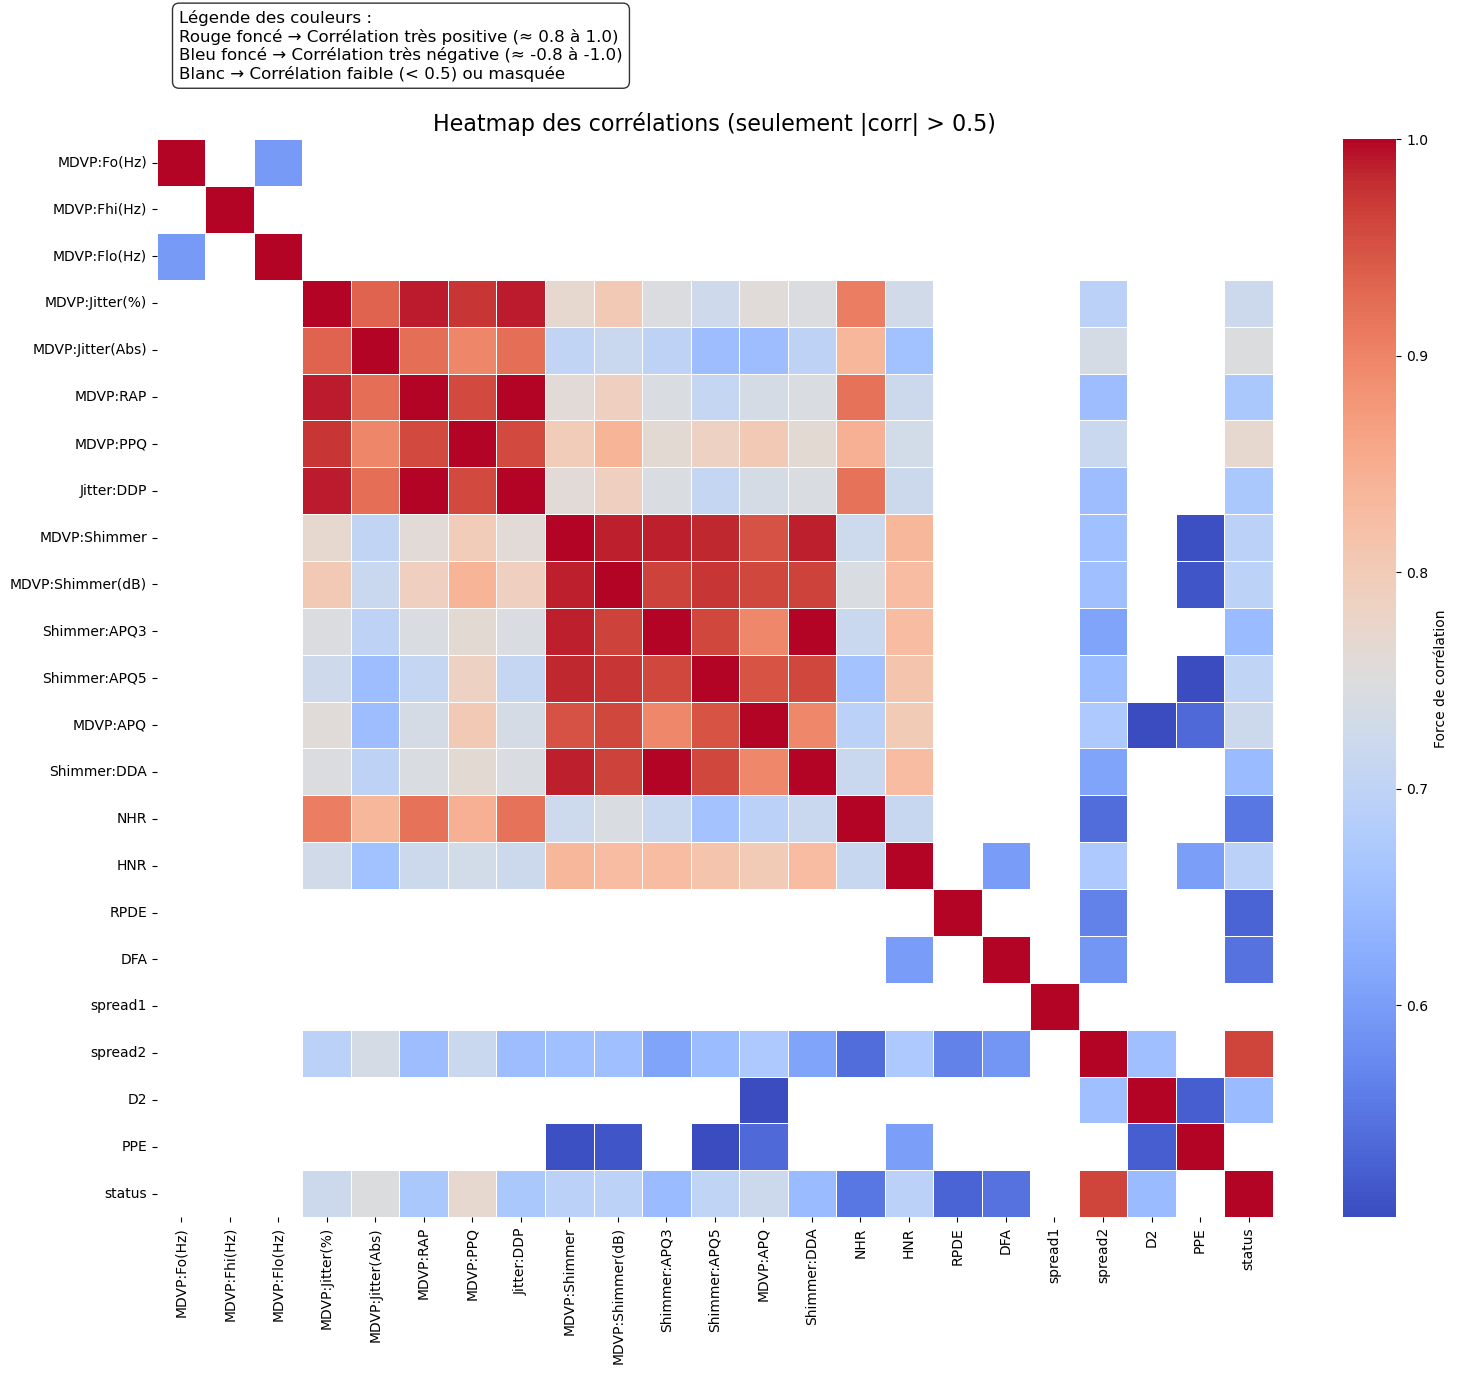


Aucune valeur manquante.


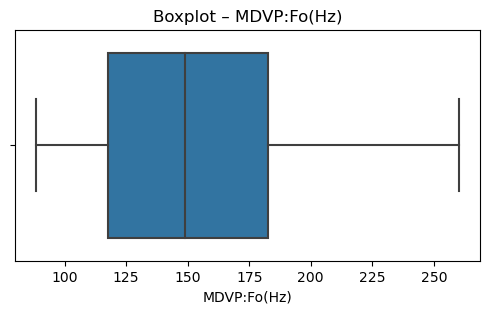

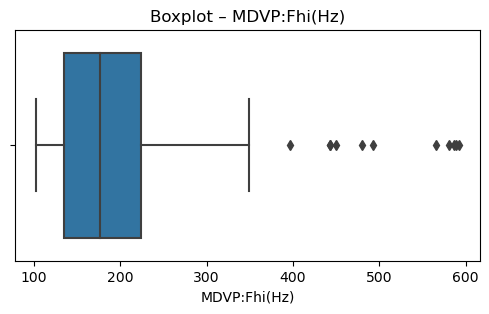

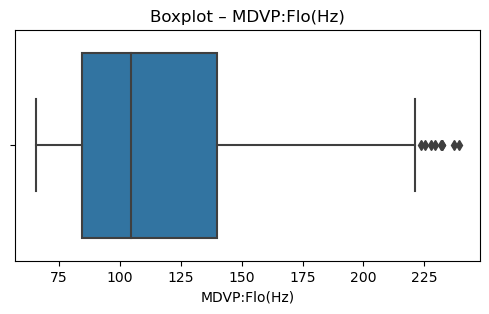

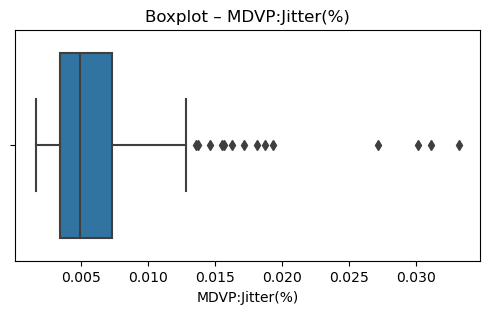

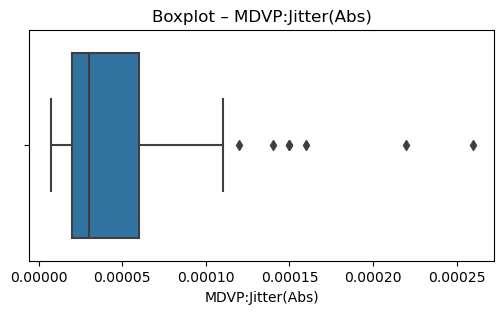

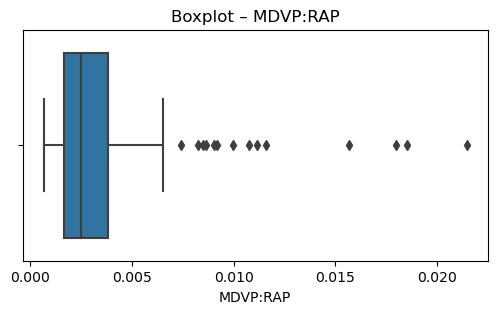

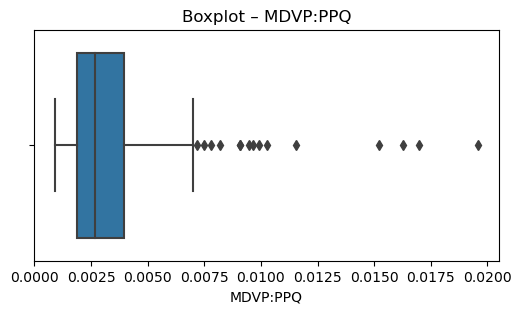

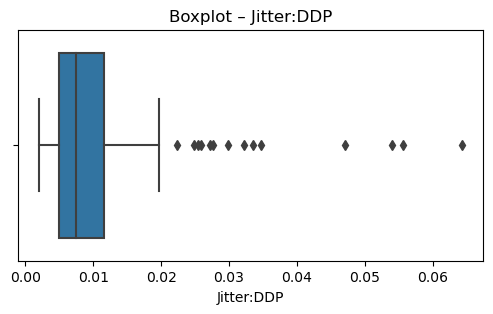

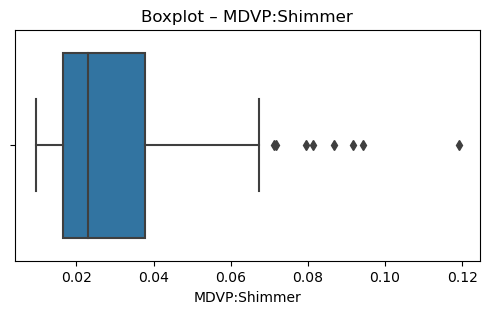

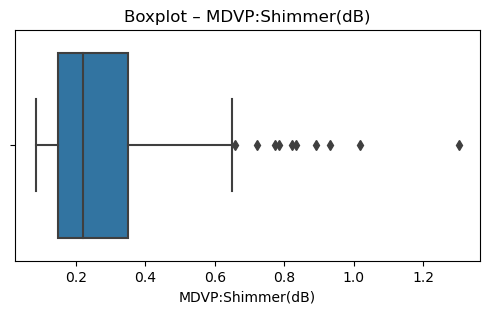

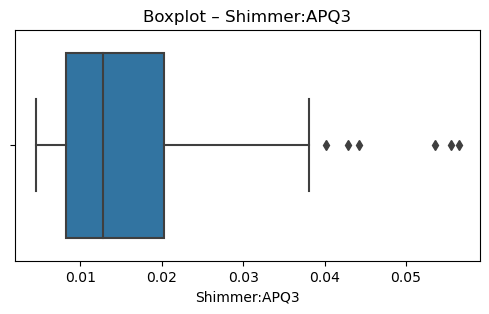

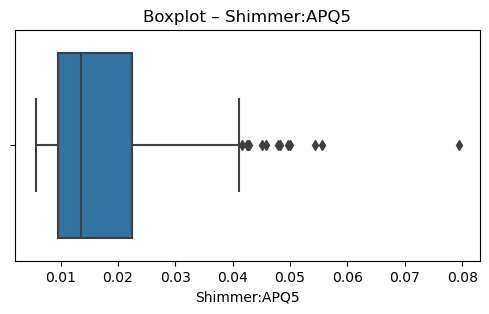

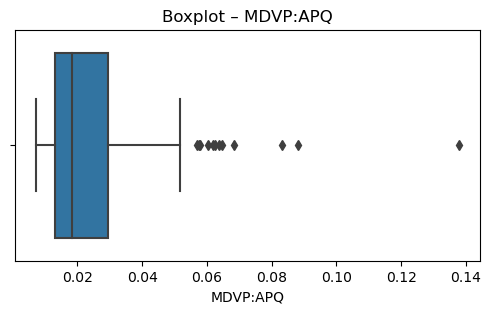

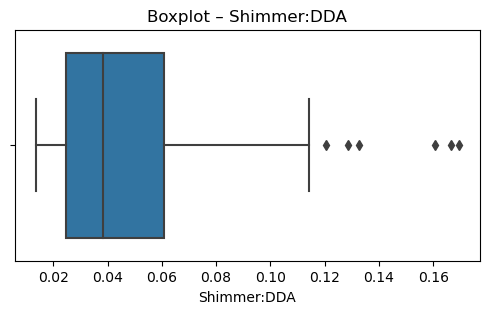

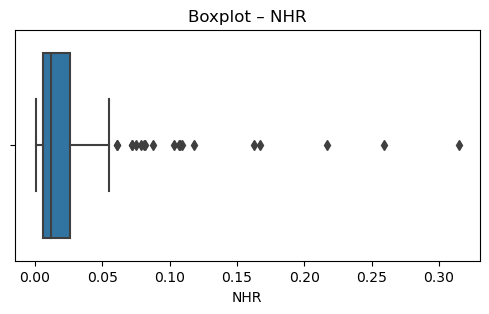

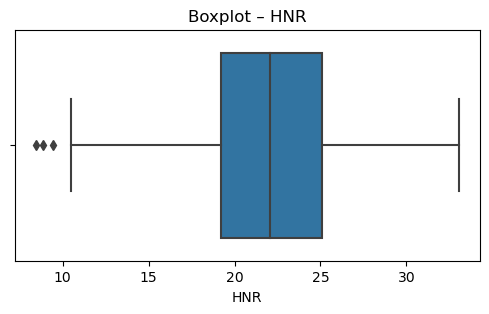

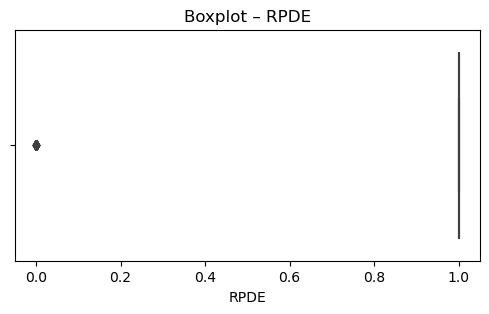

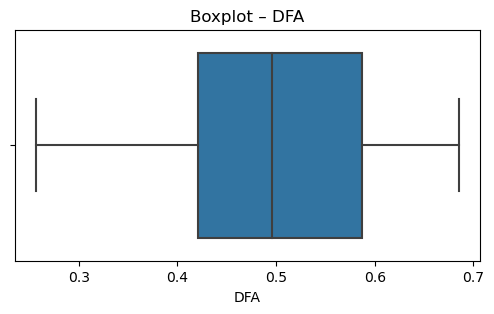

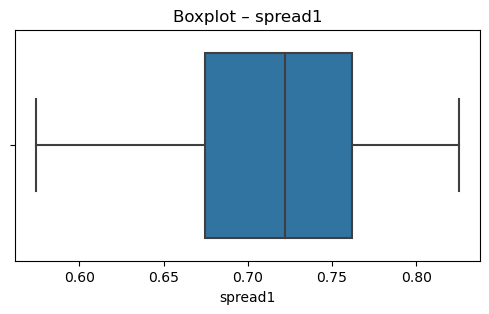

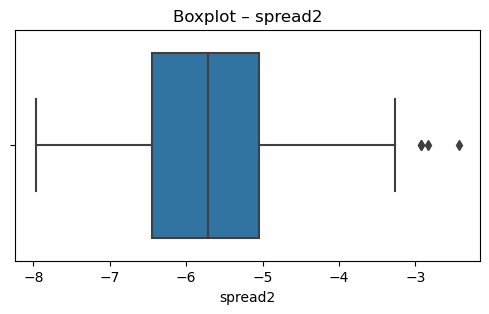

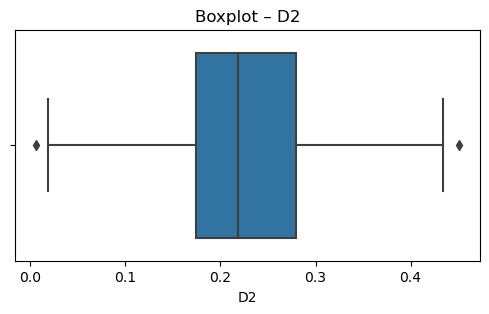

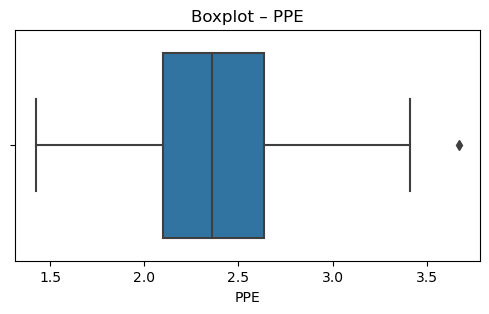

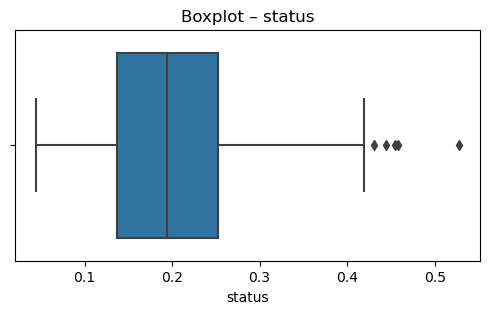

--------------------------------------------------------------------------------

 Dataset 7/14 : df7

🔹 Shape: (240, 48)

🔹 First 5 rows:


ID  Recording  Status  Gender  Jitter_rel  Jitter_abs  Jitter_RAP  \
0  CONT-01          1       0       1     0.25546    0.000015    0.001467   
1  CONT-01          2       0       1     0.36964    0.000022    0.001932   
2  CONT-01          3       0       1     0.23514    0.000013    0.001353   
3  CONT-02          1       0       0     0.29320    0.000017    0.001105   
4  CONT-02          2       0       0     0.23075    0.000015    0.001073   

   Jitter_PPQ  Shim_loc  Shim_dB  ...    Delta3    Delta4    Delta5    Delta6  \
0    0.001673  0.030256  0.26313  ...  1.407701  1.417218  1.380352  1.420670   
1    0.002245  0.023146  0.20217  ...  1.331232  1.227338  1.213377  1.352739   
2    0.001546  0.019338  0.16710  ...  1.412304  1.324674  1.276088  1.429634   
3    0.001444  0.024716  0.20892  ...  1.501200  1.534170  1.323993  1.496442   
4    0.001404  0.013119  0.11607  ...  1.508468  1.334511  1.610694  1.685021   

     Delta7    Delta8    Delta9   Delta10   Delta11   Delta12  
0  1.451240  1.440295  1.403678  1.405495  1.416705  1.354610  
1  1.354242  1.365692  1.322870  1.314549  1.318999  1.323508  
2  1.455996  1.368882  1.438053  1.388910  1.305469  1.305402  
3  1.472926  1.643177  1.551286  1.638346  1.604008  1.621456  
4  1.417614  1.574895  1.640088  1.533666  1.297536  1.382023  

[5 rows x 48 columns]


🔹 Last 5 rows:


ID  Recording  Status  Gender  Jitter_rel  Jitter_abs  Jitter_RAP  \
235  PARK-39          2       1       0     0.57585    0.000037    0.003701   
236  PARK-39          3       1       0     0.23322    0.000015    0.001270   
237  PARK-40          1       1       0     0.26862    0.000022    0.001354   
238  PARK-40          2       1       0     0.45376    0.000037    0.002724   
239  PARK-40          3       1       0     0.34706    0.000028    0.001746   

     Jitter_PPQ  Shim_loc  Shim_dB  ...    Delta3    Delta4    Delta5  \
235    0.005149  0.016868  0.14928  ...  1.116409  1.104511  1.099866   
236    0.001497  0.017923  0.16720  ...  1.107477  1.083859  1.101819   
237    0.001615  0.028040  0.24182  ...  1.335189  1.385580  1.281551   
238    0.002258  0.064605  0.58002  ...  1.327629  1.349928  1.461323   
239    0.002060  0.019914  0.17087  ...  1.440003  1.327946  1.531764   

       Delta6    Delta7    Delta8    Delta9   Delta10   Delta11   Delta12  
235  1.080320  1.154057  1.117423  1.167076  1.132436  1.107824  1.109144  
236  1.114161  1.090095  1.140705  1.126667  1.158444  1.096073  1.141835  
237  1.367171  1.319055  1.367095  1.343193  1.374330  1.383364  1.456409  
238  1.350599  1.346363  1.415338  1.361937  1.331923  1.423062  1.307353  
239  1.471198  1.445675  1.415942  1.304214  1.395653  1.315691  1.422534  

[5 rows x 48 columns]


🔹 Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 240 entries, 0 to 239
Data columns (total 48 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   ID          240 non-null    object 
 1   Recording   240 non-null    int64  
 2   Status      240 non-null    int64  
 3   Gender      240 non-null    int64  
 4   Jitter_rel  240 non-null    float64
 5   Jitter_abs  240 non-null    float64
 6   Jitter_RAP  240 non-null    float64
 7   Jitter_PPQ  240 non-null    float64
 8   Shim_loc    240 non-null    float64
 9   Shim_dB     240 non-null    float64
 10  Shim_APQ3   240 non-null    float64
 11  Shim_APQ5   240 non-null    float64
 12  Shi_APQ11   240 non-null    float64
 13  HNR05       240 non-null    float64
 14  HNR15       240 non-null    float64
 15  HNR25       240 non-null    float64
 16  HNR35       240 non-null    float64
 17  HNR38       240 non-null    float64
 18  RPDE        240 non-null    float64
 19  DFA         240 non-

Series([], dtype: int64)


🔹 Percentage of missing values per column:


Series([], dtype: float64)


🔹 Duplicate rows count: 0

🔹 Target variable preview:


Status
0       0
1       0
2       0
3       0
4       0


🔹 Numeric columns: ['Recording', 'Status', 'Gender', 'Jitter_rel', 'Jitter_abs', 'Jitter_RAP', 'Jitter_PPQ', 'Shim_loc', 'Shim_dB', 'Shim_APQ3', 'Shim_APQ5', 'Shi_APQ11', 'HNR05', 'HNR15', 'HNR25', 'HNR35', 'HNR38', 'RPDE', 'DFA', 'PPE', 'GNE', 'MFCC0', 'MFCC1', 'MFCC2', 'MFCC3', 'MFCC4', 'MFCC5', 'MFCC6', 'MFCC7', 'MFCC8', 'MFCC9', 'MFCC10', 'MFCC11', 'MFCC12', 'Delta0', 'Delta1', 'Delta2', 'Delta3', 'Delta4', 'Delta5', 'Delta6', 'Delta7', 'Delta8', 'Delta9', 'Delta10', 'Delta11', 'Delta12']

🔹 Number of outliers per numeric column:


{'Recording': 0,
 'Status': 0,
 'Gender': 0,
 'Jitter_rel': 11,
 'Jitter_abs': 10,
 'Jitter_RAP': 15,
 'Jitter_PPQ': 13,
 'Shim_loc': 11,
 'Shim_dB': 11,
 'Shim_APQ3': 12,
 'Shim_APQ5': 12,
 'Shi_APQ11': 12,
 'HNR05': 2,
 'HNR15': 1,
 'HNR25': 1,
 'HNR35': 1,
 'HNR38': 1,
 'RPDE': 2,
 'DFA': 0,
 'PPE': 0,
 'GNE': 0,
 'MFCC0': 2,
 'MFCC1': 0,
 'MFCC2': 2,
 'MFCC3': 2,
 'MFCC4': 1,
 'MFCC5': 4,
 'MFCC6': 3,
 'MFCC7': 2,
 'MFCC8': 3,
 'MFCC9': 1,
 'MFCC10': 8,
 'MFCC11': 1,
 'MFCC12': 2,
 'Delta0': 4,
 'Delta1': 3,
 'Delta2': 4,
 'Delta3': 1,
 'Delta4': 3,
 'Delta5': 1,
 'Delta6': 1,
 'Delta7': 0,
 'Delta8': 0,
 'Delta9': 1,
 'Delta10': 2,
 'Delta11': 2,
 'Delta12': 3}


📊 Distribution des variables numériques :


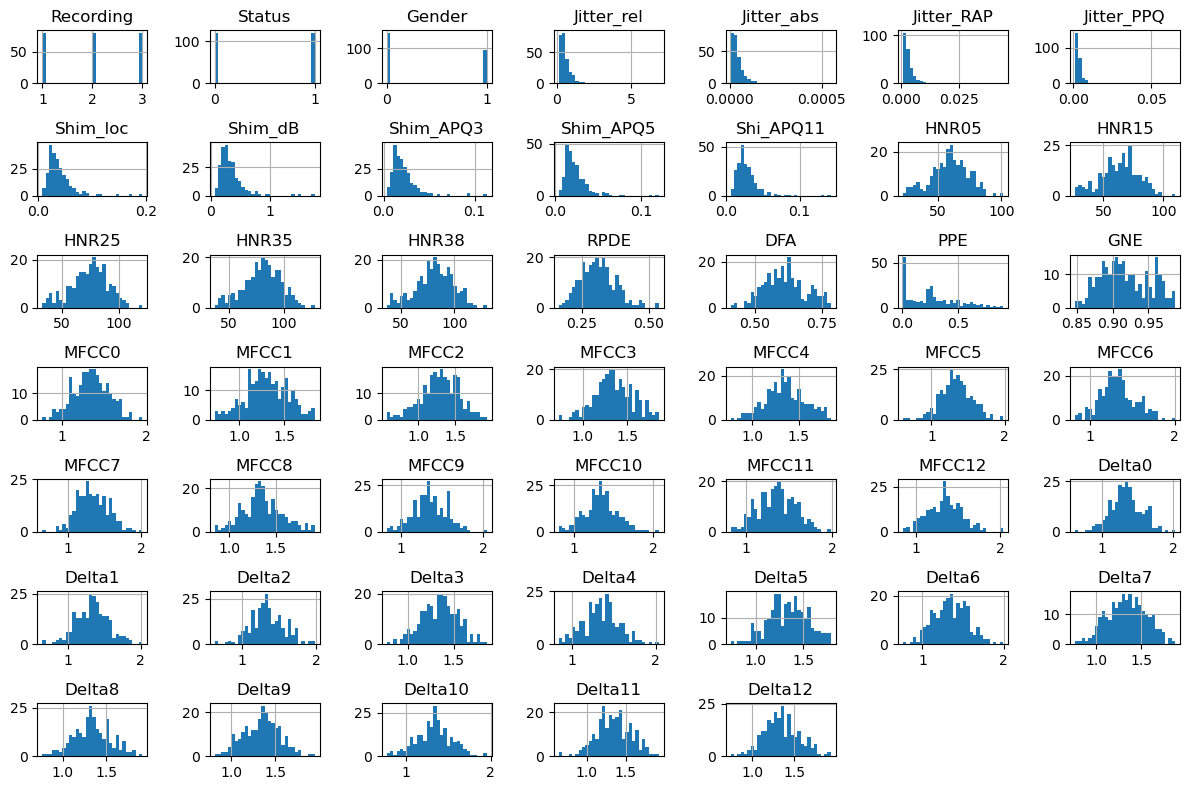

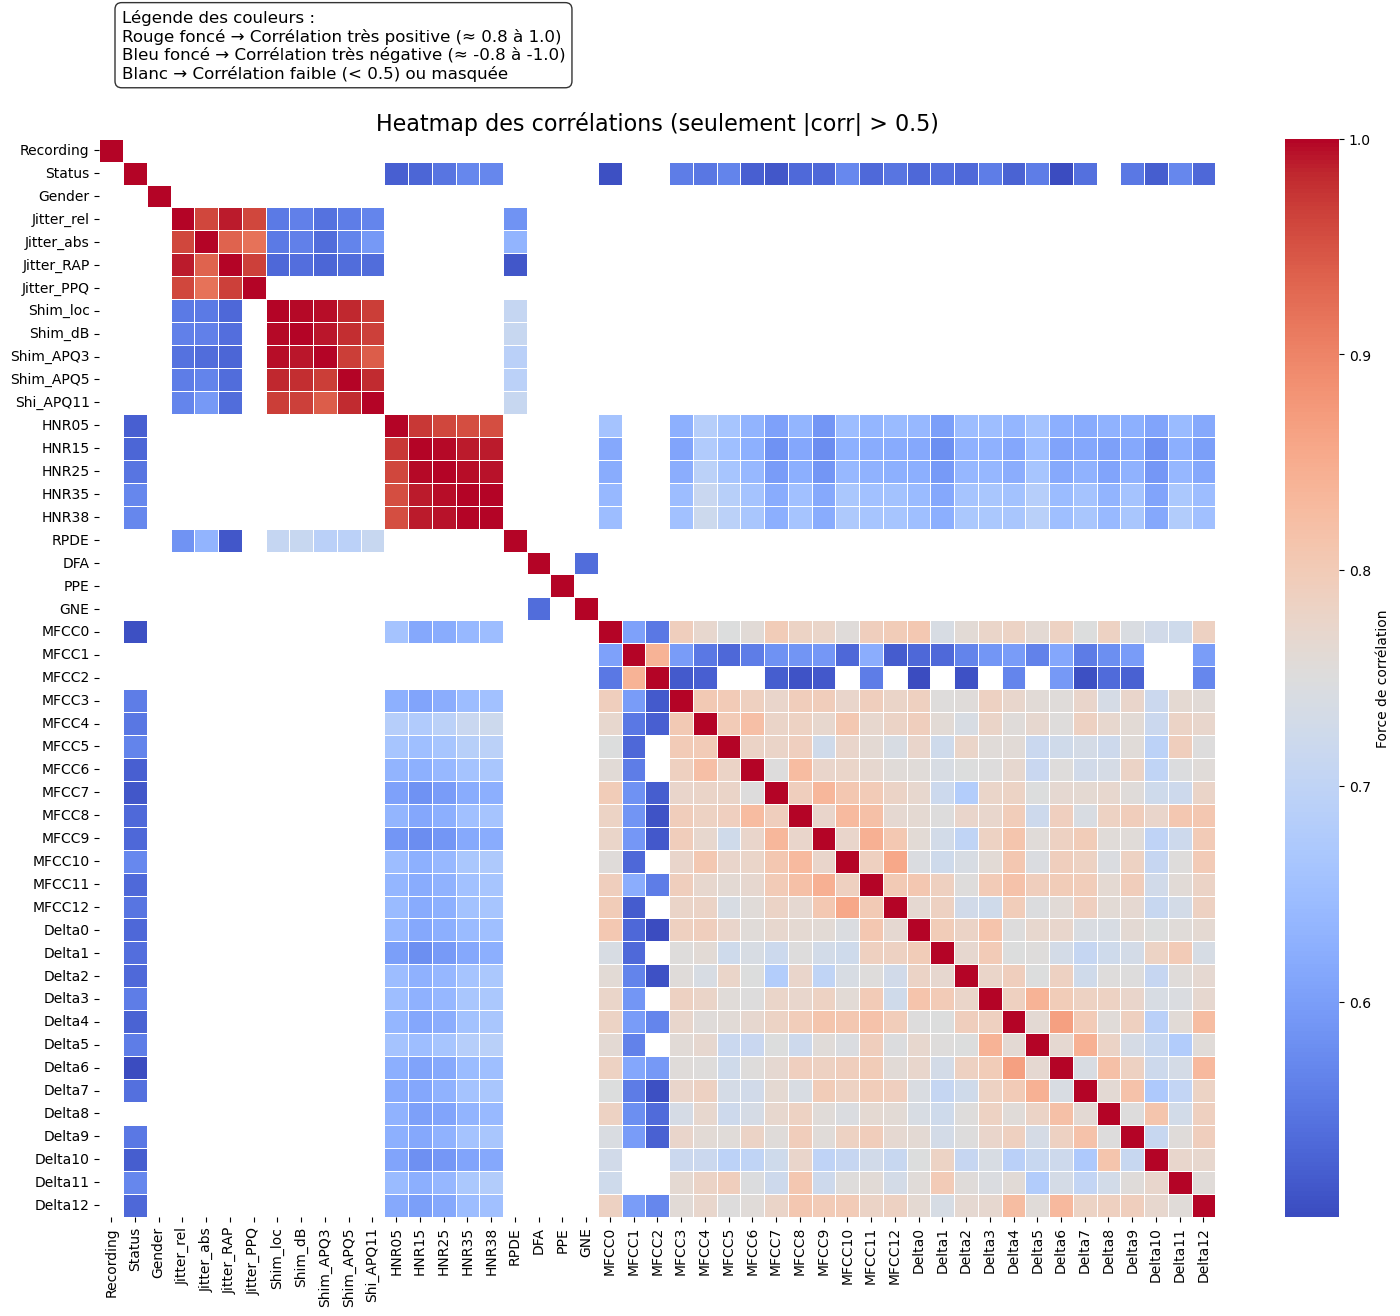


Aucune valeur manquante.


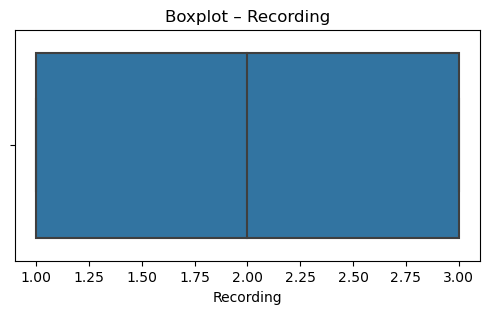

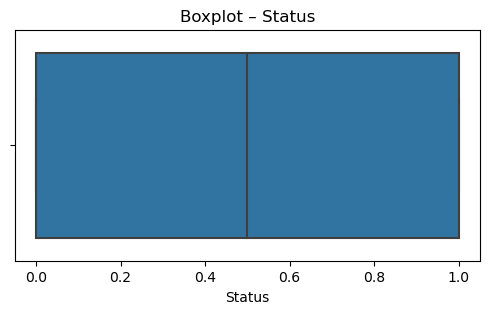

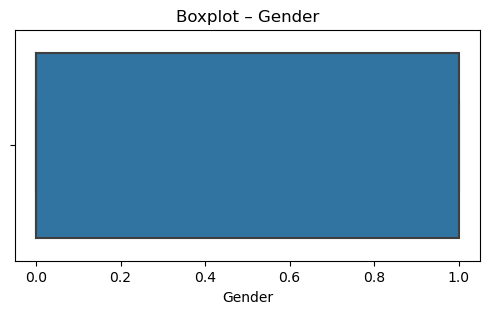

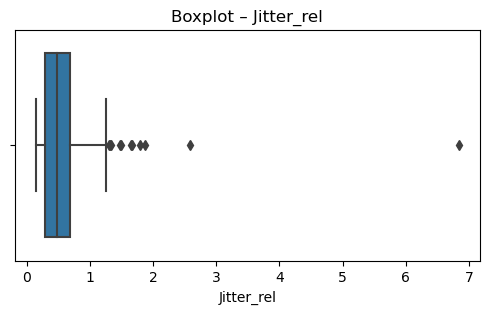

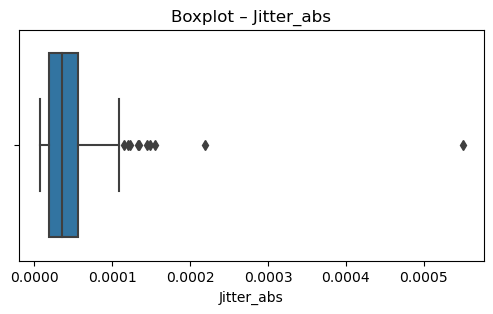

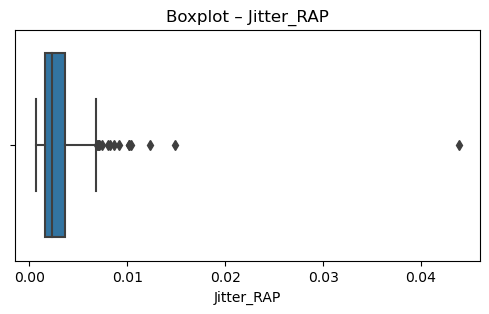

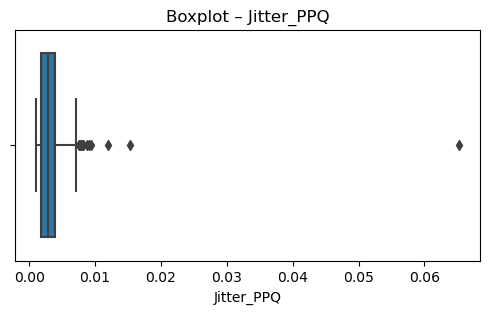

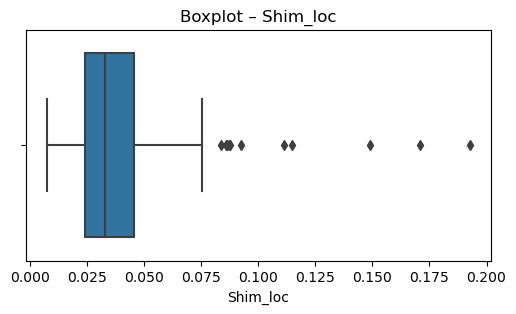

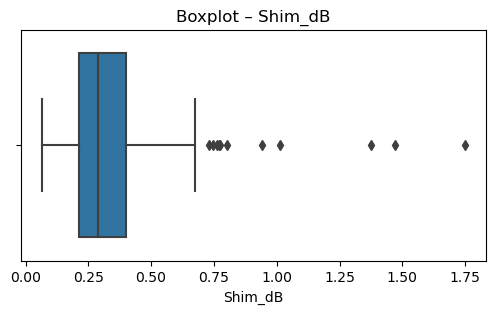

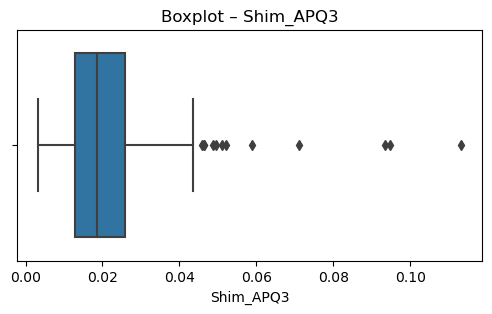

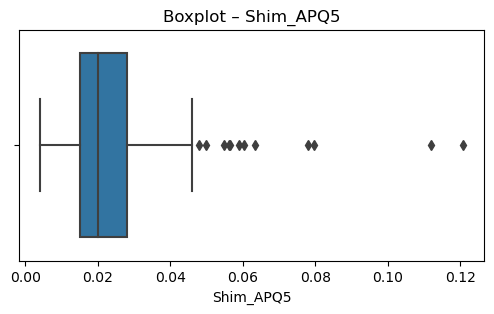

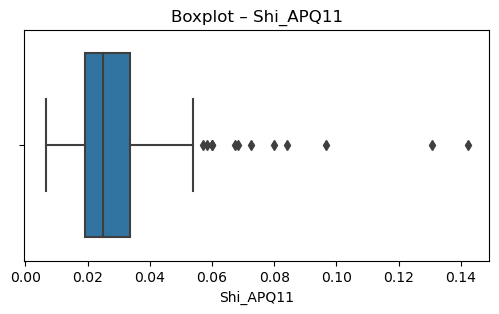

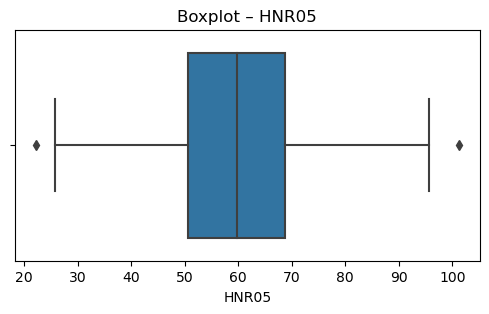

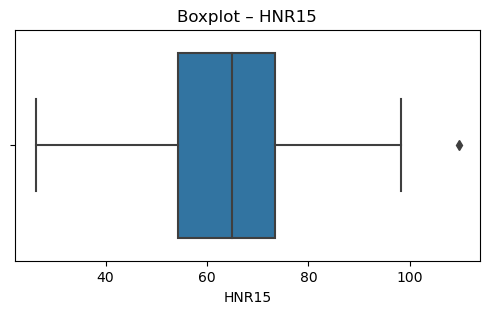

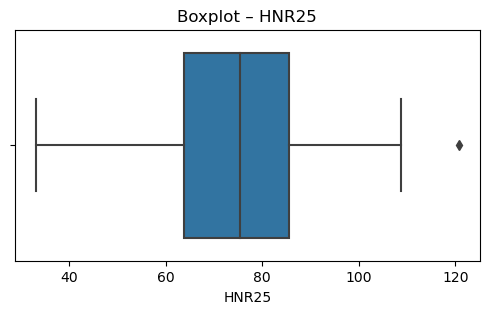

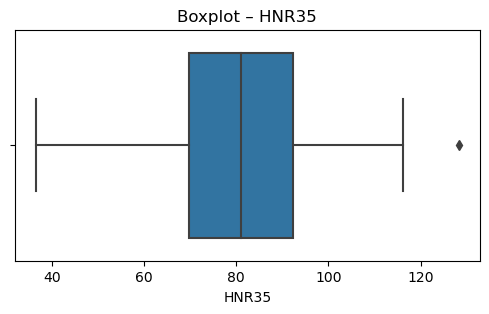

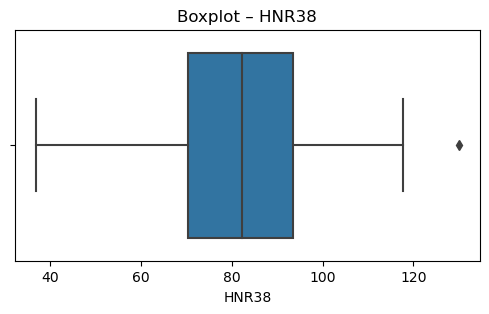

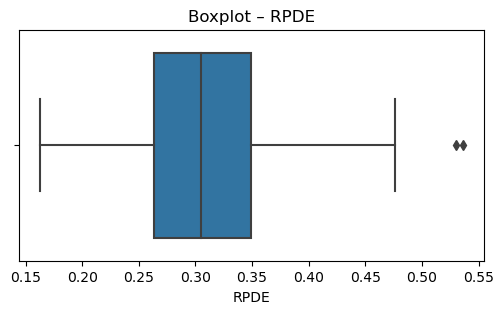

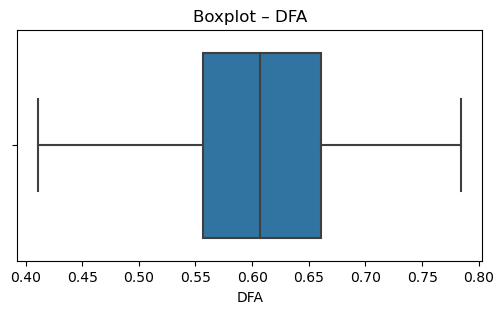

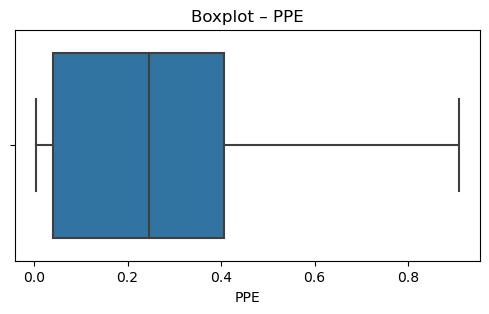

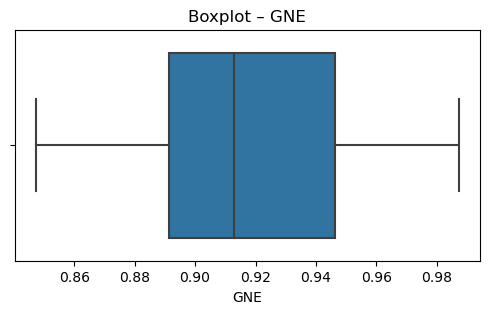

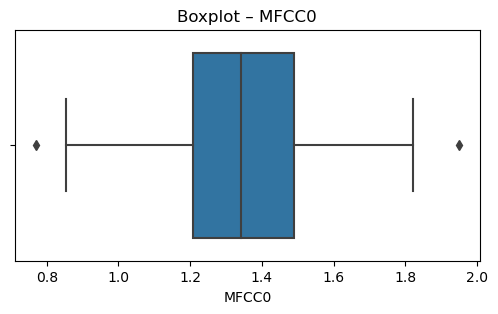

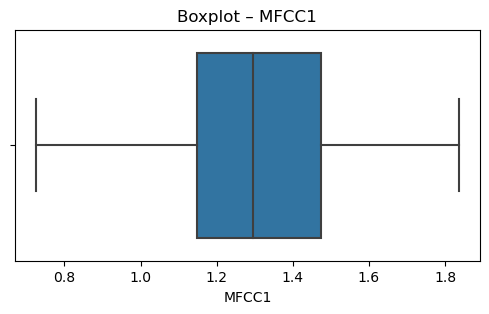

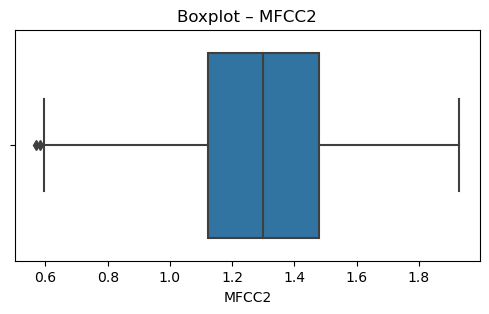

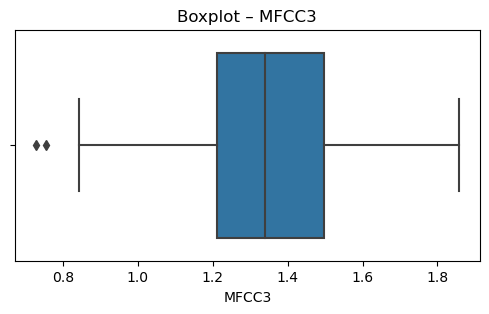

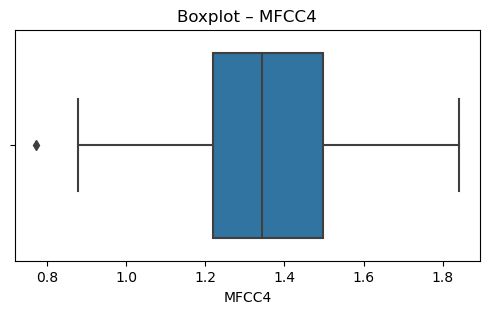

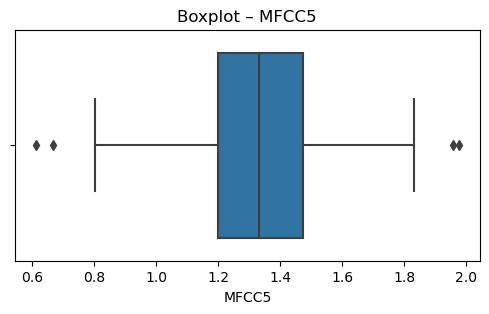

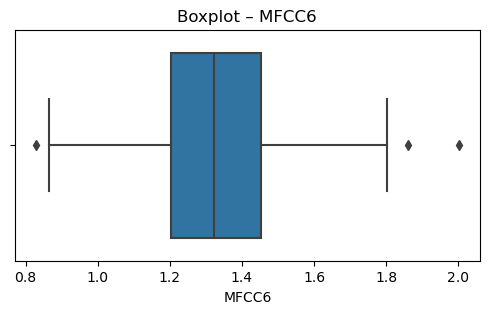

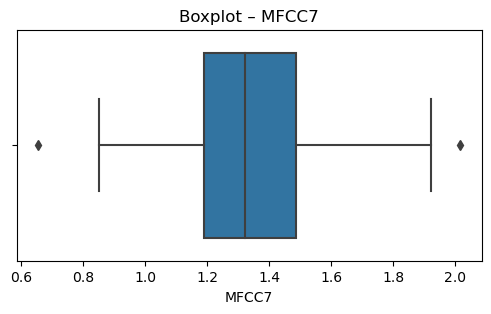

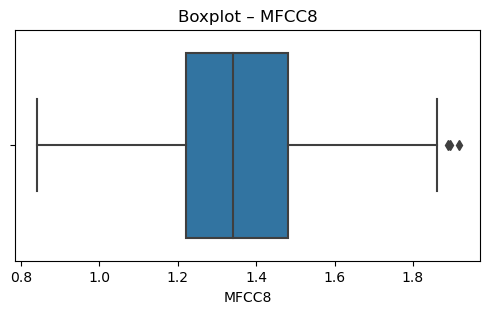

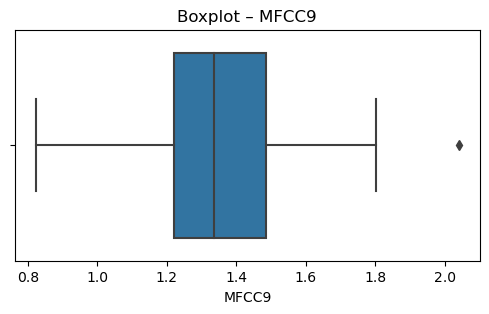

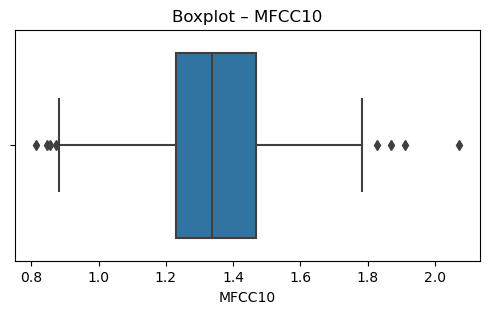

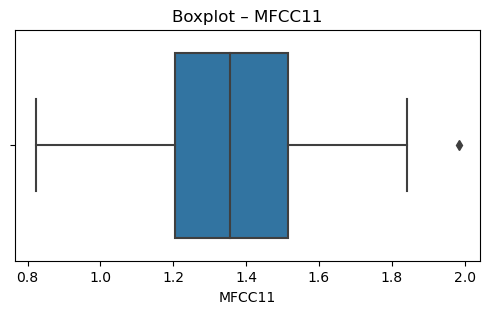

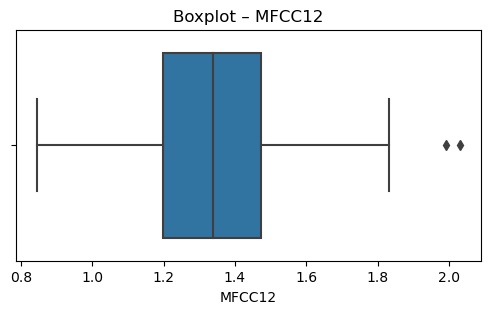

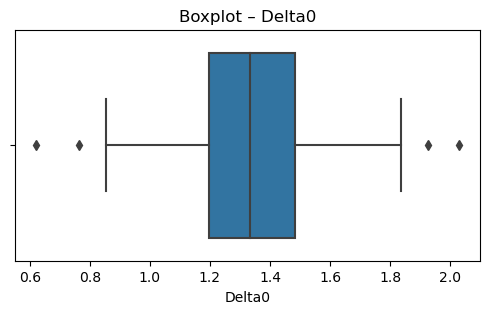

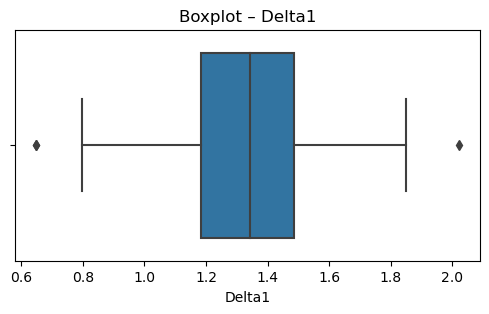

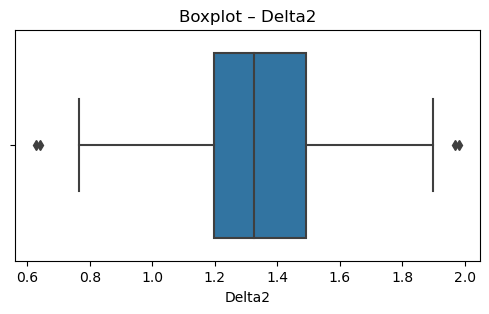

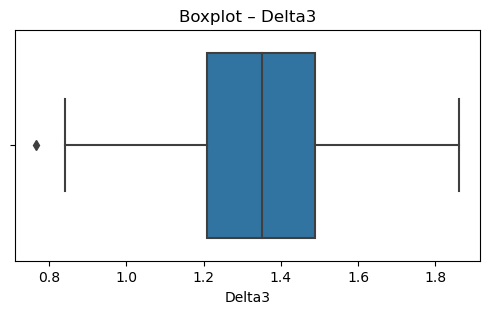

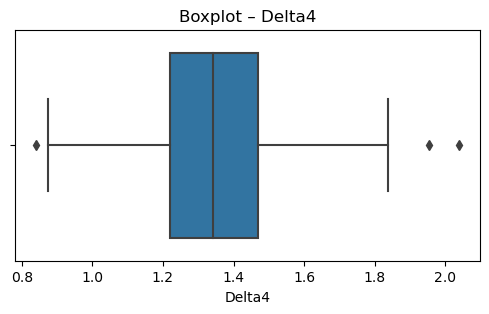

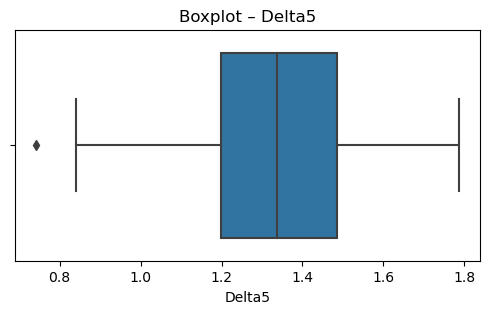

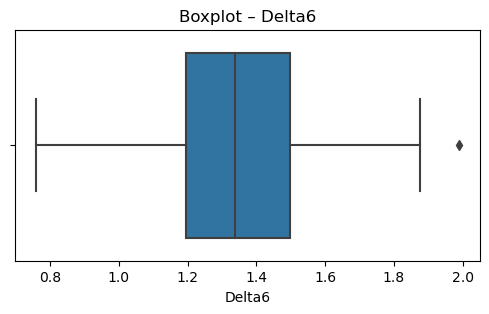

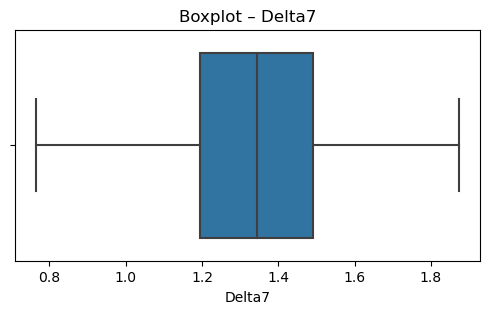

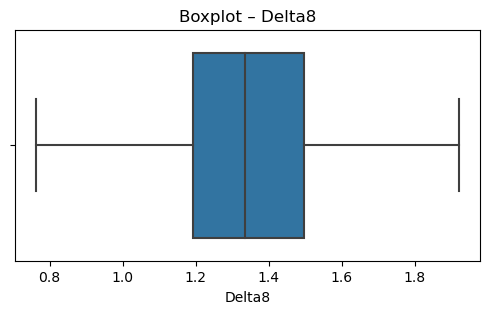

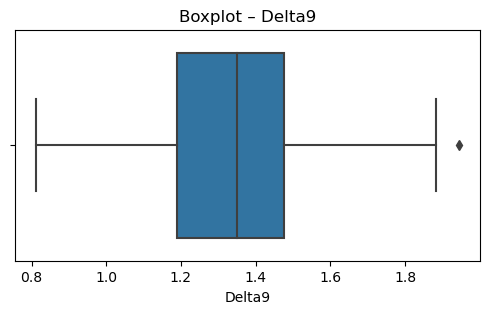

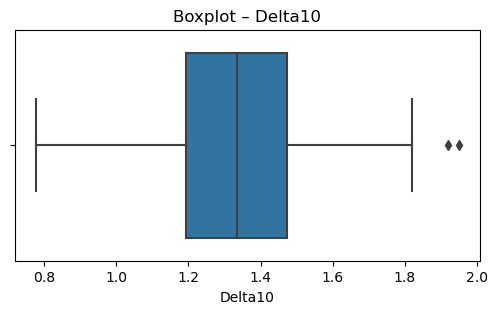

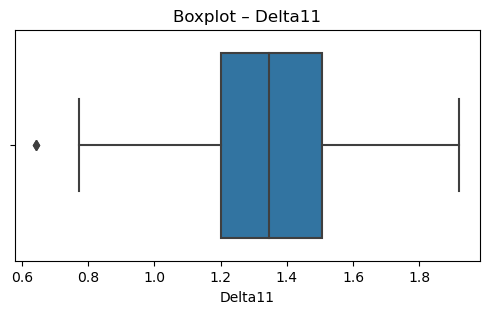

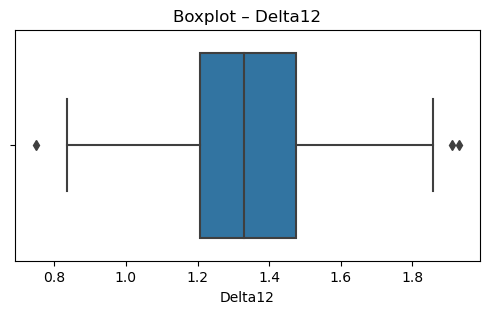

--------------------------------------------------------------------------------

 Dataset 8/14 : df8

🔹 Shape: (207, 61)

🔹 First 5 rows:


0.0200  0.0371  0.0428  0.0207  0.0954  0.0986  0.1539  0.1601  0.3109  \
0  0.0453  0.0523  0.0843  0.0689  0.1183  0.2583  0.2156  0.3481  0.3337   
1  0.0262  0.0582  0.1099  0.1083  0.0974  0.2280  0.2431  0.3771  0.5598   
2  0.0100  0.0171  0.0623  0.0205  0.0205  0.0368  0.1098  0.1276  0.0598   
3  0.0762  0.0666  0.0481  0.0394  0.0590  0.0649  0.1209  0.2467  0.3564   
4  0.0286  0.0453  0.0277  0.0174  0.0384  0.0990  0.1201  0.1833  0.2105   

   0.2111  ...  0.0027  0.0065  0.0159  0.0072  0.0167  0.0180  0.0084  \
0  0.2872  ...  0.0084  0.0089  0.0048  0.0094  0.0191  0.0140  0.0049   
1  0.6194  ...  0.0232  0.0166  0.0095  0.0180  0.0244  0.0316  0.0164   
2  0.1264  ...  0.0121  0.0036  0.0150  0.0085  0.0073  0.0050  0.0044   
3  0.4459  ...  0.0031  0.0054  0.0105  0.0110  0.0015  0.0072  0.0048   
4  0.3039  ...  0.0045  0.0014  0.0038  0.0013  0.0089  0.0057  0.0027   

   0.0090  0.0032  R  
0  0.0052  0.0044  R  
1  0.0095  0.0078  R  
2  0.0040  0.0117  R  
3  0.0107  0.0094  R  
4  0.0051  0.0062  R  

[5 rows x 61 columns]


🔹 Last 5 rows:


0.0200  0.0371  0.0428  0.0207  0.0954  0.0986  0.1539  0.1601  0.3109  \
202  0.0187  0.0346  0.0168  0.0177  0.0393  0.1630  0.2028  0.1694  0.2328   
203  0.0323  0.0101  0.0298  0.0564  0.0760  0.0958  0.0990  0.1018  0.1030   
204  0.0522  0.0437  0.0180  0.0292  0.0351  0.1171  0.1257  0.1178  0.1258   
205  0.0303  0.0353  0.0490  0.0608  0.0167  0.1354  0.1465  0.1123  0.1945   
206  0.0260  0.0363  0.0136  0.0272  0.0214  0.0338  0.0655  0.1400  0.1843   

     0.2111  ...  0.0027  0.0065  0.0159  0.0072  0.0167  0.0180  0.0084  \
202  0.2684  ...  0.0116  0.0098  0.0199  0.0033  0.0101  0.0065  0.0115   
203  0.2154  ...  0.0061  0.0093  0.0135  0.0063  0.0063  0.0034  0.0032   
204  0.2529  ...  0.0160  0.0029  0.0051  0.0062  0.0089  0.0140  0.0138   
205  0.2354  ...  0.0086  0.0046  0.0126  0.0036  0.0035  0.0034  0.0079   
206  0.2354  ...  0.0146  0.0129  0.0047  0.0039  0.0061  0.0040  0.0036   

     0.0090  0.0032  R  
202  0.0193  0.0157  M  
203  0.0062  0.0067  M  
204  0.0077  0.0031  M  
205  0.0036  0.0048  M  
206  0.0061  0.0115  M  

[5 rows x 61 columns]


🔹 Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 207 entries, 0 to 206
Data columns (total 61 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0.0200  207 non-null    float64
 1   0.0371  207 non-null    float64
 2   0.0428  207 non-null    float64
 3   0.0207  207 non-null    float64
 4   0.0954  207 non-null    float64
 5   0.0986  207 non-null    float64
 6   0.1539  207 non-null    float64
 7   0.1601  207 non-null    float64
 8   0.3109  207 non-null    float64
 9   0.2111  207 non-null    float64
 10  0.1609  207 non-null    float64
 11  0.1582  207 non-null    float64
 12  0.2238  207 non-null    float64
 13  0.0645  207 non-null    float64
 14  0.0660  207 non-null    float64
 15  0.2273  207 non-null    float64
 16  0.3100  207 non-null    float64
 17  0.2999  207 non-null    float64
 18  0.5078  207 non-null    float64
 19  0.4797  207 non-null    float64
 20  0.5783  207 non-null    float64
 21  0.5071  207 non-null    float6

Series([], dtype: int64)


🔹 Percentage of missing values per column:


Series([], dtype: float64)


🔹 Duplicate rows count: 0

🔹 Target variable preview:


R
0  R
1  R
2  R
3  R
4  R


🔹 Numeric columns: ['0.0200', '0.0371', '0.0428', '0.0207', '0.0954', '0.0986', '0.1539', '0.1601', '0.3109', '0.2111', '0.1609', '0.1582', '0.2238', '0.0645', '0.0660', '0.2273', '0.3100', '0.2999', '0.5078', '0.4797', '0.5783', '0.5071', '0.4328', '0.5550', '0.6711', '0.6415', '0.7104', '0.8080', '0.6791', '0.3857', '0.1307', '0.2604', '0.5121', '0.7547', '0.8537', '0.8507', '0.6692', '0.6097', '0.4943', '0.2744', '0.0510', '0.2834', '0.2825', '0.4256', '0.2641', '0.1386', '0.1051', '0.1343', '0.0383', '0.0324', '0.0232', '0.0027', '0.0065', '0.0159', '0.0072', '0.0167', '0.0180', '0.0084', '0.0090', '0.0032']

🔹 Number of outliers per numeric column:


{'0.0200': 15,
 '0.0371': 12,
 '0.0428': 11,
 '0.0207': 11,
 '0.0954': 5,
 '0.0986': 8,
 '0.1539': 5,
 '0.1601': 11,
 '0.3109': 9,
 '0.2111': 10,
 '0.1609': 5,
 '0.1582': 2,
 '0.2238': 4,
 '0.0645': 5,
 '0.0660': 2,
 '0.2273': 0,
 '0.3100': 0,
 '0.2999': 0,
 '0.5078': 0,
 '0.4797': 0,
 '0.5783': 0,
 '0.5071': 0,
 '0.4328': 0,
 '0.5550': 2,
 '0.6711': 0,
 '0.6415': 0,
 '0.7104': 0,
 '0.8080': 0,
 '0.6791': 0,
 '0.3857': 0,
 '0.1307': 0,
 '0.2604': 0,
 '0.5121': 0,
 '0.7547': 0,
 '0.8537': 0,
 '0.8507': 0,
 '0.6692': 0,
 '0.6097': 9,
 '0.4943': 5,
 '0.2744': 4,
 '0.0510': 4,
 '0.2834': 3,
 '0.2825': 5,
 '0.4256': 12,
 '0.2641': 25,
 '0.1386': 16,
 '0.1051': 13,
 '0.1343': 9,
 '0.0383': 7,
 '0.0324': 14,
 '0.0232': 6,
 '0.0027': 14,
 '0.0065': 3,
 '0.0159': 7,
 '0.0072': 9,
 '0.0167': 9,
 '0.0180': 8,
 '0.0084': 8,
 '0.0090': 12,
 '0.0032': 8}


📊 Distribution des variables numériques :


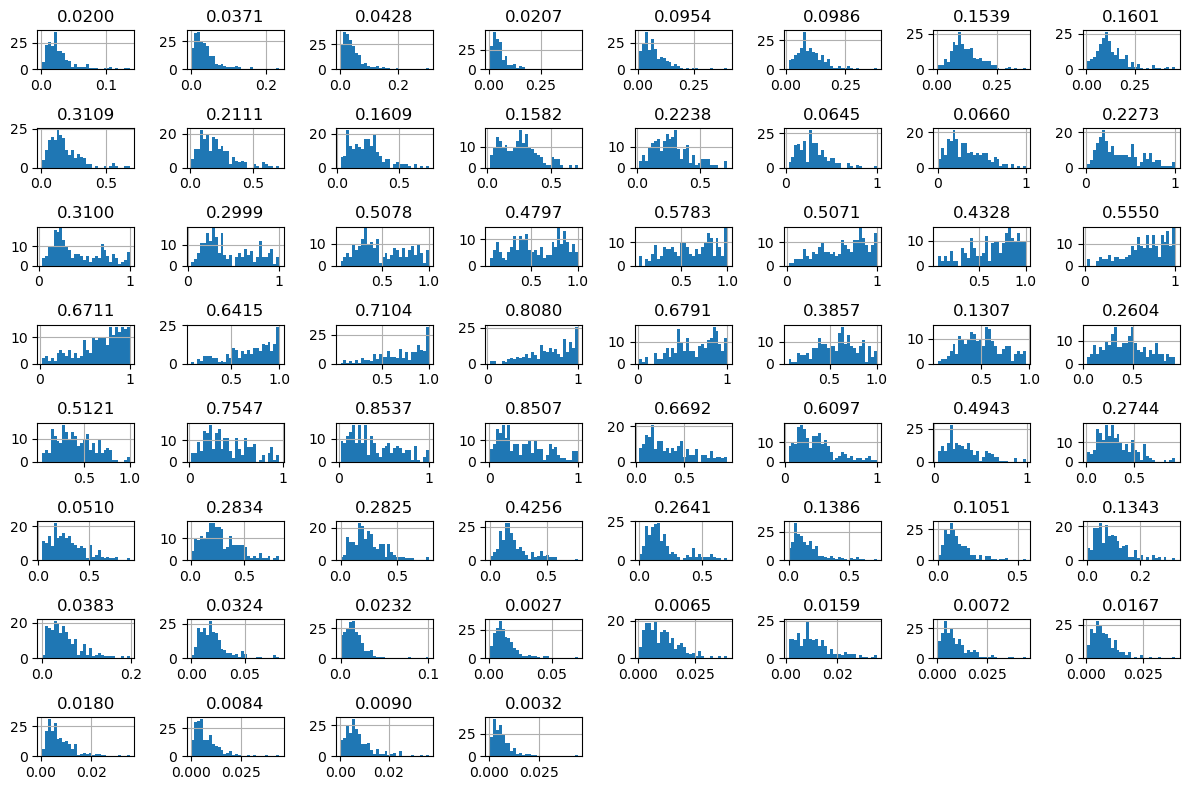

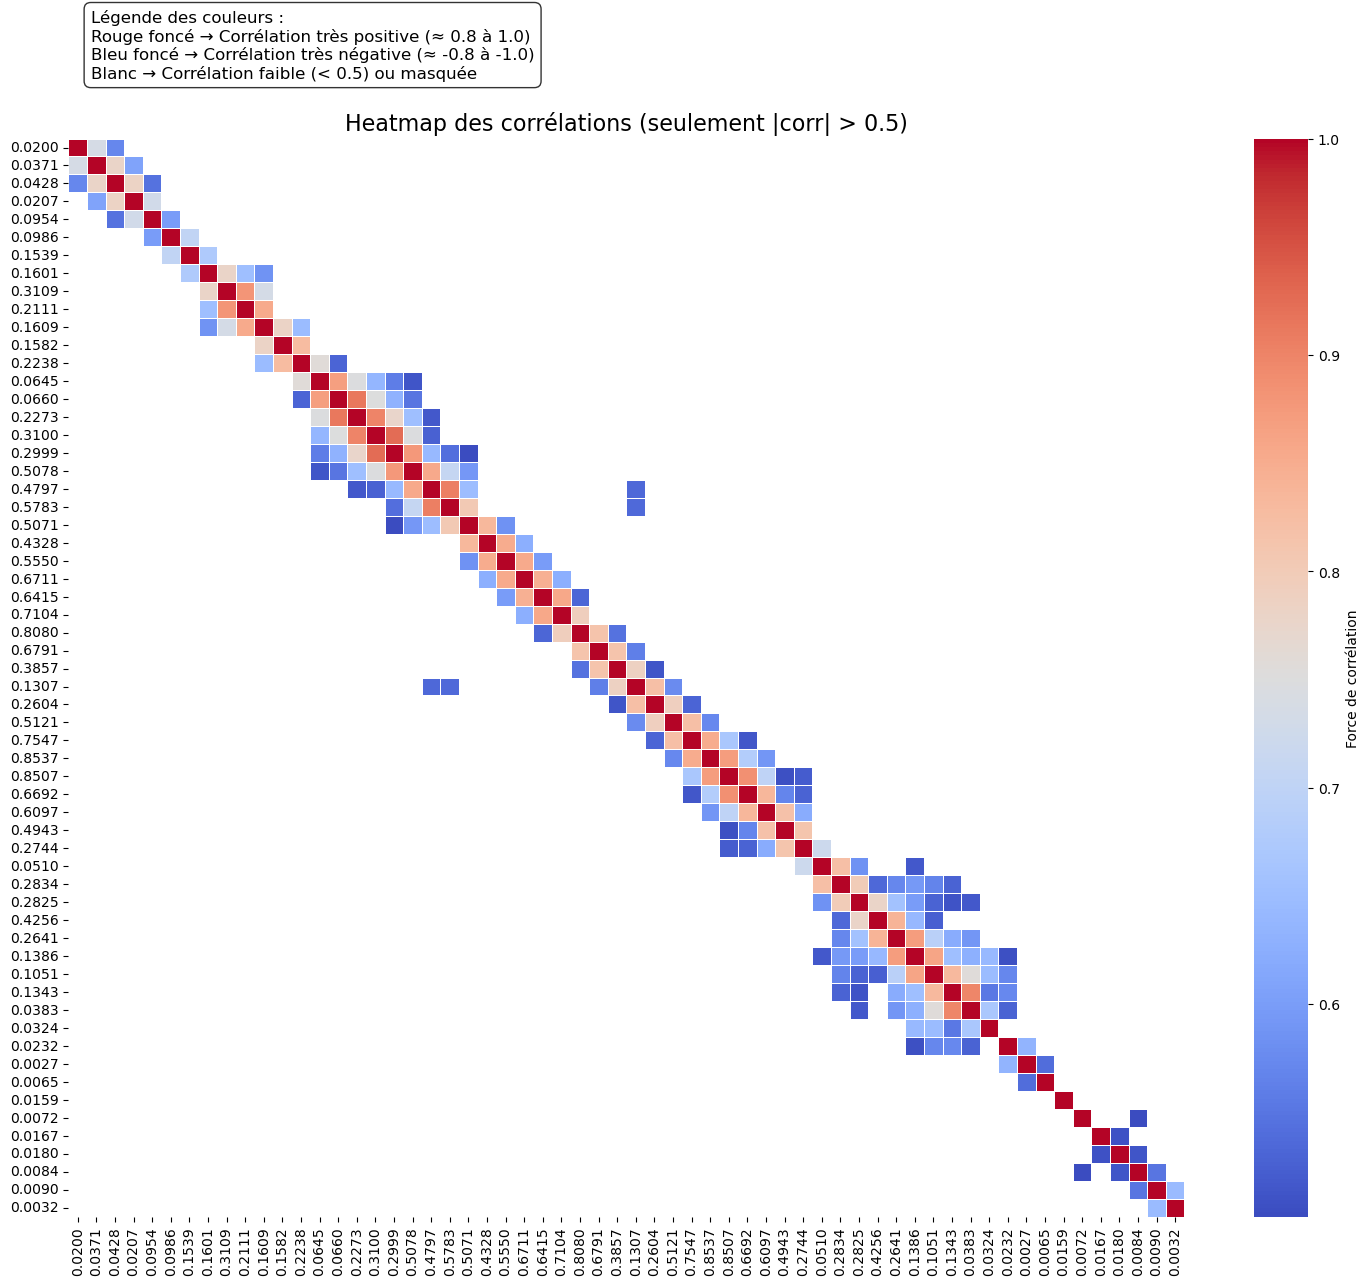


Aucune valeur manquante.


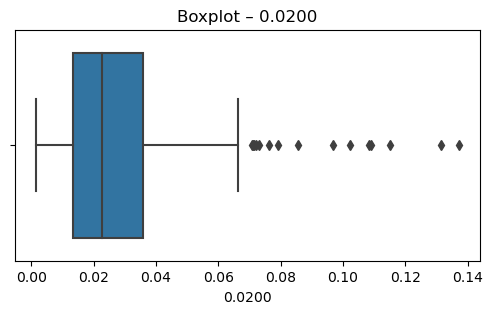

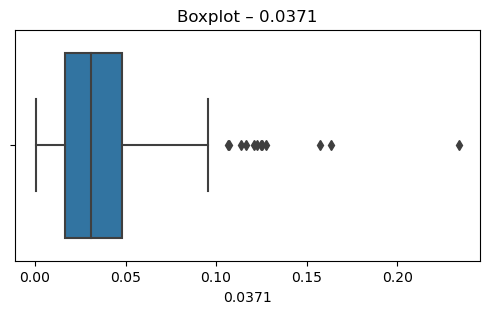

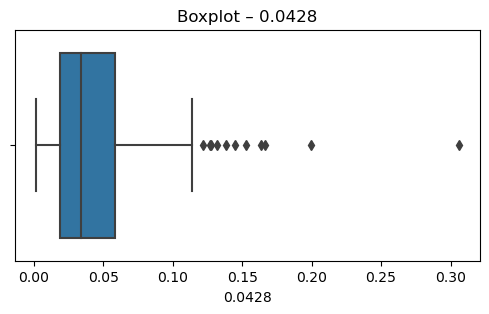

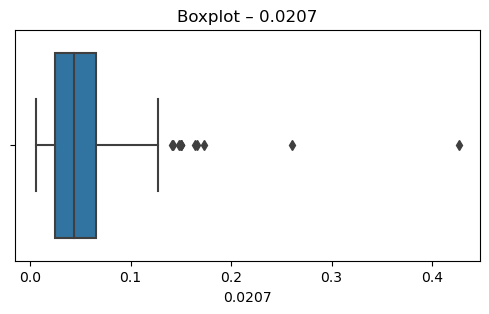

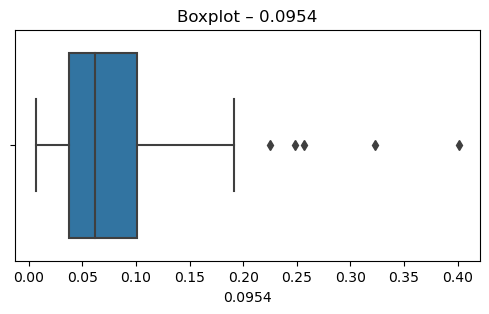

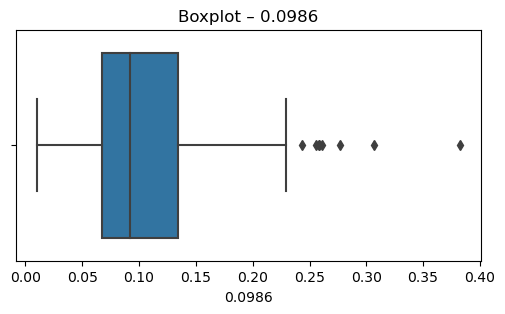

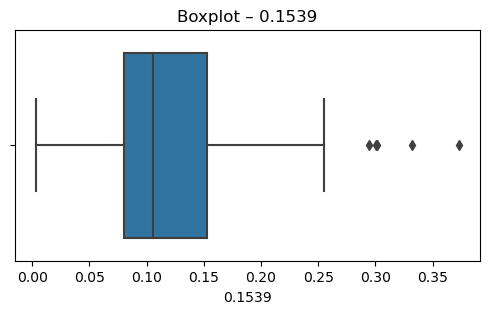

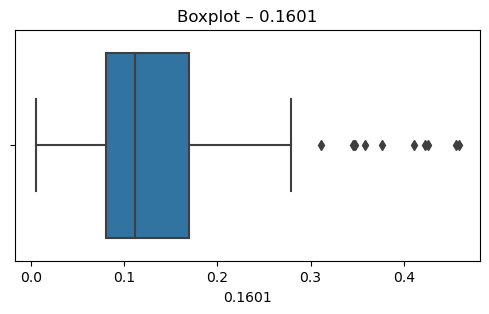

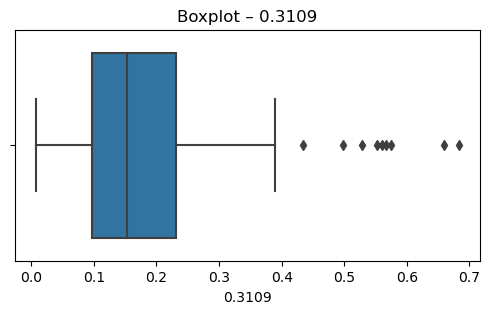

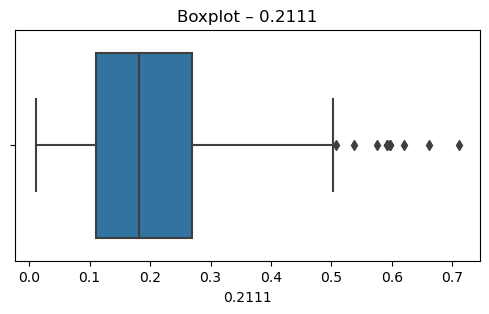

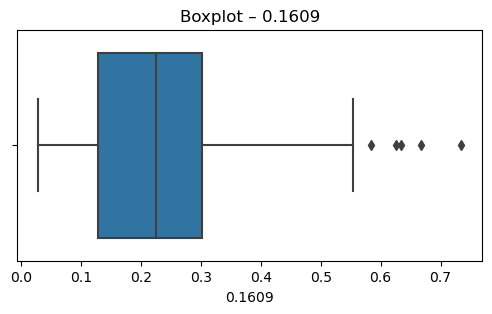

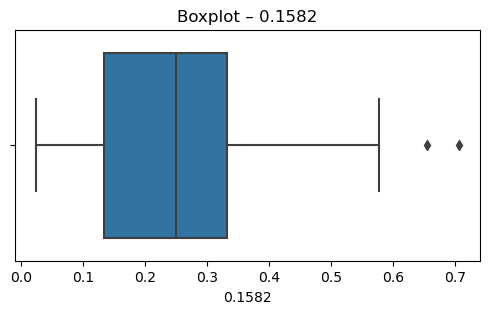

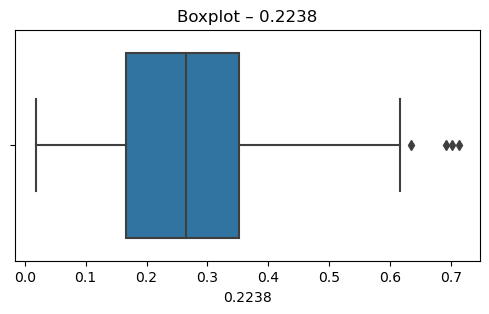

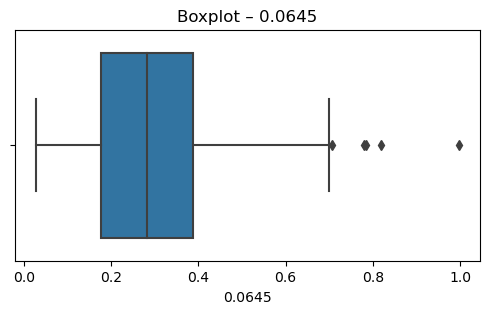

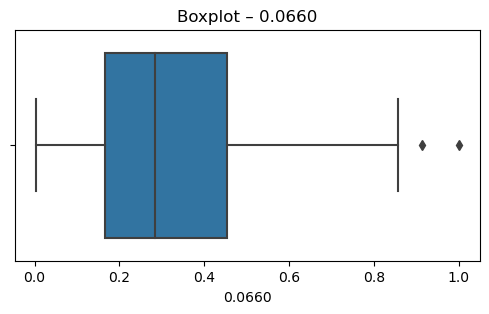

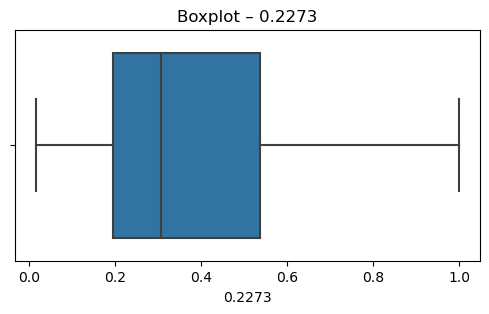

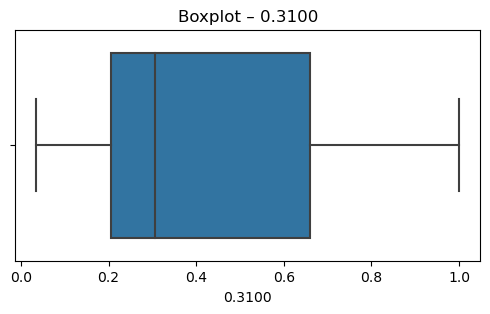

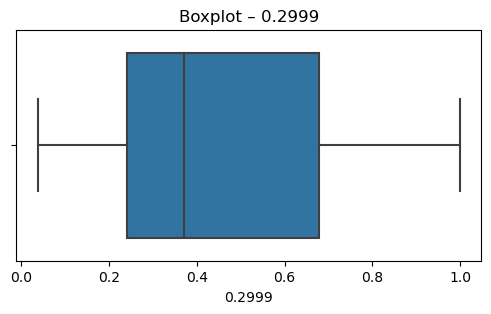

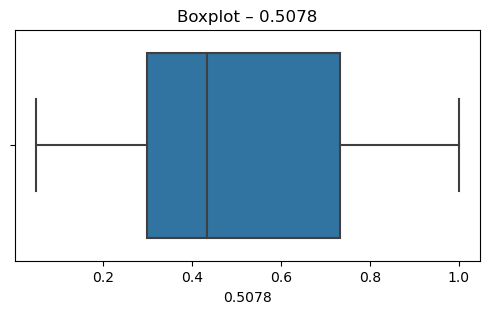

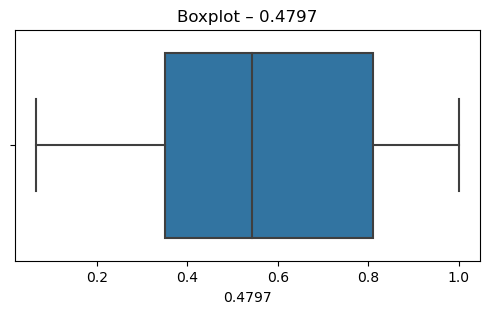

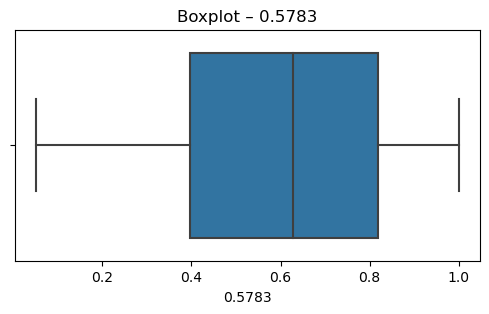

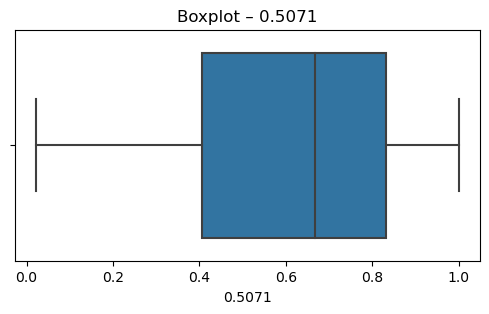

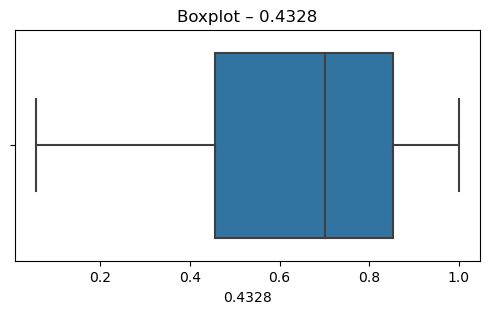

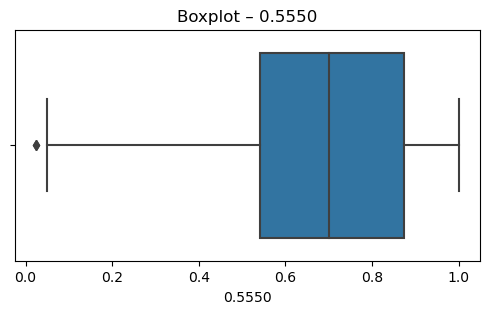

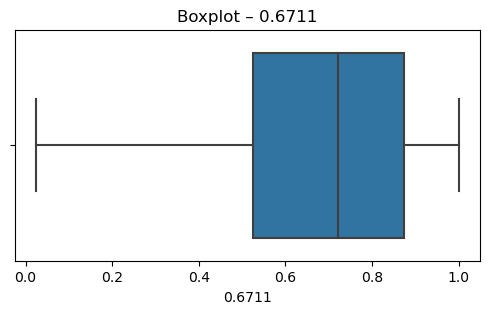

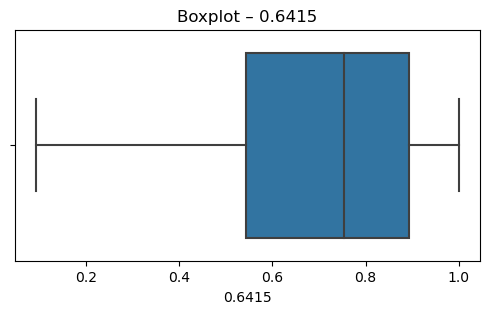

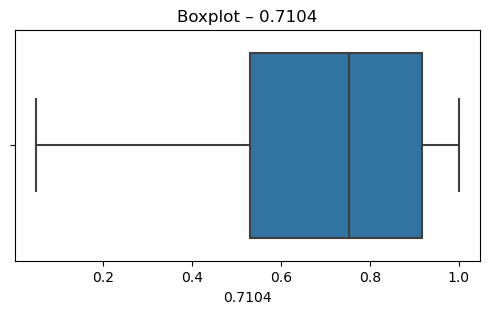

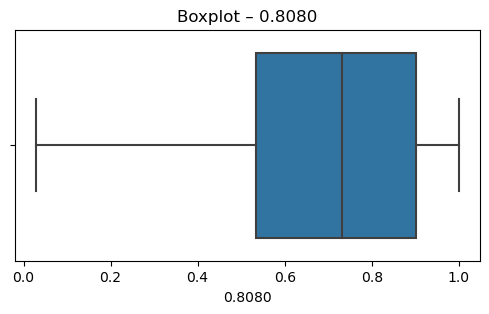

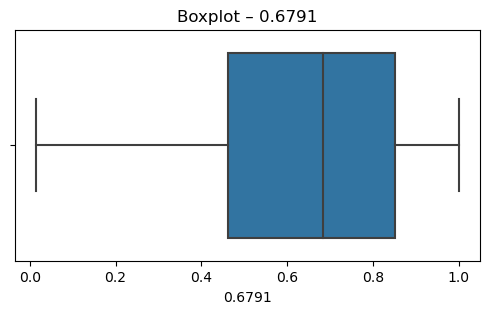

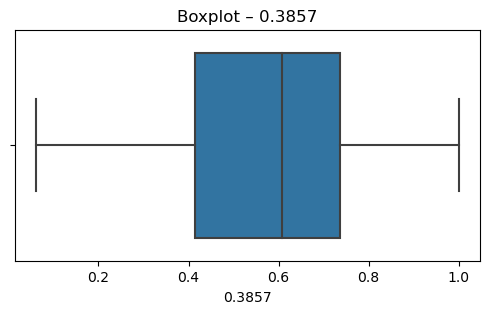

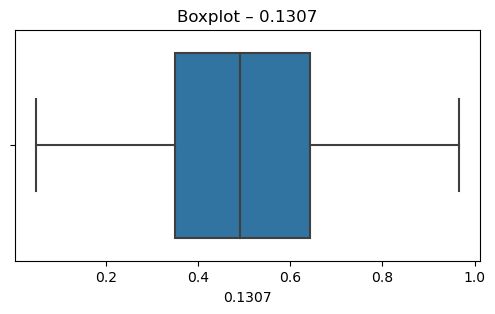

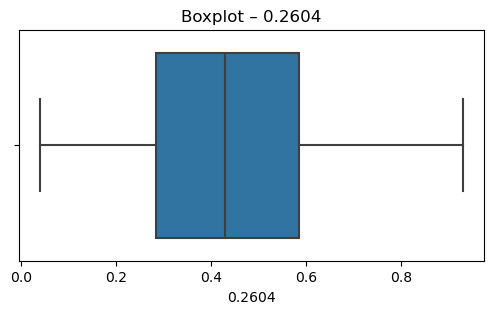

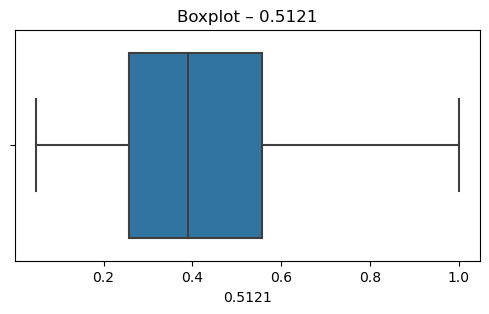

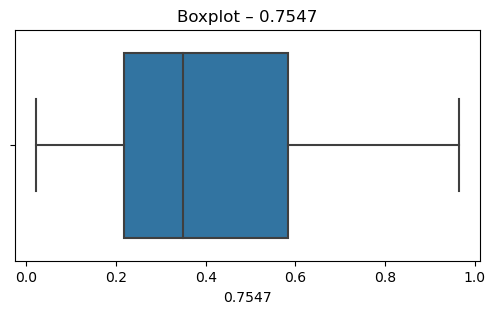

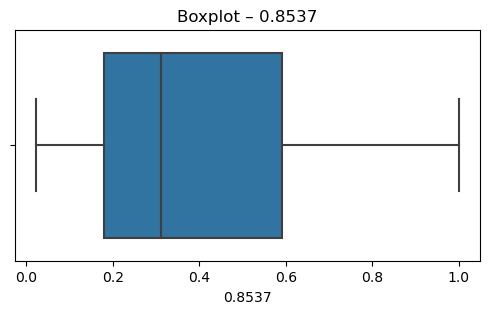

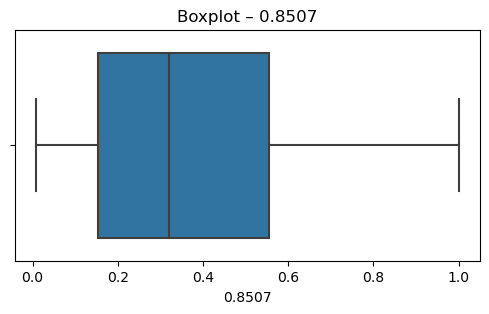

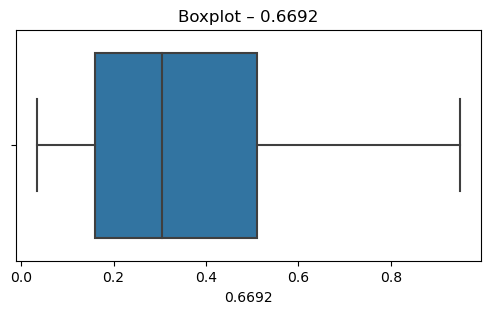

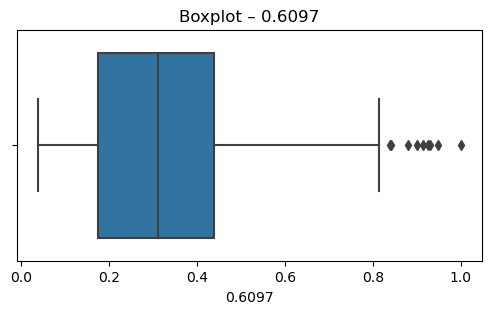

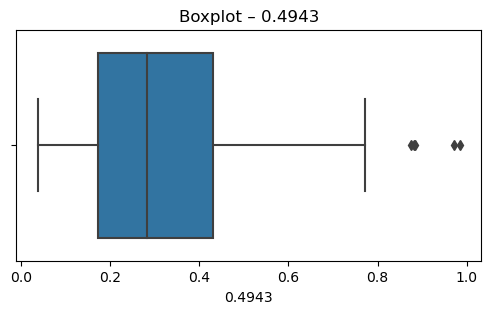

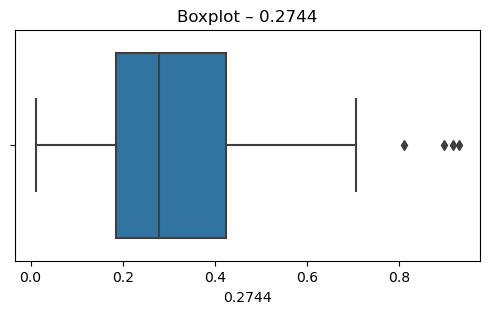

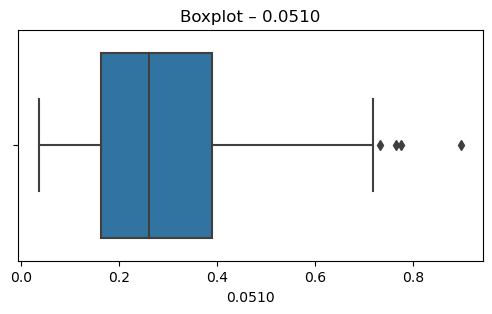

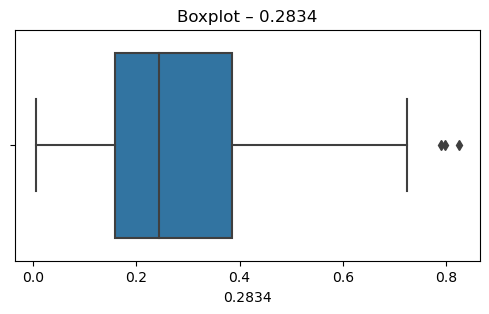

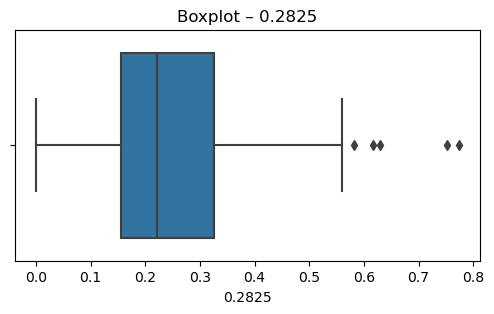

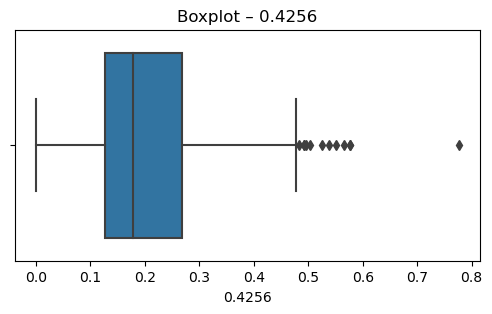

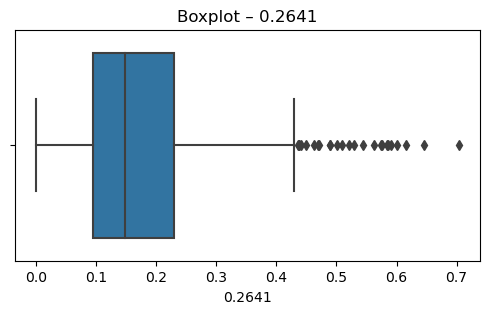

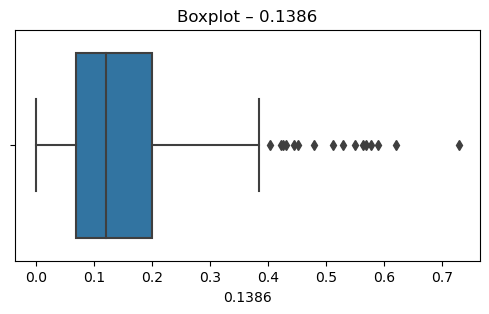

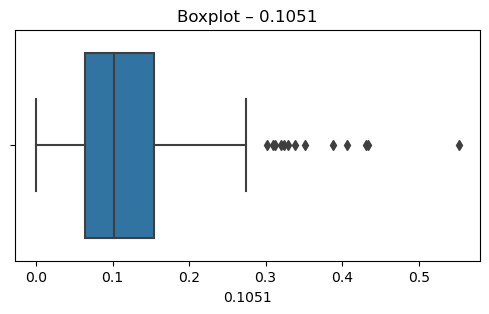

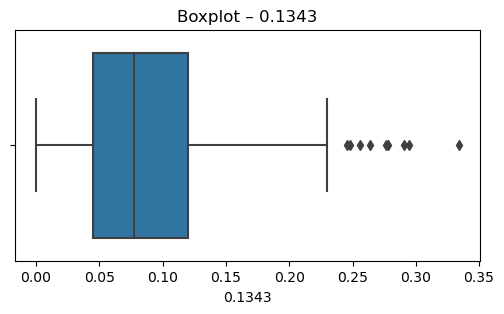

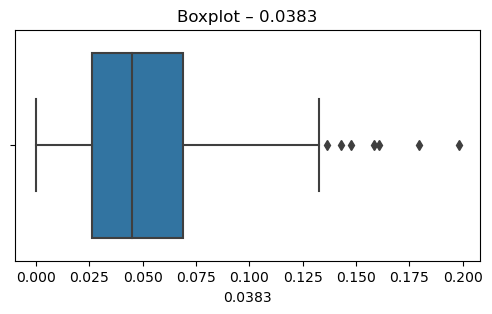

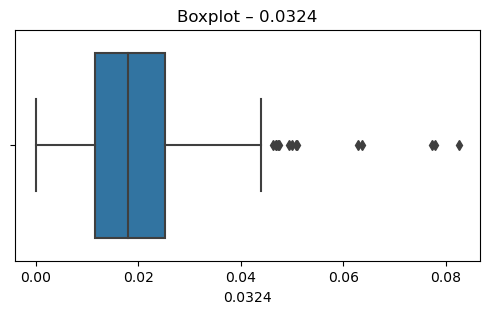

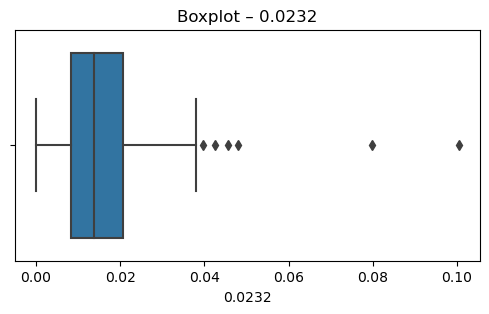

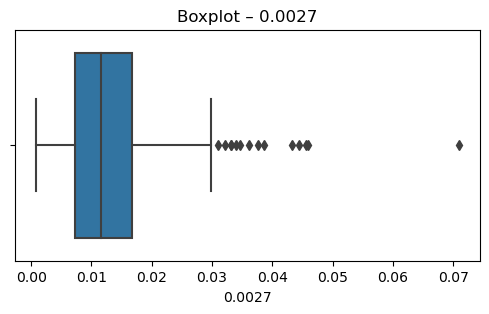

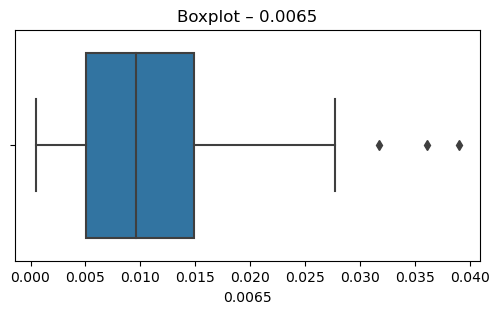

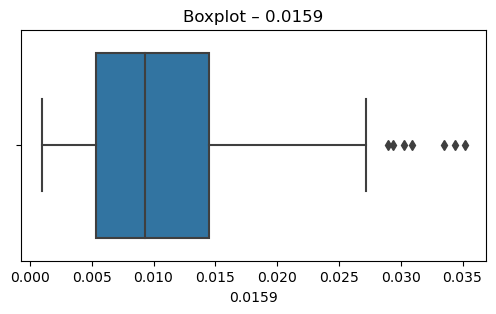

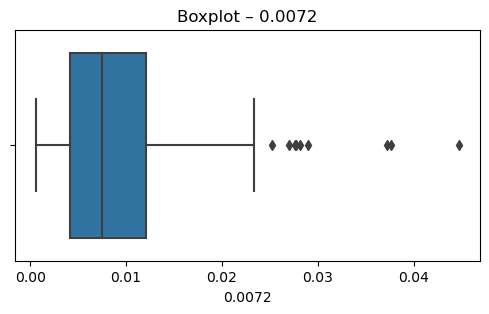

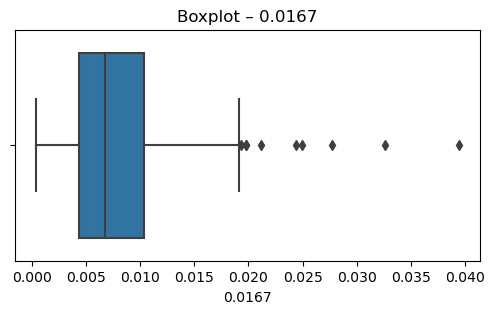

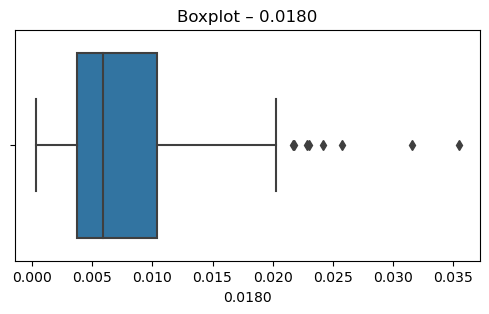

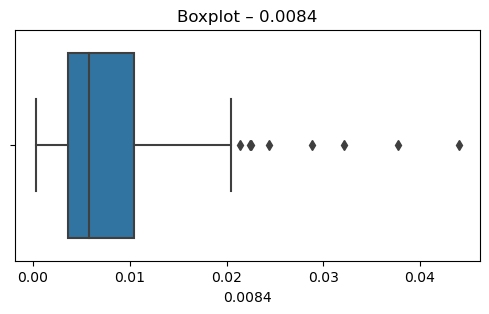

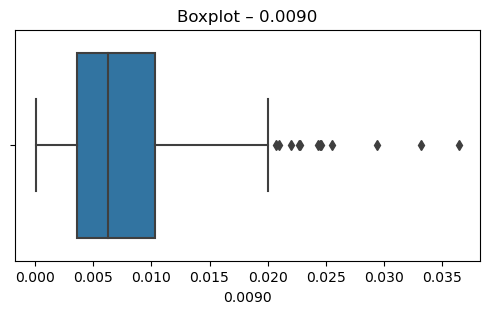

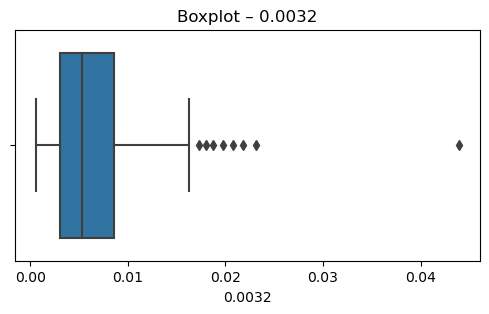

--------------------------------------------------------------------------------

 Dataset 9/14 : df9

🔹 Shape: (1599, 12)

🔹 First 5 rows:


fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
4                 11.0                  34.0   0.9978  3.51       0.56   

   alcohol  quality  
0      9.4        5  
1      9.8        5  
2      9.8        5  
3      9.8        6  
4      9.4        5


🔹 Last 5 rows:


fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
1594            6.2             0.600         0.08             2.0      0.090   
1595            5.9             0.550         0.10             2.2      0.062   
1596            6.3             0.510         0.13             2.3      0.076   
1597            5.9             0.645         0.12             2.0      0.075   
1598            6.0             0.310         0.47             3.6      0.067   

      free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
1594                 32.0                  44.0  0.99490  3.45       0.58   
1595                 39.0                  51.0  0.99512  3.52       0.76   
1596                 29.0                  40.0  0.99574  3.42       0.75   
1597                 32.0                  44.0  0.99547  3.57       0.71   
1598                 18.0                  42.0  0.99549  3.39       0.66   

      alcohol  quality  
1594     10.5        5  
1595     11.2        6  
1596     11.0        6  
1597     10.2        5  
1598     11.0        6


🔹 Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB
None

🔹 Data types:
fixed acidity           float64
volatile acidity        float64
citric acid             float64
r

Series([], dtype: int64)


🔹 Percentage of missing values per column:


Series([], dtype: float64)


🔹 Duplicate rows count: 240
🔹 Duplicate rows:


fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0               7.4             0.700         0.00             1.9      0.076   
4               7.4             0.700         0.00             1.9      0.076   
9               7.5             0.500         0.36             6.1      0.071   
11              7.5             0.500         0.36             6.1      0.071   
22              7.9             0.430         0.21             1.6      0.106   
...             ...               ...          ...             ...        ...   
1567            7.2             0.695         0.13             2.0      0.076   
1579            6.2             0.560         0.09             1.7      0.053   
1581            6.2             0.560         0.09             1.7      0.053   
1592            6.3             0.510         0.13             2.3      0.076   
1596            6.3             0.510         0.13             2.3      0.076   

      free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                    11.0                  34.0  0.99780  3.51       0.56   
4                    11.0                  34.0  0.99780  3.51       0.56   
9                    17.0                 102.0  0.99780  3.35       0.80   
11                   17.0                 102.0  0.99780  3.35       0.80   
22                   10.0                  37.0  0.99660  3.17       0.91   
...                   ...                   ...      ...   ...        ...   
1567                 12.0                  20.0  0.99546  3.29       0.54   
1579                 24.0                  32.0  0.99402  3.54       0.60   
1581                 24.0                  32.0  0.99402  3.54       0.60   
1592                 29.0                  40.0  0.99574  3.42       0.75   
1596                 29.0                  40.0  0.99574  3.42       0.75   

      alcohol  quality  
0         9.4        5  
4         9.4        5  
9        10.5        5  
11       10.5        5  
22        9.5        5  
...       ...      ...  
1567     10.1        5  
1579     11.3        5  
1581     11.3        5  
1592     11.0        6  
1596     11.0        6  

[460 rows x 12 columns]


🔹 Target variable preview:


quality
0        5
1        5
2        5
3        6
4        5


🔹 Numeric columns: ['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar', 'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol', 'quality']

🔹 Number of outliers per numeric column:


{'fixed acidity': 49,
 'volatile acidity': 19,
 'citric acid': 1,
 'residual sugar': 155,
 'chlorides': 112,
 'free sulfur dioxide': 30,
 'total sulfur dioxide': 55,
 'density': 45,
 'pH': 35,
 'sulphates': 59,
 'alcohol': 13,
 'quality': 28}


📊 Distribution des variables numériques :


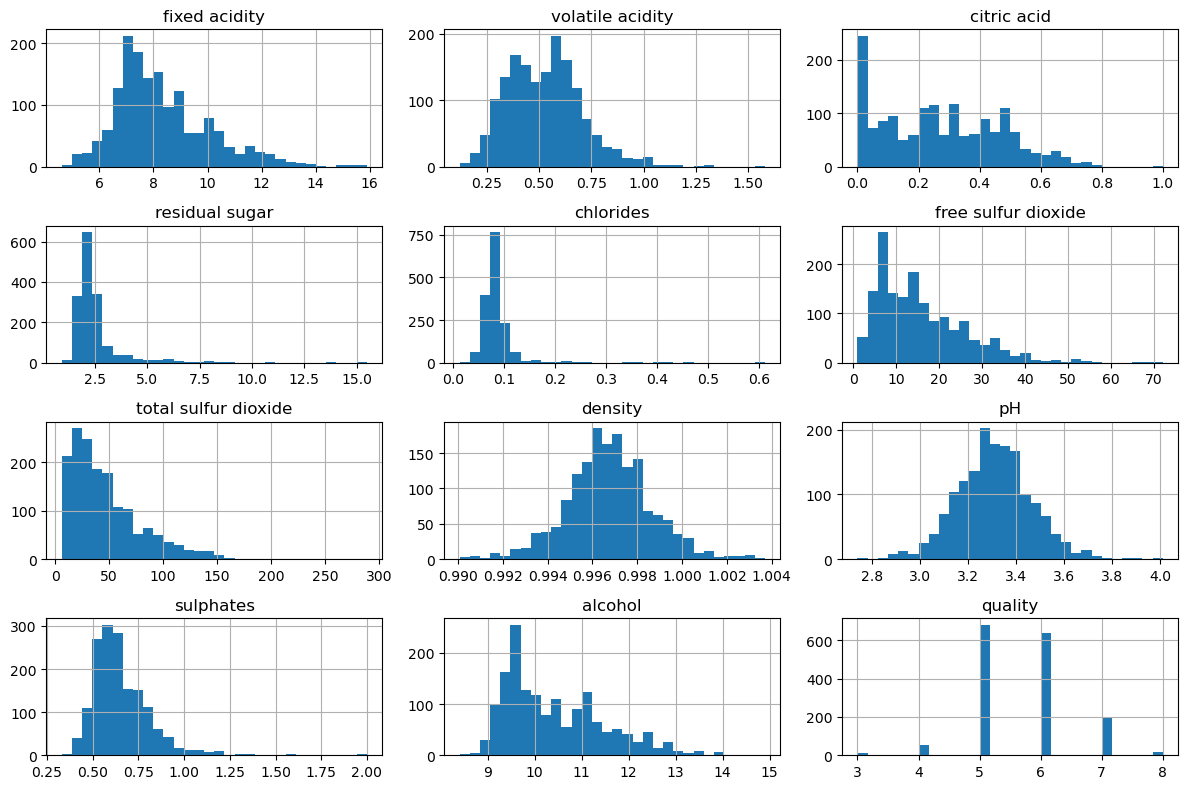

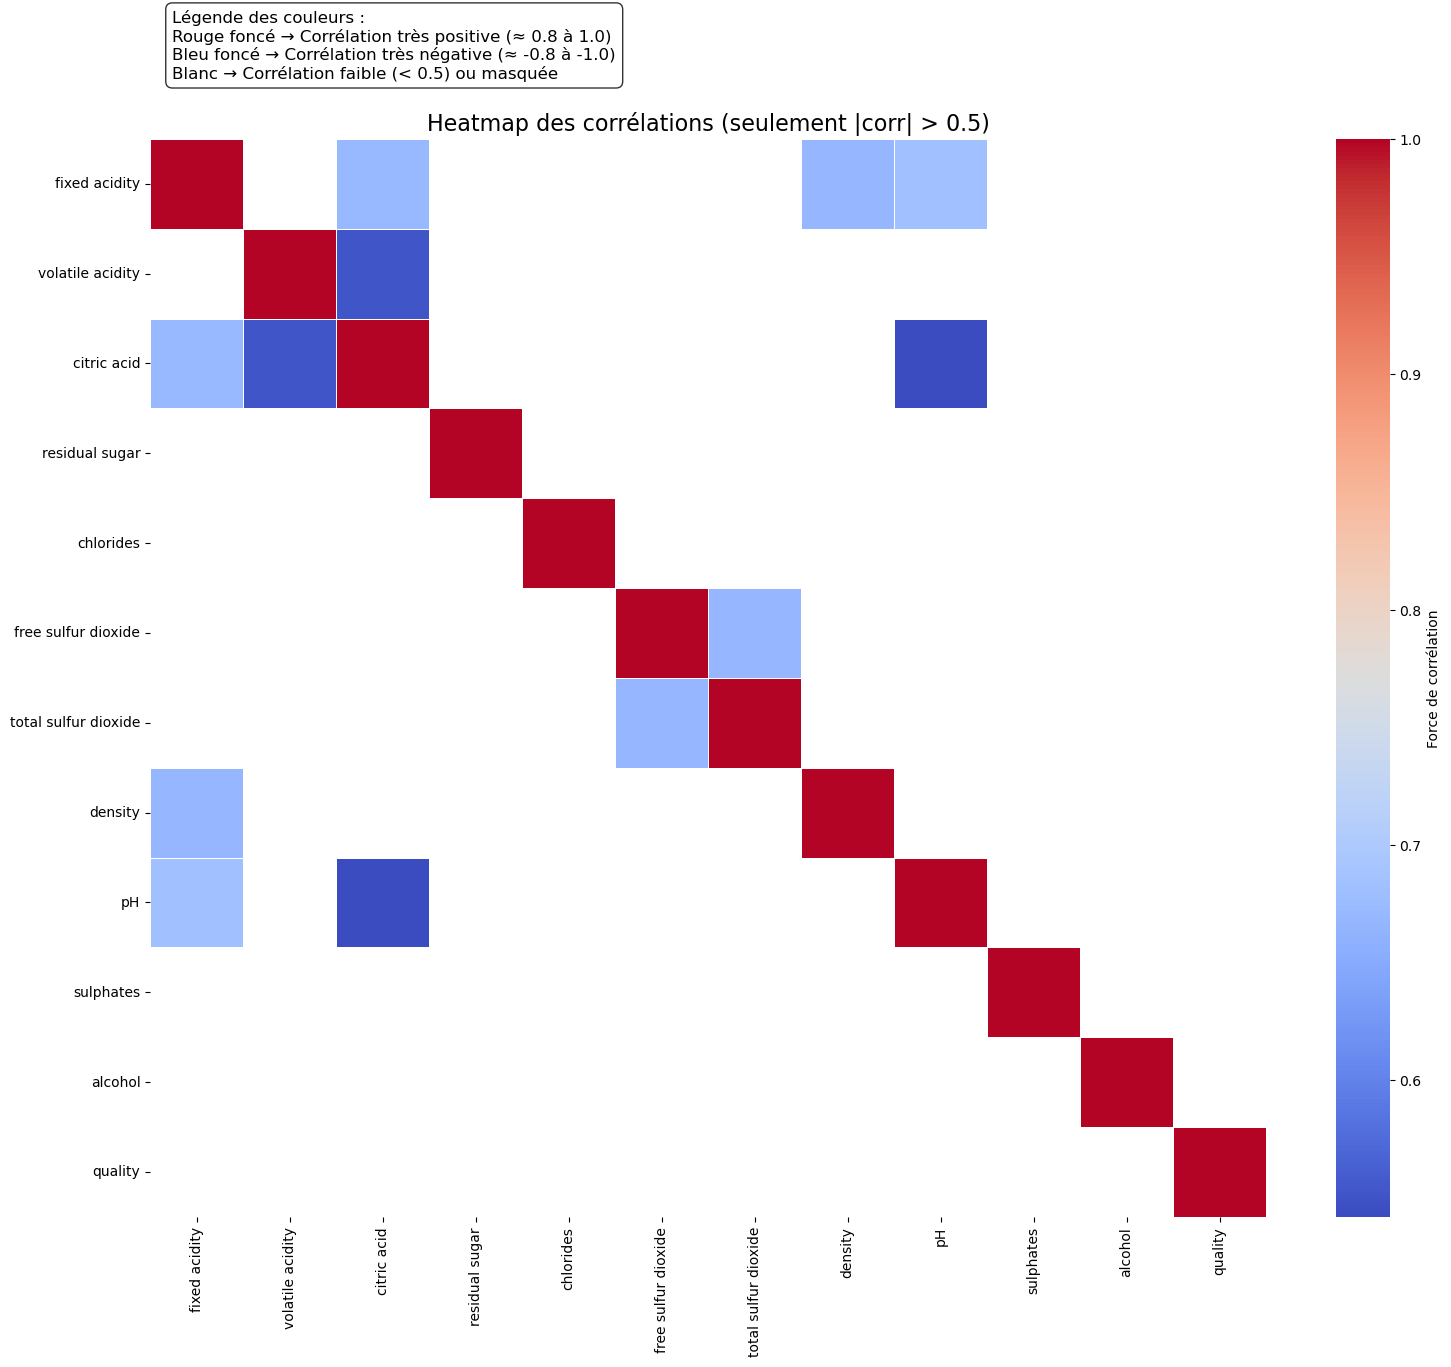


Aucune valeur manquante.


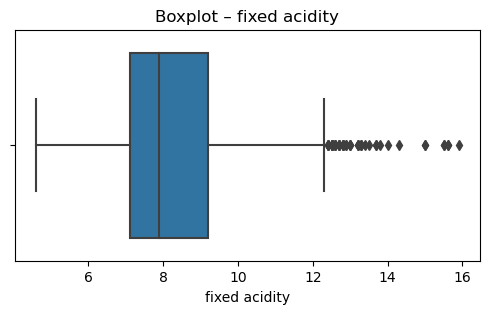

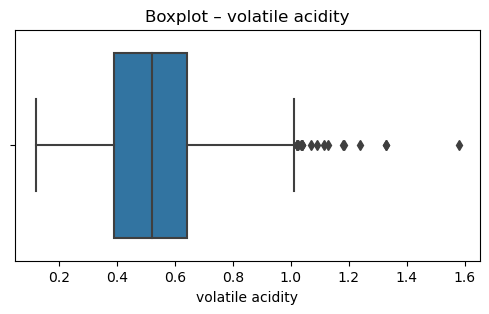

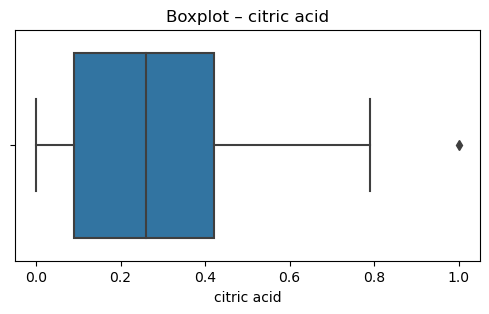

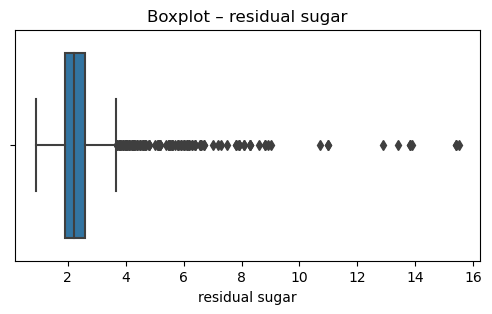

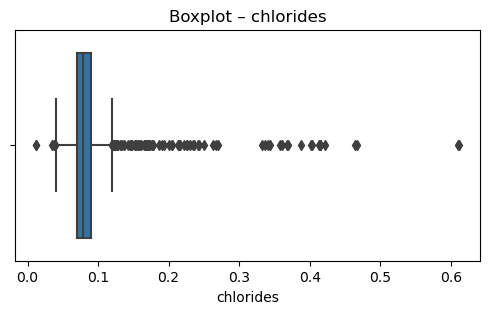

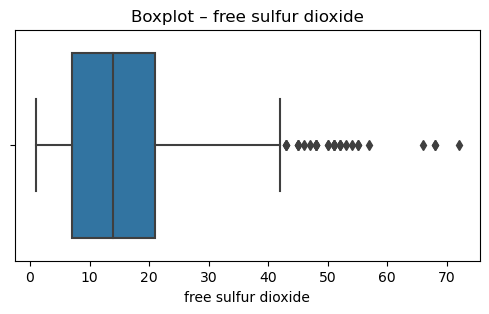

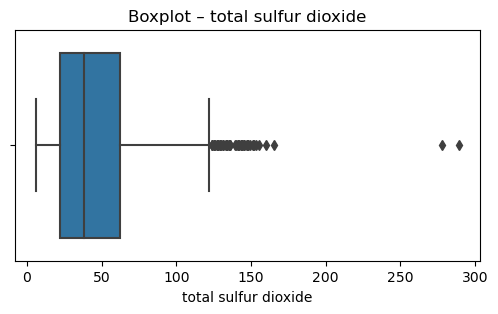

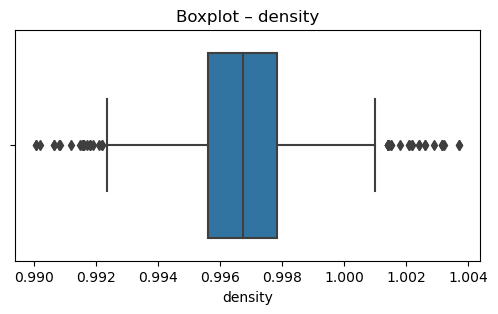

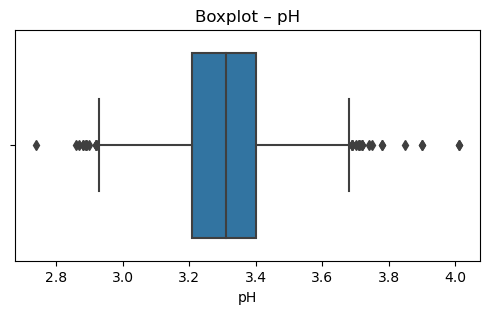

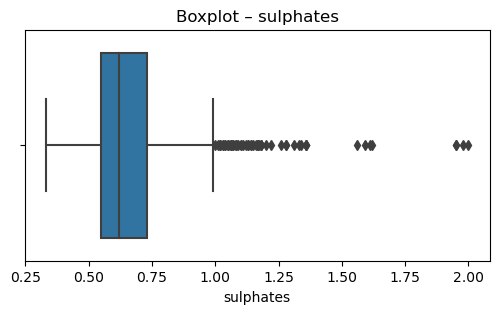

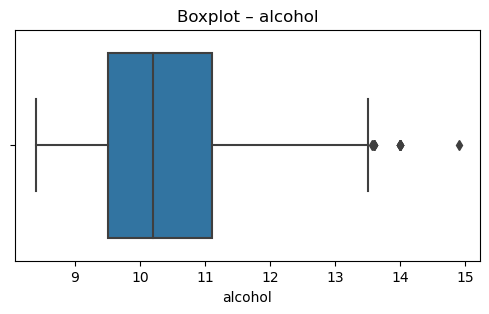

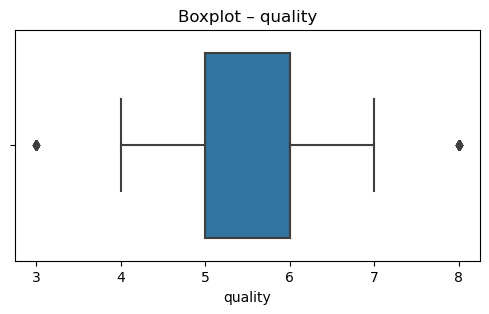

--------------------------------------------------------------------------------

 Dataset 10/14 : df10

🔹 Shape: (4898, 12)

🔹 First 5 rows:


fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.0              0.27         0.36            20.7      0.045   
1            6.3              0.30         0.34             1.6      0.049   
2            8.1              0.28         0.40             6.9      0.050   
3            7.2              0.23         0.32             8.5      0.058   
4            7.2              0.23         0.32             8.5      0.058   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 45.0                 170.0   1.0010  3.00       0.45   
1                 14.0                 132.0   0.9940  3.30       0.49   
2                 30.0                  97.0   0.9951  3.26       0.44   
3                 47.0                 186.0   0.9956  3.19       0.40   
4                 47.0                 186.0   0.9956  3.19       0.40   

   alcohol  quality  
0      8.8        6  
1      9.5        6  
2     10.1        6  
3      9.9        6  
4      9.9        6


🔹 Last 5 rows:


fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
4893            6.2              0.21         0.29             1.6      0.039   
4894            6.6              0.32         0.36             8.0      0.047   
4895            6.5              0.24         0.19             1.2      0.041   
4896            5.5              0.29         0.30             1.1      0.022   
4897            6.0              0.21         0.38             0.8      0.020   

      free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
4893                 24.0                  92.0  0.99114  3.27       0.50   
4894                 57.0                 168.0  0.99490  3.15       0.46   
4895                 30.0                 111.0  0.99254  2.99       0.46   
4896                 20.0                 110.0  0.98869  3.34       0.38   
4897                 22.0                  98.0  0.98941  3.26       0.32   

      alcohol  quality  
4893     11.2        6  
4894      9.6        5  
4895      9.4        6  
4896     12.8        7  
4897     11.8        6


🔹 Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4898 entries, 0 to 4897
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         4898 non-null   float64
 1   volatile acidity      4898 non-null   float64
 2   citric acid           4898 non-null   float64
 3   residual sugar        4898 non-null   float64
 4   chlorides             4898 non-null   float64
 5   free sulfur dioxide   4898 non-null   float64
 6   total sulfur dioxide  4898 non-null   float64
 7   density               4898 non-null   float64
 8   pH                    4898 non-null   float64
 9   sulphates             4898 non-null   float64
 10  alcohol               4898 non-null   float64
 11  quality               4898 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 459.3 KB
None

🔹 Data types:
fixed acidity           float64
volatile acidity        float64
citric acid             float64
r

Series([], dtype: int64)


🔹 Percentage of missing values per column:


Series([], dtype: float64)


🔹 Duplicate rows count: 937
🔹 Duplicate rows:


fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0               7.0              0.27         0.36            20.7      0.045   
1               6.3              0.30         0.34             1.6      0.049   
2               8.1              0.28         0.40             6.9      0.050   
3               7.2              0.23         0.32             8.5      0.058   
4               7.2              0.23         0.32             8.5      0.058   
...             ...               ...          ...             ...        ...   
4851            6.4              0.33         0.44             8.9      0.055   
4855            7.1              0.23         0.39            13.7      0.058   
4856            7.1              0.23         0.39            13.7      0.058   
4879            6.6              0.34         0.40             8.1      0.046   
4880            6.6              0.34         0.40             8.1      0.046   

      free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                    45.0                 170.0  1.00100  3.00       0.45   
1                    14.0                 132.0  0.99400  3.30       0.49   
2                    30.0                  97.0  0.99510  3.26       0.44   
3                    47.0                 186.0  0.99560  3.19       0.40   
4                    47.0                 186.0  0.99560  3.19       0.40   
...                   ...                   ...      ...   ...        ...   
4851                 52.0                 164.0  0.99488  3.10       0.48   
4855                 26.0                 172.0  0.99755  2.90       0.46   
4856                 26.0                 172.0  0.99755  2.90       0.46   
4879                 68.0                 170.0  0.99494  3.15       0.50   
4880                 68.0                 170.0  0.99494  3.15       0.50   

        alcohol  quality  
0      8.800000        6  
1      9.500000        6  
2     10.100000        6  
3      9.900000        6  
4      9.900000        6  
...         ...      ...  
4851   9.600000        5  
4855   9.000000        6  
4856   9.000000        6  
4879   9.533333        6  
4880   9.533333        6  

[1709 rows x 12 columns]


🔹 Target variable preview:


quality
0        6
1        6
2        6
3        6
4        6


🔹 Numeric columns: ['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar', 'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol', 'quality']

🔹 Number of outliers per numeric column:


{'fixed acidity': 119,
 'volatile acidity': 186,
 'citric acid': 270,
 'residual sugar': 7,
 'chlorides': 208,
 'free sulfur dioxide': 50,
 'total sulfur dioxide': 19,
 'density': 5,
 'pH': 75,
 'sulphates': 124,
 'alcohol': 0,
 'quality': 200}


📊 Distribution des variables numériques :


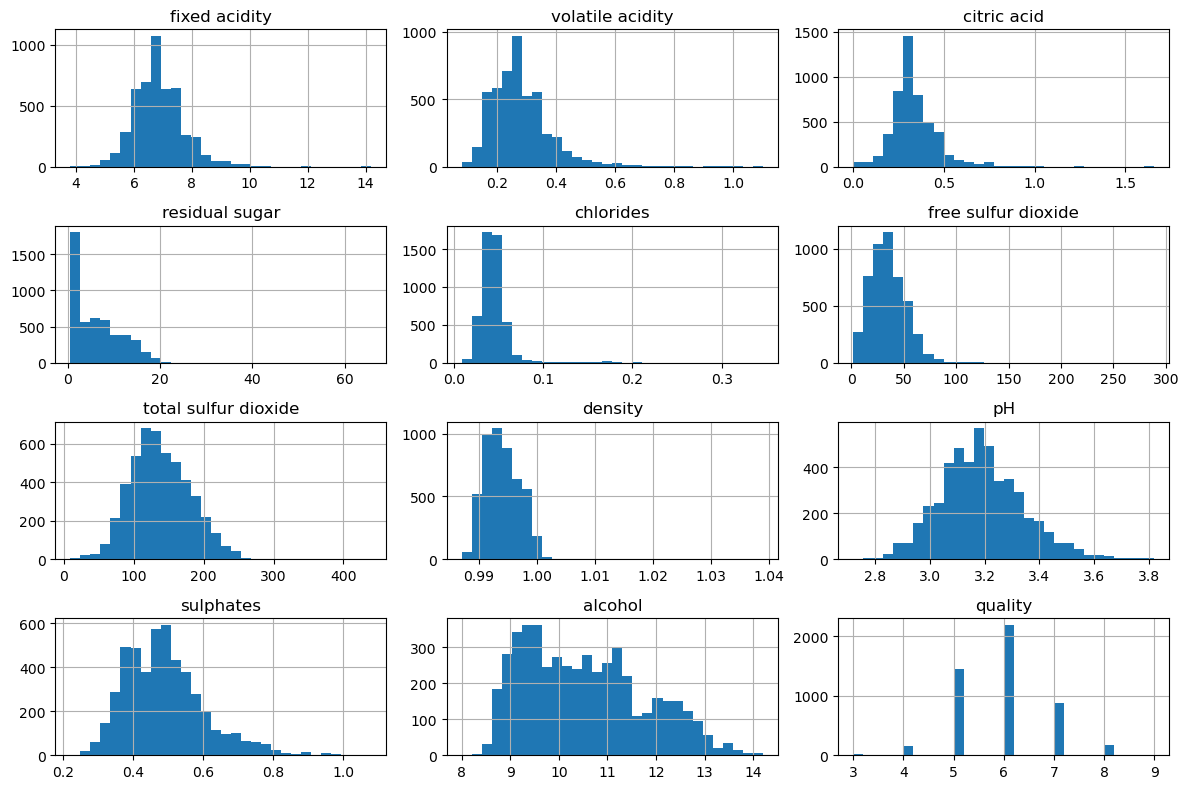

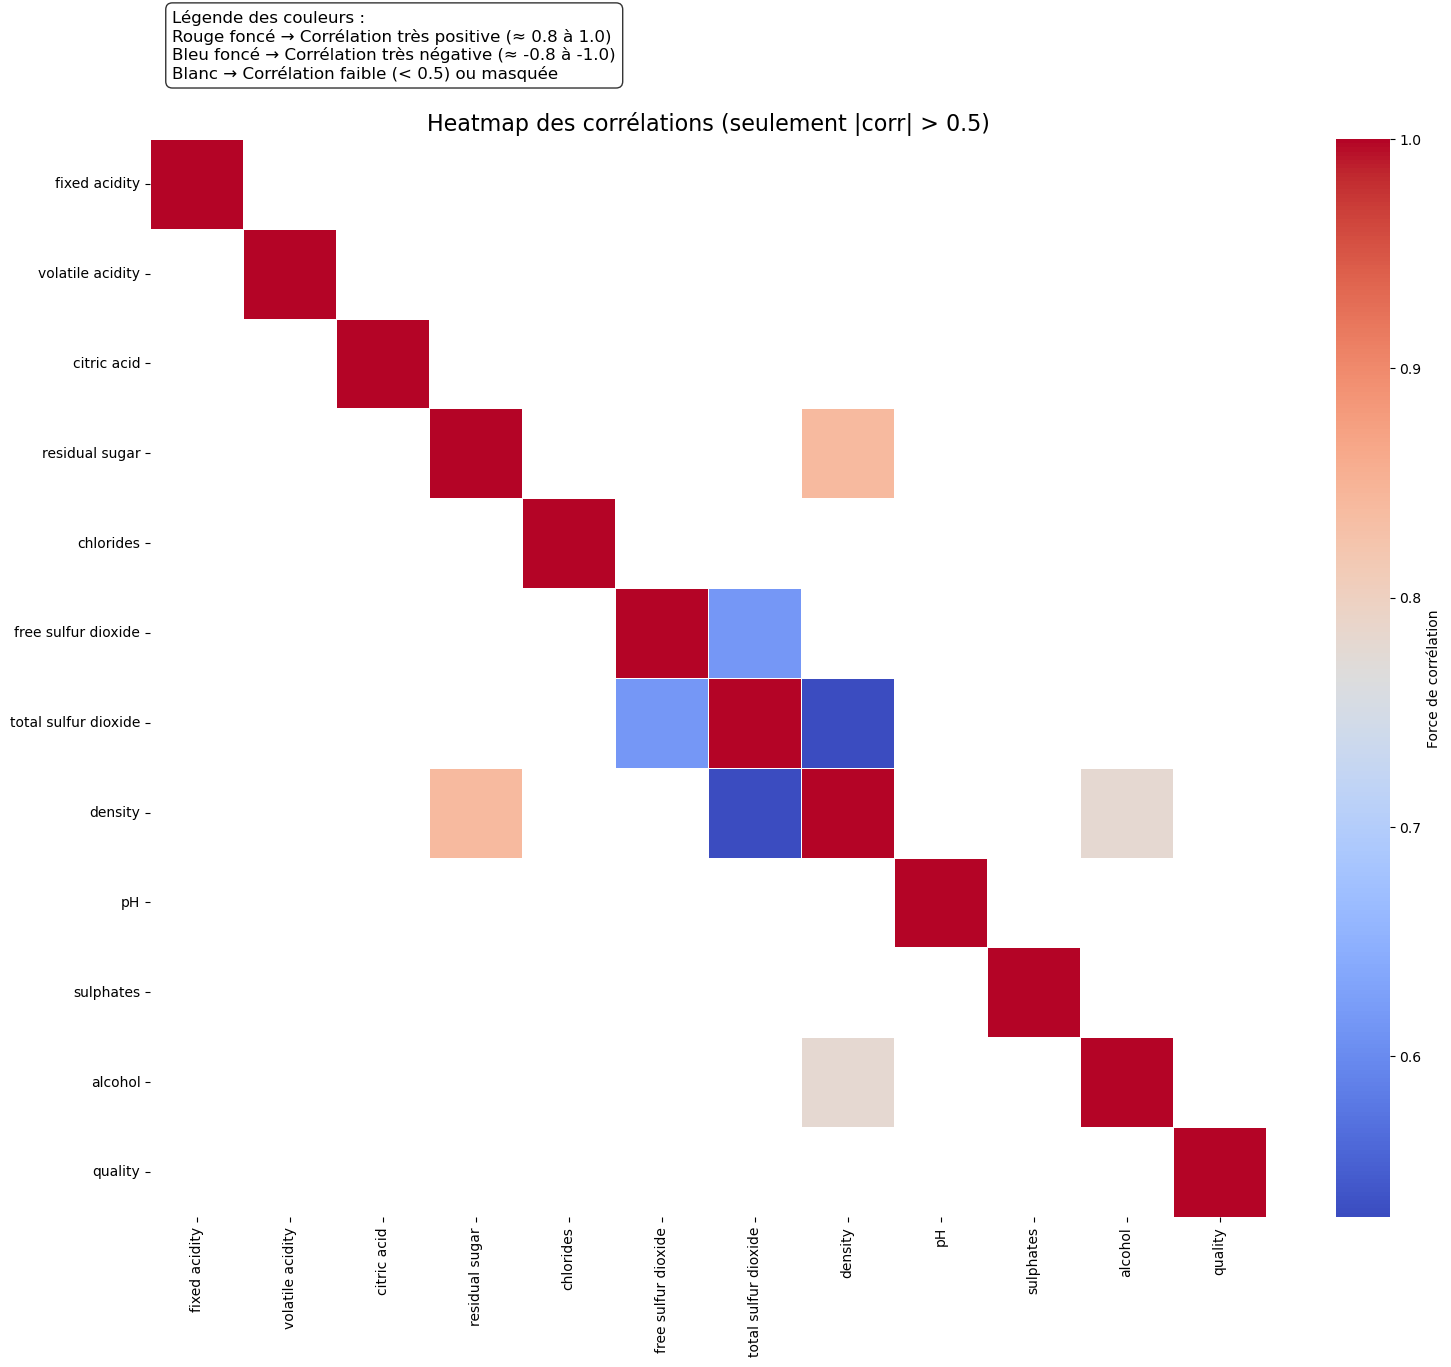


Aucune valeur manquante.


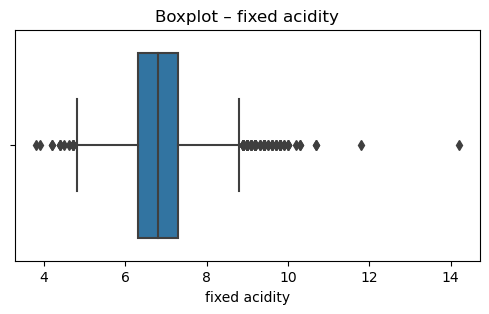

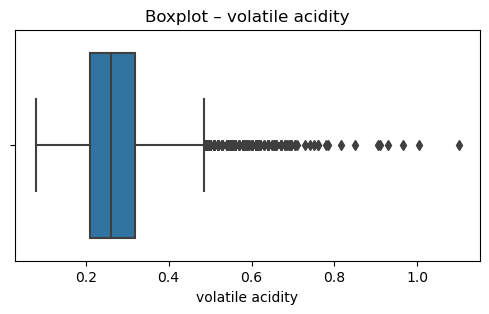

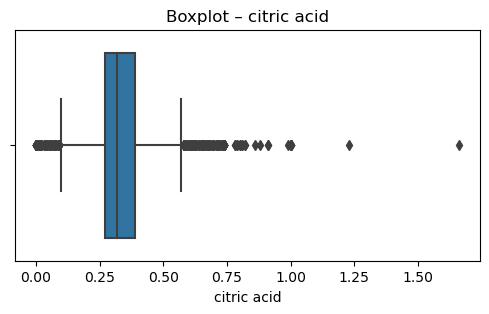

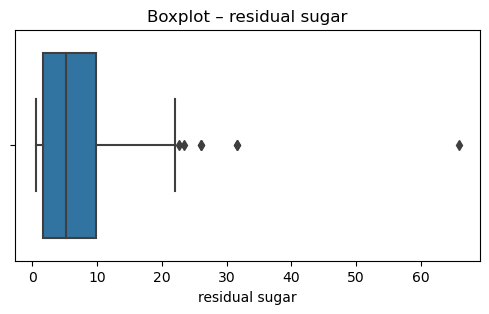

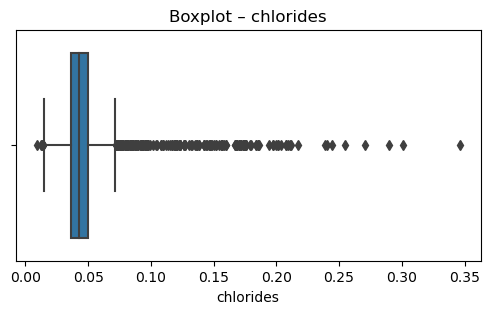

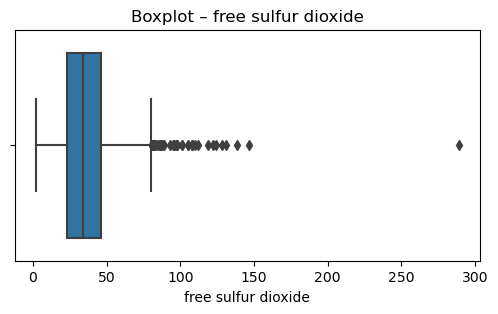

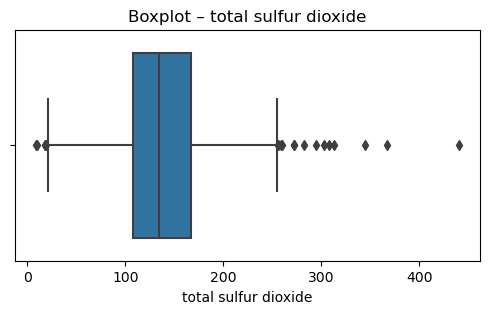

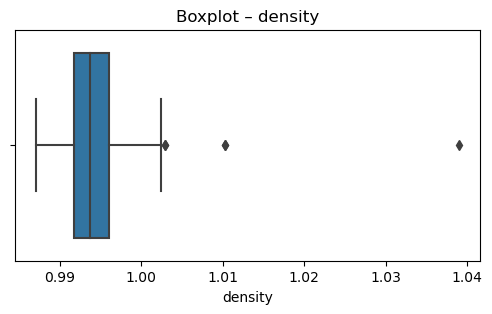

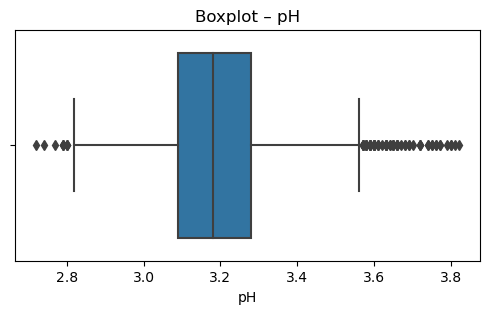

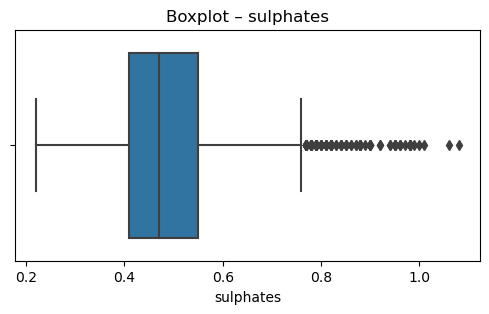

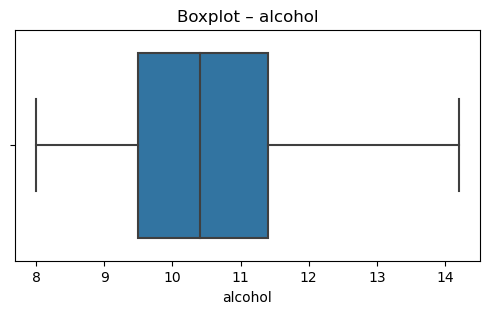

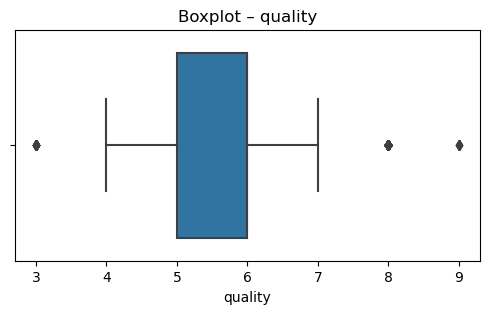

--------------------------------------------------------------------------------


In [4]:
for i, (name, X) in enumerate(df.items(), start=1):
    print("\n" + "=" * 80)
    print(f" Dataset {i}/14 : {name}")
    print("=" * 80)

    data_understanding(X,target_column = TARGET_COLS[name]
)

    print("-" * 80)
   

# Phase 3 : Data Preparation

In [5]:
for name, df_data in df.items():
    print("\n" + "="*80)
    print(f" Dataset : {name}")
    print("="*80)

    target_column = TARGET_COLS[name]

    if not target_column or target_column not in df_data.columns:
        print(f" Target '{target_column}' invalide pour {name}, skipping...")
        continue

    # Liste des colonnes numériques (sécurisée)
    numeric_columns = [
        col for col in df_data.select_dtypes(include=["int64", "float64"]).columns
        if col in df_data.columns and col != target_column
    ]

    # Appliquer le capping IQR (sur df_data et non df !!!)
    df_capped = cap_iqr(df_data, numeric_columns, factor=1.5)

    # Appliquer data_preparation()
    X, X_prepared, y, pipeline, removed_cols = data_preparation(
        df_capped,
        target_column=target_column,
        apply_capping=True
    )

    print(f" Dataset {name} traité avec succès.")






 Dataset : df1

=== DATA PREPARATION SUMMARY ===
Shape before preparation: (569, 33)
Shape after preparation: (569, 32)
Columns removed: ['Unnamed: 32']

Target preview:


0    M
1    M
2    M
3    M
4    M
Name: diagnosis, dtype: object


X (before preprocessing):


id  radius_mean  texture_mean  perimeter_mean  area_mean  \
0    842302.0        17.99         10.38          122.80     1001.0   
1    842517.0        20.57         17.77          132.90     1326.0   
2  20728995.5        19.69         21.25          130.00     1203.0   
3  20728995.5        11.42         20.38           77.58      386.1   
4  20728995.5        20.29         14.34          135.10     1297.0   

   smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
0         0.118400           0.22862         0.28241              0.14710   
1         0.084740           0.07864         0.08690              0.07017   
2         0.109600           0.15990         0.19740              0.12790   
3         0.133695           0.22862         0.24140              0.10520   
4         0.100300           0.13280         0.19800              0.10430   

   symmetry_mean  ...  radius_worst  texture_worst  perimeter_worst  \
0         0.2419  ...         25.38          17.33           184.60   
1         0.1812  ...         24.99          23.41           158.80   
2         0.2069  ...         23.57          25.53           152.50   
3         0.2464  ...         14.91          26.50            98.87   
4         0.1809  ...         22.54          16.67           152.20   

   area_worst  smoothness_worst  compactness_worst  concavity_worst  \
0     1937.05            0.1622            0.62695           0.7119   
1     1937.05            0.1238            0.18660           0.2416   
2     1709.00            0.1444            0.42450           0.4504   
3      567.70            0.1901            0.62695           0.6869   
4     1575.00            0.1374            0.20500           0.4000   

   concave points_worst  symmetry_worst  fractal_dimension_worst  
0                0.2654         0.41915                  0.11890  
1                0.1860         0.27500                  0.08902  
2                0.2430         0.36130                  0.08758  
3                0.2575         0.41915                  0.12301  
4                0.1625         0.23640                  0.07678  

[5 rows x 31 columns]


X_prepared shape: (569, 31)

Preprocessor used:
ColumnTransformer(transformers=[('num',
                                 Pipeline(steps=[('scaler', StandardScaler())]),
                                 ['id', 'radius_mean', 'texture_mean',
                                  'perimeter_mean', 'area_mean',
                                  'smoothness_mean', 'compactness_mean',
                                  'concavity_mean', 'concave points_mean',
                                  'symmetry_mean', 'fractal_dimension_mean',
                                  'radius_se', 'texture_se', 'perimeter_se',
                                  'area_se', 'smoothness_se', 'compactness_se',
                                  'concavity_se', 'concave points_se',
                                  'symmetry_se', 'fractal_dimension_se',
                                  'radius_worst', 'texture_worst',
                                  'perimeter_worst', 'area_worst',
                                  

0    18.0
1    15.0
2    18.0
3    16.0
4    17.0
Name: mpg, dtype: float64


X (before preprocessing):


cylinders  displacement horsepower  weight  acceleration  model year  \
0        8.0         307.0        130  3504.0          12.0        70.0   
1        8.0         350.0        165  3693.0          11.5        70.0   
2        8.0         318.0        150  3436.0          11.0        70.0   
3        8.0         304.0        150  3433.0          12.0        70.0   
4        8.0         302.0        140  3449.0          10.5        70.0   

   origin                   car name  
0     1.0  chevrolet chevelle malibu  
1     1.0          buick skylark 320  
2     1.0         plymouth satellite  
3     1.0              amc rebel sst  
4     1.0                ford torino


X_prepared shape: (398, 405)

Preprocessor used:
ColumnTransformer(transformers=[('num',
                                 Pipeline(steps=[('scaler', StandardScaler())]),
                                 ['cylinders', 'displacement', 'weight',
                                  'acceleration', 'model year', 'origin']),
                                ('cat',
                                 Pipeline(steps=[('encoder',
                                                  OneHotEncoder(handle_unknown='ignore'))]),
                                 ['horsepower', 'car name'])])
 Dataset df2 traité avec succès.

 Dataset : df3

=== DATA PREPARATION SUMMARY ===
Shape before preparation: (1030, 9)
Shape after preparation: (1030, 9)
Columns removed: []

Target preview:


0    79.99
1    61.89
2    40.27
3    41.05
4    44.30
Name: concrete_compressive_strength, dtype: float64


X (before preprocessing):


cement  blast_furnace_slag  fly_ash  water  superplasticizer  \
0   540.0                 0.0      0.0  162.0               2.5   
1   540.0                 0.0      0.0  162.0               2.5   
2   332.5               142.5      0.0  228.0               0.0   
3   332.5               142.5      0.0  228.0               0.0   
4   198.6               132.4      0.0  192.0               0.0   

   coarse_aggregate  fine_aggregate     age  
0            1040.0            676.0   28.0  
1            1055.0            676.0   28.0  
2             932.0            594.0  129.5  
3             932.0            594.0  129.5  
4             978.4            825.5  129.5


X_prepared shape: (1030, 8)

Preprocessor used:
ColumnTransformer(transformers=[('num',
                                 Pipeline(steps=[('scaler', StandardScaler())]),
                                 ['cement', 'blast_furnace_slag', 'fly_ash',
                                  'water', 'superplasticizer',
                                  'coarse_aggregate', 'fine_aggregate ',
                                  'age']),
                                ('cat',
                                 Pipeline(steps=[('encoder',
                                                  OneHotEncoder(handle_unknown='ignore'))]),
                                 [])])
 Dataset df3 traité avec succès.

 Dataset : df4

=== DATA PREPARATION SUMMARY ===
Shape before preparation: (506, 14)
Shape after preparation: (506, 13)
Columns removed: ['CHAS']

Target preview:


0    24.0
1    21.6
2    34.7
3    33.4
4    36.2
Name: MEDV, dtype: float64


X (before preprocessing):


CRIM    ZN  INDUS    NOX     RM   AGE     DIS  RAD    TAX  PTRATIO  \
0  0.00632  18.0   2.31  0.538  6.575  65.2  4.0900  1.0  296.0     15.3   
1  0.02731   0.0   7.07  0.469  6.421  78.9  4.9671  2.0  242.0     17.8   
2  0.02729   0.0   7.07  0.469  7.185  61.1  4.9671  2.0  242.0     17.8   
3  0.03237   0.0   2.18  0.458  6.998  45.8  6.0622  3.0  222.0     18.7   
4  0.06905   0.0   2.18  0.458  7.147  54.2  6.0622  3.0  222.0     18.7   

        B  LSTAT  
0  396.90   4.98  
1  396.90   9.14  
2  392.83   4.03  
3  394.63   2.94  
4  396.90    NaN


X_prepared shape: (506, 12)

Preprocessor used:
ColumnTransformer(transformers=[('num',
                                 Pipeline(steps=[('scaler', StandardScaler())]),
                                 ['CRIM', 'ZN', 'INDUS', 'NOX', 'RM', 'AGE',
                                  'DIS', 'RAD', 'TAX', 'PTRATIO', 'B',
                                  'LSTAT']),
                                ('cat',
                                 Pipeline(steps=[('encoder',
                                                  OneHotEncoder(handle_unknown='ignore'))]),
                                 [])])
 Dataset df4 traité avec succès.

 Dataset : df5
 Target 'obs' invalide pour df5, skipping...

 Dataset : df6

=== DATA PREPARATION SUMMARY ===
Shape before preparation: (195, 24)
Shape after preparation: (195, 23)
Columns removed: ['RPDE']

Target preview:


0    0.284654
1    0.368674
2    0.332634
3    0.368975
4    0.410335
Name: status, dtype: float64


X (before preprocessing):


name  MDVP:Fo(Hz)  MDVP:Fhi(Hz)  MDVP:Flo(Hz)  MDVP:Jitter(%)  \
0  phon_R01_S01_1      119.992       157.302        74.997         0.00784   
1  phon_R01_S01_2      122.400       148.650       113.819         0.00968   
2  phon_R01_S01_3      116.682       131.111       111.555         0.01050   
3  phon_R01_S01_4      116.676       137.871       111.366         0.00997   
4  phon_R01_S01_5      116.014       141.781       110.655         0.01284   

   MDVP:Jitter(Abs)  MDVP:RAP  MDVP:PPQ  Jitter:DDP  MDVP:Shimmer  ...  \
0           0.00007   0.00370  0.005540     0.01109       0.04374  ...   
1           0.00008   0.00465  0.006960     0.01394       0.06134  ...   
2           0.00009   0.00544  0.007098     0.01633       0.05233  ...   
3           0.00009   0.00502  0.006980     0.01505       0.05492  ...   
4           0.00011   0.00655  0.007098     0.01966       0.06425  ...   

   Shimmer:APQ5  MDVP:APQ  Shimmer:DDA      NHR     HNR       DFA   spread1  \
0       0.03130   0.02971      0.06545  0.02211  21.033  0.414783  0.815285   
1       0.04158   0.04368      0.09403  0.01929  19.085  0.458359  0.819521   
2       0.03858   0.03590      0.08270  0.01309  20.651  0.429895  0.825288   
3       0.04005   0.03772      0.08771  0.01353  20.644  0.434969  0.819235   
4       0.04158   0.04465      0.10470  0.01767  19.649  0.417356  0.823484   

    spread2        D2       PPE  
0 -4.813031  0.266482  2.301442  
1 -4.075192  0.335590  2.486855  
2 -4.443179  0.311173  2.342259  
3 -4.117501  0.334147  2.405554  
4 -3.747787  0.234513  2.332180  

[5 rows x 22 columns]


X_prepared shape: (195, 216)

Preprocessor used:
ColumnTransformer(transformers=[('num',
                                 Pipeline(steps=[('scaler', StandardScaler())]),
                                 ['MDVP:Fo(Hz)', 'MDVP:Fhi(Hz)', 'MDVP:Flo(Hz)',
                                  'MDVP:Jitter(%)', 'MDVP:Jitter(Abs)',
                                  'MDVP:RAP', 'MDVP:PPQ', 'Jitter:DDP',
                                  'MDVP:Shimmer', 'MDVP:Shimmer(dB)',
                                  'Shimmer:APQ3', 'Shimmer:APQ5', 'MDVP:APQ',
                                  'Shimmer:DDA', 'NHR', 'HNR', 'DFA', 'spread1',
                                  'spread2', 'D2', 'PPE']),
                                ('cat',
                                 Pipeline(steps=[('encoder',
                                                  OneHotEncoder(handle_unknown='ignore'))]),
                                 ['name'])])
 Dataset df6 traité avec succès.

 Dataset : df7

=== DATA PREPARATION SUMMA

0    0
1    0
2    0
3    0
4    0
Name: Status, dtype: int64


X (before preprocessing):


ID  Recording  Gender  Jitter_rel  Jitter_abs  Jitter_RAP  Jitter_PPQ  \
0  CONT-01        1.0     1.0     0.25546    0.000015    0.001467    0.001673   
1  CONT-01        2.0     1.0     0.36964    0.000022    0.001932    0.002245   
2  CONT-01        3.0     1.0     0.23514    0.000013    0.001353    0.001546   
3  CONT-02        1.0     0.0     0.29320    0.000017    0.001105    0.001444   
4  CONT-02        2.0     0.0     0.23075    0.000015    0.001073    0.001404   

   Shim_loc  Shim_dB  Shim_APQ3  ...    Delta3    Delta4    Delta5    Delta6  \
0  0.030256  0.26313   0.017463  ...  1.407701  1.417218  1.380352  1.420670   
1  0.023146  0.20217   0.013010  ...  1.331232  1.227338  1.213377  1.352739   
2  0.019338  0.16710   0.011049  ...  1.412304  1.324674  1.276088  1.429634   
3  0.024716  0.20892   0.014525  ...  1.501200  1.534170  1.323993  1.496442   
4  0.013119  0.11607   0.006461  ...  1.508468  1.334511  1.610694  1.685021   

     Delta7    Delta8    Delta9   Delta10   Delta11   Delta12  
0  1.451240  1.440295  1.403678  1.405495  1.416705  1.354610  
1  1.354242  1.365692  1.322870  1.314549  1.318999  1.323508  
2  1.455996  1.368882  1.438053  1.388910  1.305469  1.305402  
3  1.472926  1.643177  1.551286  1.638346  1.604008  1.621456  
4  1.417614  1.574895  1.640088  1.533666  1.297536  1.382023  

[5 rows x 47 columns]


X_prepared shape: (240, 126)

Preprocessor used:
ColumnTransformer(transformers=[('num',
                                 Pipeline(steps=[('scaler', StandardScaler())]),
                                 ['Recording', 'Gender', 'Jitter_rel',
                                  'Jitter_abs', 'Jitter_RAP', 'Jitter_PPQ',
                                  'Shim_loc', 'Shim_dB', 'Shim_APQ3',
                                  'Shim_APQ5', 'Shi_APQ11', 'HNR05', 'HNR15',
                                  'HNR25', 'HNR35', 'HNR38', 'RPDE', 'DFA',
                                  'PPE', 'GNE', 'MFCC0', 'MFCC1', 'MFCC2',
                                  'MFCC3', 'MFCC4', 'MFCC5', 'MFCC6', 'MFCC7',
                                  'MFCC8', 'MFCC9', ...]),
                                ('cat',
                                 Pipeline(steps=[('encoder',
                                                  OneHotEncoder(handle_unknown='ignore'))]),
                                 ['ID'])])
 Dataset

0    R
1    R
2    R
3    R
4    R
Name: R, dtype: object


X (before preprocessing):


0.0200  0.0371  0.0428  0.0207  0.0954   0.0986  0.1539    0.1601  \
0  0.04530  0.0523  0.0843  0.0689  0.1183  0.23495  0.2156  0.303975   
1  0.02620  0.0582  0.1099  0.1083  0.0974  0.22800  0.2431  0.303975   
2  0.01000  0.0171  0.0623  0.0205  0.0205  0.03680  0.1098  0.127600   
3  0.06955  0.0666  0.0481  0.0394  0.0590  0.06490  0.1209  0.246700   
4  0.02860  0.0453  0.0277  0.0174  0.0384  0.09900  0.1201  0.183300   

     0.3109    0.2111  ...  0.0232  0.0027  0.0065  0.0159  0.0072    0.0167  \
0  0.333700  0.287200  ...  0.0125  0.0084  0.0089  0.0048  0.0094  0.019100   
1  0.433625  0.505775  ...  0.0033  0.0232  0.0166  0.0095  0.0180  0.019275   
2  0.059800  0.126400  ...  0.0241  0.0121  0.0036  0.0150  0.0085  0.007300   
3  0.356400  0.445900  ...  0.0156  0.0031  0.0054  0.0105  0.0110  0.001500   
4  0.210500  0.303900  ...  0.0104  0.0045  0.0014  0.0038  0.0013  0.008900   

     0.0180  0.0084  0.0090  0.0032  
0  0.014000  0.0049  0.0052  0.0044  
1  0.020325  0.0164  0.0095  0.0078  
2  0.005000  0.0044  0.0040  0.0117  
3  0.007200  0.0048  0.0107  0.0094  
4  0.005700  0.0027  0.0051  0.0062  

[5 rows x 60 columns]


X_prepared shape: (207, 60)

Preprocessor used:
ColumnTransformer(transformers=[('num',
                                 Pipeline(steps=[('scaler', StandardScaler())]),
                                 ['0.0200', '0.0371', '0.0428', '0.0207',
                                  '0.0954', '0.0986', '0.1539', '0.1601',
                                  '0.3109', '0.2111', '0.1609', '0.1582',
                                  '0.2238', '0.0645', '0.0660', '0.2273',
                                  '0.3100', '0.2999', '0.5078', '0.4797',
                                  '0.5783', '0.5071', '0.4328', '0.5550',
                                  '0.6711', '0.6415', '0.7104', '0.8080',
                                  '0.6791', '0.3857', ...]),
                                ('cat',
                                 Pipeline(steps=[('encoder',
                                                  OneHotEncoder(handle_unknown='ignore'))]),
                                 [])])
 Dataset df8 trait

0    5
1    5
2    5
3    6
4    5
Name: quality, dtype: int64


X (before preprocessing):


fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
4                 11.0                  34.0   0.9978  3.51       0.56   

   alcohol  
0      9.4  
1      9.8  
2      9.8  
3      9.8  
4      9.4


X_prepared shape: (1599, 11)

Preprocessor used:
ColumnTransformer(transformers=[('num',
                                 Pipeline(steps=[('scaler', StandardScaler())]),
                                 ['fixed acidity', 'volatile acidity',
                                  'citric acid', 'residual sugar', 'chlorides',
                                  'free sulfur dioxide', 'total sulfur dioxide',
                                  'density', 'pH', 'sulphates', 'alcohol']),
                                ('cat',
                                 Pipeline(steps=[('encoder',
                                                  OneHotEncoder(handle_unknown='ignore'))]),
                                 [])])
 Dataset df9 traité avec succès.

 Dataset : df10

=== DATA PREPARATION SUMMARY ===
Shape before preparation: (4898, 12)
Shape after preparation: (4898, 12)
Columns removed: []

Target preview:


0    6
1    6
2    6
3    6
4    6
Name: quality, dtype: int64


X (before preprocessing):


fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.0              0.27         0.36            20.7      0.045   
1            6.3              0.30         0.34             1.6      0.049   
2            8.1              0.28         0.40             6.9      0.050   
3            7.2              0.23         0.32             8.5      0.058   
4            7.2              0.23         0.32             8.5      0.058   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 45.0                 170.0   1.0010  3.00       0.45   
1                 14.0                 132.0   0.9940  3.30       0.49   
2                 30.0                  97.0   0.9951  3.26       0.44   
3                 47.0                 186.0   0.9956  3.19       0.40   
4                 47.0                 186.0   0.9956  3.19       0.40   

   alcohol  
0      8.8  
1      9.5  
2     10.1  
3      9.9  
4      9.9


X_prepared shape: (4898, 11)

Preprocessor used:
ColumnTransformer(transformers=[('num',
                                 Pipeline(steps=[('scaler', StandardScaler())]),
                                 ['fixed acidity', 'volatile acidity',
                                  'citric acid', 'residual sugar', 'chlorides',
                                  'free sulfur dioxide', 'total sulfur dioxide',
                                  'density', 'pH', 'sulphates', 'alcohol']),
                                ('cat',
                                 Pipeline(steps=[('encoder',
                                                  OneHotEncoder(handle_unknown='ignore'))]),
                                 [])])
 Dataset df10 traité avec succès.


# Phase 4 : Modeling

In [6]:
# Aller au bon dossier (si nécessaire)
#%cd C:/Users/bahae/ML_Project_Crisp-dm/RLT_PROJECT

# Charger les fonctions de préparation
from prep_classification import prepare_classification
from prep_regression import prepare_regression

print("Préparation des datasets chargée ✔")

Préparation des datasets chargée ✔


In [7]:
import pandas as pd

df = pd.read_csv("Data/BreastCanDT.csv")
X_skl, y_skl, X_rlt, y_rlt = prepare_classification(df, "diagnosis", "BreastCanDT")
X_skl.shape, X_rlt.shape


((569, 30), (569, 30))

In [122]:
import pandas as pd
pd.read_csv("Data/winequality-white.csv").head()

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.0              0.27         0.36            20.7      0.045   
1            6.3              0.30         0.34             1.6      0.049   
2            8.1              0.28         0.40             6.9      0.050   
3            7.2              0.23         0.32             8.5      0.058   
4            7.2              0.23         0.32             8.5      0.058   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 45.0                 170.0   1.0010  3.00       0.45   
1                 14.0                 132.0   0.9940  3.30       0.49   
2                 30.0                  97.0   0.9951  3.26       0.44   
3                 47.0                 186.0   0.9956  3.19       0.40   
4                 47.0                 186.0   0.9956  3.19       0.40   

   alcohol  quality  
0      8.8        6  
1      9.5        6  
2     10.1        6  
3      9.9        6  
4      9.9        6

In [10]:
find_csv("winequality-white")

NameError: name 'find_csv' is not defined

In [126]:
import os

for f in os.listdir("Data"):
    print(repr(f))


'.ipynb_checkpoints'
'auto-mpg.csv'
'BreastCanDT.csv'
'concrete_data.csv'
'dataset_scenario1.csv'
'dataset_scenario2.csv'
'dataset_scenario3.csv'
'dataset_scenario4.csv'
'HousingData.csv'
'ozone.csv'
'parkinsons.csv'
'ReplicatedAcousticFeatures-ParkinsonDatabase.csv'
'sonar.csv'
'winequality-red.csv'
'winequality-white.csv'


In [17]:
%run run_single_regression.py winequality-white quality


=== LOADING REGR DATASET: Data\winequality-white ===
❌ ERROR loading dataset Data\winequality-white: [Errno 2] No such file or directory: 'Data\\winequality-white'


AttributeError: 'tuple' object has no attribute 'tb_frame'

In [12]:
%run run_single_regression.py auto-mpg.csv mpg


=== LOADING REGR DATASET: Data\auto-mpg.csv ===
Running regression modeling...
Running RF...
Running RF_sqrtp...
Running RF_logp...
Running ET...
Running Boosting...
Running Lasso...
Running RLT (Python)...

===== REGRESSION COMPLETE =====
        dataset     model      rmse        r2
0  auto-mpg.csv        RF  2.204720  0.909594
1  auto-mpg.csv  RF_sqrtp  2.240774  0.906613
2  auto-mpg.csv   RF_logp  2.132866  0.915391
3  auto-mpg.csv        ET  2.338893  0.898256
4  auto-mpg.csv  Boosting  2.359932  0.896417
5  auto-mpg.csv     Lasso  2.881322  0.845591
6  auto-mpg.csv       RLT  2.240278  0.906655
Saved: auto-mpg.csv_results.csv


In [19]:
!python run_single_regression.py auto-mpg.csv mpg


=== LOADING REGR DATASET: Data\auto-mpg.csv ===
Running regression modeling...
Running RF...
Running RF_sqrtp...
Running RF_logp...
Running ET...
Running Boosting...
Running Lasso...
Running RLT (Python)...

===== REGRESSION COMPLETE =====
        dataset     model      rmse        r2
0  auto-mpg.csv        RF  2.178554  0.911727
1  auto-mpg.csv  RF_sqrtp  2.218668  0.908447
2  auto-mpg.csv   RF_logp  2.268355  0.904300
3  auto-mpg.csv        ET  2.308255  0.900904
4  auto-mpg.csv  Boosting  2.320185  0.899877
5  auto-mpg.csv     Lasso  2.881322  0.845591
6  auto-mpg.csv       RLT  2.240278  0.906655
Saved: auto-mpg.csv_results.csv


In [21]:
!python run_single_regression.py concrete_data.csv concrete_compressive_strength


=== LOADING REGR DATASET: Data\concrete_data.csv ===
Running regression modeling...
Running RF...
Running RF_sqrtp...
Running RF_logp...
Running ET...
Running Boosting...
Running Lasso...
Running RLT (Python)...

===== REGRESSION COMPLETE =====
             dataset     model      rmse        r2
0  concrete_data.csv        RF  5.699271  0.873944
1  concrete_data.csv  RF_sqrtp  5.444093  0.884979
2  concrete_data.csv   RF_logp  5.600161  0.878290
3  concrete_data.csv        ET  5.251201  0.892986
4  concrete_data.csv  Boosting  5.491566  0.882965
5  concrete_data.csv     Lasso  9.796401  0.627559
6  concrete_data.csv       RLT  6.434863  0.839305
Saved: concrete_data.csv_results.csv


In [22]:
!python run_single_regression.py HousingData.csv MEDV


=== LOADING REGR DATASET: Data\HousingData.csv ===
Running regression modeling...
Running RF...
Running RF_sqrtp...
Running RF_logp...
Running ET...
Running Boosting...
Running Lasso...
Running RLT (Python)...

===== REGRESSION COMPLETE =====
           dataset     model      rmse        r2
0  HousingData.csv        RF  2.936315  0.882429
1  HousingData.csv  RF_sqrtp  3.157274  0.864068
2  HousingData.csv   RF_logp  3.733054  0.809969
3  HousingData.csv        ET  3.093544  0.869501
4  HousingData.csv  Boosting  2.689703  0.901348
5  HousingData.csv     Lasso  5.004237  0.658515
6  HousingData.csv       RLT  3.837131  0.799225
Saved: HousingData.csv_results.csv


In [1]:
!python run_single_regression.py ozone maxO3



=== LOADING REGR DATASET: Data\ozone.csv ===
Running regression modeling...
Running RF...
Running RF_sqrtp...
Running RF_logp...
Running ET...
Running Boosting...
Running Lasso...
Running RLT (Python)...

===== REGRESSION COMPLETE =====
  dataset     model       rmse        r2
0   ozone        RF  14.071280  0.729773
1   ozone  RF_sqrtp  15.630045  0.666588
2   ozone   RF_logp  15.713636  0.663012
3   ozone        ET  15.892102  0.655314
4   ozone  Boosting  15.035087  0.691488
5   ozone     Lasso  11.752825  0.811485
6   ozone       RLT  15.567991  0.669230
Saved: ozone_results.csv


In [3]:
!python run_single_regression.py dataset_scenario1 Y



=== LOADING REGR DATASET: Data\dataset_scenario1.csv ===
Running regression modeling...
Running RF...
Running RF_sqrtp...
Running RF_logp...
Running ET...
Running Boosting...
Running Lasso...
Running RLT (Python)...

===== REGRESSION COMPLETE =====
             dataset     model      rmse        r2
0  dataset_scenario1        RF  0.152987  0.906380
1  dataset_scenario1  RF_sqrtp  0.183262  0.865660
2  dataset_scenario1   RF_logp  0.186159  0.861380
3  dataset_scenario1        ET  0.098970  0.960820
4  dataset_scenario1  Boosting  0.160372  0.897124
5  dataset_scenario1     Lasso  0.158740  0.899207
6  dataset_scenario1       RLT  0.175997  0.876101
Saved: dataset_scenario1_results.csv


In [5]:
!python run_single_regression.py dataset_scenario2 Y



=== LOADING REGR DATASET: Data\dataset_scenario2.csv ===
Running regression modeling...
Running RF...
Running RF_sqrtp...
Running RF_logp...
Running ET...
Running Boosting...
Running Lasso...
Running RLT (Python)...

===== REGRESSION COMPLETE =====
             dataset     model      rmse        r2
0  dataset_scenario2        RF  1.765060  0.356510
1  dataset_scenario2  RF_sqrtp  1.324278  0.637773
2  dataset_scenario2   RF_logp  1.227176  0.688946
3  dataset_scenario2        ET  1.426924  0.579444
4  dataset_scenario2  Boosting  2.192164  0.007413
5  dataset_scenario2     Lasso  1.721981  0.387538
6  dataset_scenario2       RLT  1.453369  0.563711
Saved: dataset_scenario2_results.csv


In [7]:
!python run_single_regression.py dataset_scenario3 Y



=== LOADING REGR DATASET: Data\dataset_scenario3.csv ===
Running regression modeling...
Running RF...
Running RF_sqrtp...
Running RF_logp...
Running ET...
Running Boosting...
Running Lasso...
Running RLT (Python)...

===== REGRESSION COMPLETE =====
             dataset     model      rmse        r2
0  dataset_scenario3        RF  2.884089 -0.190496
1  dataset_scenario3  RF_sqrtp  2.841033 -0.155216
2  dataset_scenario3   RF_logp  2.775925 -0.102874
3  dataset_scenario3        ET  2.847042 -0.160108
4  dataset_scenario3  Boosting  3.093016 -0.369225
5  dataset_scenario3     Lasso  4.395073 -1.764667
6  dataset_scenario3       RLT  2.869946 -0.178849
Saved: dataset_scenario3_results.csv


In [9]:
!python run_single_regression.py dataset_scenario4 Y


=== LOADING REGR DATASET: Data\dataset_scenario4.csv ===
Running regression modeling...
Running RF...
Running RF_sqrtp...
Running RF_logp...
Running ET...
Running Boosting...
Running Lasso...
Running RLT (Python)...

===== REGRESSION COMPLETE =====
             dataset     model      rmse        r2
0  dataset_scenario4        RF  2.300559  0.796947
1  dataset_scenario4  RF_sqrtp  3.040746  0.645267
2  dataset_scenario4   RF_logp  3.231682  0.599318
3  dataset_scenario4        ET  2.184140  0.816978
4  dataset_scenario4  Boosting  1.790472  0.877008
5  dataset_scenario4     Lasso  1.704482  0.888538
6  dataset_scenario4       RLT  3.048905  0.643360
Saved: dataset_scenario4_results.csv
